In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kadapa']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
996,1209,14.83,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,9.13,1.21,0.27,...,242.0,2748.0,660.0,82.19,0.44,4.21,11.56,1.95,13.28,Cotton
997,1210,14.82,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.86,0.38,0.46,...,353.0,3048.0,908.0,15.89,0.45,2.57,11.58,1.49,13.40,Cotton
998,1211,14.84,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.75,0.39,0.72,...,194.0,3596.0,651.0,19.20,0.58,1.88,27.66,2.47,8.27,Cotton
999,1212,14.84,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,9.18,1.08,0.25,...,238.0,2823.0,678.0,86.49,0.38,4.56,10.54,1.75,12.32,Cotton
1000,1213,14.82,78.97,Kadapa,B Mattam,Choudaryvaripalli,Black,8.91,0.40,0.46,...,340.0,3052.0,906.0,14.79,0.48,2.36,12.82,1.49,13.09,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,7.976264,0.612711,0.424806,15.205171,150.066059,1755.362187,399.334852,28.152916,0.770205,1.361025,13.087995,1.412779,13.341868
std,0.935555,1.841537,0.228146,12.461093,111.832730,943.677935,248.130562,54.203837,0.657903,1.055433,11.421245,0.768919,8.564551
min,4.610000,0.020000,0.020000,0.670000,18.000000,149.000000,30.000000,0.730000,0.100000,0.030000,0.730000,0.310000,1.550000
25%,7.800000,0.100000,0.250000,5.680000,87.500000,873.000000,198.000000,3.560000,0.400000,0.455000,4.730000,0.775000,7.260000
50%,8.250000,0.280000,0.370000,12.170000,125.000000,1826.000000,351.000000,10.930000,0.580000,1.200000,9.280000,1.320000,11.930000
75%,8.515000,0.685000,0.570000,20.770000,182.000000,2429.000000,556.000000,30.355000,0.945000,1.995000,17.515000,1.840000,17.325000
max,9.890000,27.500000,1.500000,86.820000,1317.000000,4813.000000,1293.000000,664.030000,6.050000,7.890000,70.830000,4.520000,68.090000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Red', 'Red Sandy', 'Sandy', 'red'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['red', 'Red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy', 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 315, 'Black Soil': 117, 'Sandy Soil': 5, 'Red Sandy Soil': 2}

<BarContainer object of 4 artists>

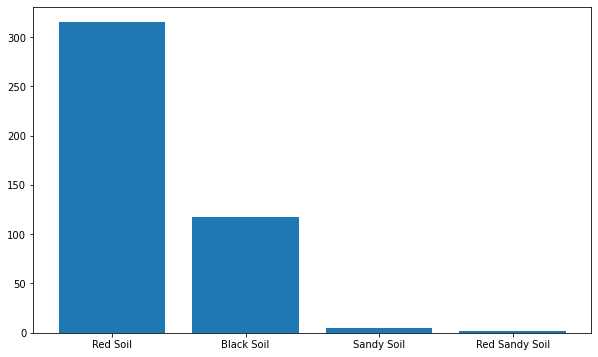

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Sunflower', 'Maize', 'Paddy', 'Chilly', 'Mirchi',
       'Bajra', 'Jowar', 'Turmaric', 'Groundnut', 'Redgram', 'Tomato',
       'Light Black', 'Mango', 'Cowpea', 'Horsegram'], dtype=object)

In [14]:
df['Crop'].value_counts()

Groundnut      109
Cotton         108
Paddy           91
Horsegram       30
Sunflower       21
Mango           19
Tomato          19
Bajra           10
Maize            9
Jowar            8
Redgram          4
Cowpea           4
Chilly           3
Turmaric         2
Light Black      1
Mirchi           1
Name: Crop, dtype: int64

GroundNut         109
Cotton            108
Paddy              91
HorseGram          30
Maize + Millet     27
Mango              19
Tomato             19
Name: Crop, dtype: int64


<BarContainer object of 7 artists>

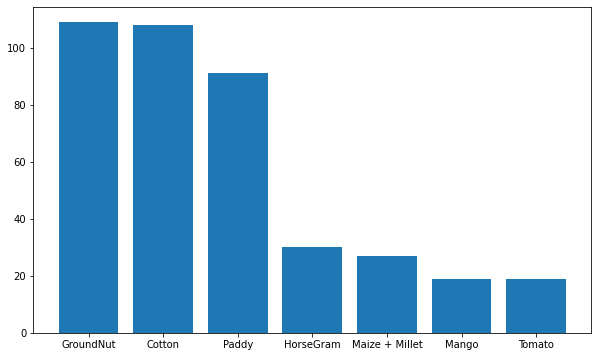

In [15]:
df['Crop'] = df['Crop'].replace('Groundnut', 'GroundNut')
df['Crop'] = df['Crop'].replace('Horsegram', 'HorseGram')
df['Crop'] = df['Crop'].replace(['Jowar', 'Bajra'], 'Millet')
df['Crop'] = df['Crop'].replace(['Maize', 'Millet'], 'Maize + Millet')
df = df[(df['Crop'] != 'Mirchi') & (df['Crop'] != 'Light Black') & (df['Crop'] != 'Turmaric') & (df['Crop'] != 'Chilly') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Cowpea') & (df['Crop'] != 'Sunflower')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.126279,0.311989,0.056340,0.318405,0.651854,0.492305,0.220955,0.036212,0.562369,0.106465,0.318358,-0.023696
EC,0.126279,1.000000,0.112204,0.049513,0.086802,0.271572,0.171602,0.821256,0.047020,0.321125,0.123224,0.148860,0.060861
OC,0.311989,0.112204,1.000000,0.488118,0.488085,0.506912,0.546237,0.267420,0.515331,0.555556,0.393396,0.578693,0.301026
P,0.056340,0.049513,0.488118,1.000000,0.282950,0.085531,0.201496,0.201763,0.468385,0.300051,0.411893,0.400969,0.087932
K,0.318405,0.086802,0.488085,0.282950,1.000000,0.481794,0.489825,0.214062,0.193968,0.496315,0.147972,0.388344,0.382022
Ca,0.651854,0.271572,0.506912,0.085531,0.481794,1.000000,0.750767,0.377576,0.070252,0.602687,0.278682,0.539240,0.185591
Mg,0.492305,0.171602,0.546237,0.201496,0.489825,0.750767,1.000000,0.341885,0.132505,0.660918,0.353506,0.583810,0.202003
S,0.220955,0.821256,0.267420,0.201763,0.214062,0.377576,0.341885,1.000000,0.109219,0.535062,0.351740,0.391443,0.165540
Zn,0.036212,0.047020,0.515331,0.468385,0.193968,0.070252,0.132505,0.109219,1.000000,0.221510,0.262206,0.348889,0.166497
B,0.562369,0.321125,0.555556,0.300051,0.496315,0.602687,0.660918,0.535062,0.221510,1.000000,0.536677,0.672579,0.340630


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'K', 'Mn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC    OC     P      K     Mn  Black Soil  Red Sandy Soil  \
996  9.13  1.21  0.27  5.47  242.0  13.28           1               0   

     Red Soil  Sandy Soil  
996         0           0  
996    Cotton
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:6] = sc.fit_transform(X[:, 0:6])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6387434554973822


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.29 %
Standard Deviation: 4.18 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.5759162303664922


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 54.36 %
Standard Deviation: 5.71 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6701570680628273


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.40 %
Standard Deviation: 7.33 %


In [38]:
pickle.dump(clf3_3, open('Kadapa_model.pkl', 'wb'))
pickle.dump(sc2, open('Kadapa_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.643979057591623


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.26 %
Standard Deviation: 8.43 %


# Multi-layer Perceptron Classifier

In [44]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [45]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [46]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.6311188811188811
Testing Accuracy:  0.518324607329843


In [47]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 54.93 %
Standard Deviation: 6.89 %


# Catboost

In [48]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.7281388	total: 155ms	remaining: 15.3s
1:	learn: 1.5591362	total: 156ms	remaining: 7.63s
2:	learn: 1.4859081	total: 157ms	remaining: 5.06s
3:	learn: 1.3509231	total: 157ms	remaining: 3.78s
4:	learn: 1.3305657	total: 158ms	remaining: 3s
5:	learn: 1.2816233	total: 159ms	remaining: 2.49s
6:	learn: 1.2595809	total: 160ms	remaining: 2.12s
7:	learn: 1.2470851	total: 160ms	remaining: 1.84s
8:	learn: 1.2250690	total: 161ms	remaining: 1.63s
9:	learn: 1.2021319	total: 162ms	remaining: 1.46s
10:	learn: 1.1580916	total: 163ms	remaining: 1.32s
11:	learn: 1.1207594	total: 164ms	remaining: 1.2s
12:	learn: 1.1054001	total: 164ms	remaining: 1.1s
13:	learn: 1.0966751	total: 165ms	remaining: 1.01s
14:	learn: 1.0808995	total: 166ms	remaining: 939ms
15:	learn: 1.0599204	total: 167ms	remaining: 874ms
16:	learn: 1.0583931	total: 167ms	remaining: 817ms
17:	learn: 1.0357499	total: 168ms	remaining: 766ms
18:	learn: 1.0080927	total: 169ms	remaining: 720ms
19:	learn: 0.9893391	total: 170ms	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.422073652
bestIteration = 99

Training on fold [1/5]

bestTest = 1.518003711
bestIteration = 99

Training on fold [2/5]

bestTest = 1.519966109
bestIteration = 99

Training on fold [3/5]

bestTest = 1.433779006
bestIteration = 99

Training on fold [4/5]

bestTest = 1.487538643
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9264378	test: 1.9279204	best: 1.9279204 (0)	total: 2.44ms	remaining: 2.44s
1:	learn: 1.9089530	test: 1.9136221	best: 1.9136221 (1)	total: 4.36ms	remaining: 2.17s
2:	learn: 1.8916016	test: 1.9002601	best: 1.9002601 (2)	total: 6.27ms	remaining: 2.08s
3:	learn: 1.8717760	test: 1.8824463	best: 1.8824463 (3)	total: 8.25ms	remaining: 2.05s
4:	learn: 1.8554435	test: 1.8704227	best: 1.8704227 (4)	total: 10.2ms	remaining: 2.02s
5:	learn: 1.8402726	test: 1.8560559	best: 1.8560559 (5)	total: 12.2ms	remaining: 2.02s
6:	learn: 1.8226047	test: 1.8399816	best: 1.8399816 (6)	total: 14.1ms	remaining: 2s
7:	learn: 1.8063270	test: 1.8258623	best: 1.8258623 (7)	total: 16ms	remaining: 1.98s
8:	learn: 1.7928182	test: 1.8151166	best: 1.8151166 (8)	total: 17.9ms	remaining: 1.97s
9:	learn: 1.7782791	test: 1.8044193	best: 1.8044193 (9)	total: 19.9ms	remaining: 1.97s
10:	learn: 1.7638396	test: 1.7911625	best: 1.7911625 (10)	total: 21.8ms	remaining: 1.96s
11:	learn: 1.7476789	test: 1.7763658	best: 1.7

124:	learn: 1.1581405	test: 1.3311545	best: 1.3311545 (124)	total: 279ms	remaining: 1.95s
125:	learn: 1.1562727	test: 1.3299342	best: 1.3299342 (125)	total: 281ms	remaining: 1.95s
126:	learn: 1.1540795	test: 1.3289995	best: 1.3289995 (126)	total: 283ms	remaining: 1.95s
127:	learn: 1.1515352	test: 1.3275810	best: 1.3275810 (127)	total: 285ms	remaining: 1.94s
128:	learn: 1.1492852	test: 1.3267424	best: 1.3267424 (128)	total: 287ms	remaining: 1.94s
129:	learn: 1.1460111	test: 1.3252089	best: 1.3252089 (129)	total: 290ms	remaining: 1.94s
130:	learn: 1.1440023	test: 1.3246984	best: 1.3246984 (130)	total: 292ms	remaining: 1.94s
131:	learn: 1.1422651	test: 1.3238108	best: 1.3238108 (131)	total: 294ms	remaining: 1.93s
132:	learn: 1.1397849	test: 1.3229487	best: 1.3229487 (132)	total: 296ms	remaining: 1.93s
133:	learn: 1.1379547	test: 1.3220601	best: 1.3220601 (133)	total: 298ms	remaining: 1.93s
134:	learn: 1.1353899	test: 1.3207208	best: 1.3207208 (134)	total: 300ms	remaining: 1.92s
135:	learn

242:	learn: 0.9507798	test: 1.2262606	best: 1.2262606 (242)	total: 527ms	remaining: 1.64s
243:	learn: 0.9501018	test: 1.2256184	best: 1.2256184 (243)	total: 529ms	remaining: 1.64s
244:	learn: 0.9491615	test: 1.2252779	best: 1.2252779 (244)	total: 531ms	remaining: 1.64s
245:	learn: 0.9479256	test: 1.2243285	best: 1.2243285 (245)	total: 533ms	remaining: 1.63s
246:	learn: 0.9473899	test: 1.2241505	best: 1.2241505 (246)	total: 535ms	remaining: 1.63s
247:	learn: 0.9463187	test: 1.2233068	best: 1.2233068 (247)	total: 537ms	remaining: 1.63s
248:	learn: 0.9444351	test: 1.2226595	best: 1.2226595 (248)	total: 539ms	remaining: 1.63s
249:	learn: 0.9429937	test: 1.2219387	best: 1.2219387 (249)	total: 541ms	remaining: 1.62s
250:	learn: 0.9418949	test: 1.2220702	best: 1.2219387 (249)	total: 543ms	remaining: 1.62s
251:	learn: 0.9403319	test: 1.2213337	best: 1.2213337 (251)	total: 545ms	remaining: 1.62s
252:	learn: 0.9391484	test: 1.2206063	best: 1.2206063 (252)	total: 548ms	remaining: 1.62s
253:	learn

376:	learn: 0.7994434	test: 1.1610829	best: 1.1610829 (376)	total: 807ms	remaining: 1.33s
377:	learn: 0.7984808	test: 1.1605405	best: 1.1605405 (377)	total: 809ms	remaining: 1.33s
378:	learn: 0.7972430	test: 1.1599898	best: 1.1599898 (378)	total: 811ms	remaining: 1.33s
379:	learn: 0.7960472	test: 1.1590441	best: 1.1590441 (379)	total: 813ms	remaining: 1.33s
380:	learn: 0.7952016	test: 1.1590376	best: 1.1590376 (380)	total: 815ms	remaining: 1.32s
381:	learn: 0.7944196	test: 1.1587783	best: 1.1587783 (381)	total: 817ms	remaining: 1.32s
382:	learn: 0.7936069	test: 1.1585750	best: 1.1585750 (382)	total: 819ms	remaining: 1.32s
383:	learn: 0.7928543	test: 1.1583711	best: 1.1583711 (383)	total: 821ms	remaining: 1.32s
384:	learn: 0.7919932	test: 1.1582368	best: 1.1582368 (384)	total: 823ms	remaining: 1.31s
385:	learn: 0.7911459	test: 1.1574207	best: 1.1574207 (385)	total: 825ms	remaining: 1.31s
386:	learn: 0.7897682	test: 1.1558098	best: 1.1558098 (386)	total: 827ms	remaining: 1.31s
387:	learn

480:	learn: 0.7176575	test: 1.1277928	best: 1.1277928 (480)	total: 1.05s	remaining: 1.14s
481:	learn: 0.7171621	test: 1.1274260	best: 1.1274260 (481)	total: 1.06s	remaining: 1.14s
482:	learn: 0.7157961	test: 1.1266883	best: 1.1266883 (482)	total: 1.06s	remaining: 1.13s
483:	learn: 0.7146804	test: 1.1267069	best: 1.1266883 (482)	total: 1.06s	remaining: 1.13s
484:	learn: 0.7137834	test: 1.1263917	best: 1.1263917 (484)	total: 1.06s	remaining: 1.13s
485:	learn: 0.7132229	test: 1.1264445	best: 1.1263917 (484)	total: 1.06s	remaining: 1.13s
486:	learn: 0.7124948	test: 1.1258646	best: 1.1258646 (486)	total: 1.07s	remaining: 1.13s
487:	learn: 0.7117539	test: 1.1257379	best: 1.1257379 (487)	total: 1.07s	remaining: 1.12s
488:	learn: 0.7113398	test: 1.1254961	best: 1.1254961 (488)	total: 1.07s	remaining: 1.12s
489:	learn: 0.7104709	test: 1.1250965	best: 1.1250965 (489)	total: 1.07s	remaining: 1.12s
490:	learn: 0.7096344	test: 1.1246021	best: 1.1246021 (490)	total: 1.08s	remaining: 1.12s
491:	learn

575:	learn: 0.6552867	test: 1.1016697	best: 1.1016697 (575)	total: 1.24s	remaining: 915ms
576:	learn: 0.6548984	test: 1.1010767	best: 1.1010767 (576)	total: 1.25s	remaining: 913ms
577:	learn: 0.6543062	test: 1.1007254	best: 1.1007254 (577)	total: 1.25s	remaining: 911ms
578:	learn: 0.6536718	test: 1.1011267	best: 1.1007254 (577)	total: 1.25s	remaining: 908ms
579:	learn: 0.6531682	test: 1.1010579	best: 1.1007254 (577)	total: 1.25s	remaining: 906ms
580:	learn: 0.6526267	test: 1.1006072	best: 1.1006072 (580)	total: 1.25s	remaining: 903ms
581:	learn: 0.6521084	test: 1.1003663	best: 1.1003663 (581)	total: 1.25s	remaining: 901ms
582:	learn: 0.6516241	test: 1.1007225	best: 1.1003663 (581)	total: 1.26s	remaining: 899ms
583:	learn: 0.6511613	test: 1.1007202	best: 1.1003663 (581)	total: 1.26s	remaining: 897ms
584:	learn: 0.6508752	test: 1.1004857	best: 1.1003663 (581)	total: 1.26s	remaining: 895ms
585:	learn: 0.6500489	test: 1.1001202	best: 1.1001202 (585)	total: 1.26s	remaining: 892ms
586:	learn

715:	learn: 0.5796936	test: 1.0762342	best: 1.0762342 (715)	total: 1.51s	remaining: 599ms
716:	learn: 0.5793485	test: 1.0759935	best: 1.0759935 (716)	total: 1.51s	remaining: 597ms
717:	learn: 0.5789739	test: 1.0759258	best: 1.0759258 (717)	total: 1.51s	remaining: 595ms
718:	learn: 0.5784560	test: 1.0756160	best: 1.0756160 (718)	total: 1.52s	remaining: 593ms
719:	learn: 0.5779645	test: 1.0752641	best: 1.0752641 (719)	total: 1.52s	remaining: 591ms
720:	learn: 0.5776410	test: 1.0753074	best: 1.0752641 (719)	total: 1.52s	remaining: 588ms
721:	learn: 0.5769290	test: 1.0751273	best: 1.0751273 (721)	total: 1.52s	remaining: 586ms
722:	learn: 0.5763834	test: 1.0753985	best: 1.0751273 (721)	total: 1.52s	remaining: 584ms
723:	learn: 0.5760963	test: 1.0754709	best: 1.0751273 (721)	total: 1.53s	remaining: 582ms
724:	learn: 0.5754400	test: 1.0754957	best: 1.0751273 (721)	total: 1.53s	remaining: 580ms
725:	learn: 0.5749362	test: 1.0750486	best: 1.0750486 (725)	total: 1.53s	remaining: 578ms
726:	learn

817:	learn: 0.5354461	test: 1.0617187	best: 1.0617187 (817)	total: 1.7s	remaining: 378ms
818:	learn: 0.5352378	test: 1.0617977	best: 1.0617187 (817)	total: 1.7s	remaining: 376ms
819:	learn: 0.5345707	test: 1.0617111	best: 1.0617111 (819)	total: 1.7s	remaining: 374ms
820:	learn: 0.5339014	test: 1.0609506	best: 1.0609506 (820)	total: 1.7s	remaining: 372ms
821:	learn: 0.5334504	test: 1.0614089	best: 1.0609506 (820)	total: 1.71s	remaining: 370ms
822:	learn: 0.5333080	test: 1.0615451	best: 1.0609506 (820)	total: 1.71s	remaining: 367ms
823:	learn: 0.5331205	test: 1.0616224	best: 1.0609506 (820)	total: 1.71s	remaining: 365ms
824:	learn: 0.5327210	test: 1.0616458	best: 1.0609506 (820)	total: 1.71s	remaining: 363ms
825:	learn: 0.5322897	test: 1.0617674	best: 1.0609506 (820)	total: 1.71s	remaining: 361ms
826:	learn: 0.5319564	test: 1.0617280	best: 1.0609506 (820)	total: 1.72s	remaining: 359ms
827:	learn: 0.5316895	test: 1.0616614	best: 1.0609506 (820)	total: 1.72s	remaining: 357ms
828:	learn: 0.

910:	learn: 0.4993434	test: 1.0499920	best: 1.0499920 (910)	total: 1.87s	remaining: 183ms
911:	learn: 0.4991876	test: 1.0498966	best: 1.0498966 (911)	total: 1.87s	remaining: 181ms
912:	learn: 0.4988225	test: 1.0497748	best: 1.0497748 (912)	total: 1.88s	remaining: 179ms
913:	learn: 0.4982291	test: 1.0501782	best: 1.0497748 (912)	total: 1.88s	remaining: 177ms
914:	learn: 0.4977859	test: 1.0496895	best: 1.0496895 (914)	total: 1.88s	remaining: 175ms
915:	learn: 0.4974914	test: 1.0491174	best: 1.0491174 (915)	total: 1.88s	remaining: 173ms
916:	learn: 0.4968101	test: 1.0487851	best: 1.0487851 (916)	total: 1.88s	remaining: 170ms
917:	learn: 0.4962996	test: 1.0485649	best: 1.0485649 (917)	total: 1.89s	remaining: 168ms
918:	learn: 0.4959742	test: 1.0483935	best: 1.0483935 (918)	total: 1.89s	remaining: 166ms
919:	learn: 0.4956729	test: 1.0485868	best: 1.0483935 (918)	total: 1.89s	remaining: 164ms
920:	learn: 0.4952328	test: 1.0481807	best: 1.0481807 (920)	total: 1.89s	remaining: 162ms
921:	learn

0:	learn: 1.8825523	test: 1.8874975	best: 1.8874975 (0)	total: 3.01ms	remaining: 3s
1:	learn: 1.8292519	test: 1.8443359	best: 1.8443359 (1)	total: 4.96ms	remaining: 2.47s
2:	learn: 1.7800622	test: 1.8066165	best: 1.8066165 (2)	total: 6.8ms	remaining: 2.26s
3:	learn: 1.7276760	test: 1.7600873	best: 1.7600873 (3)	total: 8.64ms	remaining: 2.15s
4:	learn: 1.6932930	test: 1.7367554	best: 1.7367554 (4)	total: 10.8ms	remaining: 2.14s
5:	learn: 1.6584323	test: 1.7076055	best: 1.7076055 (5)	total: 12.7ms	remaining: 2.11s
6:	learn: 1.6223389	test: 1.6792151	best: 1.6792151 (6)	total: 14.7ms	remaining: 2.09s
7:	learn: 1.5898240	test: 1.6519093	best: 1.6519093 (7)	total: 17.1ms	remaining: 2.12s
8:	learn: 1.5713457	test: 1.6406857	best: 1.6406857 (8)	total: 19.3ms	remaining: 2.12s
9:	learn: 1.5376954	test: 1.6142250	best: 1.6142250 (9)	total: 21.1ms	remaining: 2.09s
10:	learn: 1.5120862	test: 1.5922544	best: 1.5922544 (10)	total: 23ms	remaining: 2.07s
11:	learn: 1.4833889	test: 1.5676001	best: 1.56

95:	learn: 0.8640255	test: 1.1901499	best: 1.1901499 (95)	total: 187ms	remaining: 1.76s
96:	learn: 0.8606656	test: 1.1886933	best: 1.1886933 (96)	total: 190ms	remaining: 1.77s
97:	learn: 0.8571805	test: 1.1876799	best: 1.1876799 (97)	total: 192ms	remaining: 1.76s
98:	learn: 0.8533848	test: 1.1881175	best: 1.1876799 (97)	total: 194ms	remaining: 1.76s
99:	learn: 0.8494084	test: 1.1851467	best: 1.1851467 (99)	total: 196ms	remaining: 1.76s
100:	learn: 0.8485710	test: 1.1861268	best: 1.1851467 (99)	total: 198ms	remaining: 1.76s
101:	learn: 0.8447287	test: 1.1838266	best: 1.1838266 (101)	total: 200ms	remaining: 1.76s
102:	learn: 0.8394851	test: 1.1825177	best: 1.1825177 (102)	total: 202ms	remaining: 1.76s
103:	learn: 0.8355416	test: 1.1794185	best: 1.1794185 (103)	total: 204ms	remaining: 1.76s
104:	learn: 0.8301626	test: 1.1794246	best: 1.1794185 (103)	total: 206ms	remaining: 1.76s
105:	learn: 0.8255327	test: 1.1779844	best: 1.1779844 (105)	total: 208ms	remaining: 1.75s
106:	learn: 0.8223285

210:	learn: 0.5851547	test: 1.0934719	best: 1.0934719 (210)	total: 426ms	remaining: 1.59s
211:	learn: 0.5837122	test: 1.0923731	best: 1.0923731 (211)	total: 429ms	remaining: 1.59s
212:	learn: 0.5822213	test: 1.0926534	best: 1.0923731 (211)	total: 431ms	remaining: 1.59s
213:	learn: 0.5809154	test: 1.0911397	best: 1.0911397 (213)	total: 433ms	remaining: 1.59s
214:	learn: 0.5798135	test: 1.0912130	best: 1.0911397 (213)	total: 435ms	remaining: 1.59s
215:	learn: 0.5793131	test: 1.0906641	best: 1.0906641 (215)	total: 437ms	remaining: 1.58s
216:	learn: 0.5781339	test: 1.0904200	best: 1.0904200 (216)	total: 438ms	remaining: 1.58s
217:	learn: 0.5763734	test: 1.0901538	best: 1.0901538 (217)	total: 441ms	remaining: 1.58s
218:	learn: 0.5752194	test: 1.0896254	best: 1.0896254 (218)	total: 442ms	remaining: 1.58s
219:	learn: 0.5726267	test: 1.0897048	best: 1.0896254 (218)	total: 445ms	remaining: 1.58s
220:	learn: 0.5713585	test: 1.0895662	best: 1.0895662 (220)	total: 447ms	remaining: 1.57s
221:	learn

309:	learn: 0.4583846	test: 1.0577440	best: 1.0577440 (309)	total: 617ms	remaining: 1.37s
310:	learn: 0.4578039	test: 1.0571437	best: 1.0571437 (310)	total: 619ms	remaining: 1.37s
311:	learn: 0.4562070	test: 1.0559405	best: 1.0559405 (311)	total: 621ms	remaining: 1.37s
312:	learn: 0.4549414	test: 1.0549648	best: 1.0549648 (312)	total: 623ms	remaining: 1.37s
313:	learn: 0.4542245	test: 1.0542111	best: 1.0542111 (313)	total: 625ms	remaining: 1.36s
314:	learn: 0.4528571	test: 1.0531947	best: 1.0531947 (314)	total: 627ms	remaining: 1.36s
315:	learn: 0.4523345	test: 1.0520767	best: 1.0520767 (315)	total: 629ms	remaining: 1.36s
316:	learn: 0.4509791	test: 1.0521151	best: 1.0520767 (315)	total: 631ms	remaining: 1.36s
317:	learn: 0.4499357	test: 1.0517772	best: 1.0517772 (317)	total: 633ms	remaining: 1.36s
318:	learn: 0.4490892	test: 1.0517915	best: 1.0517772 (317)	total: 636ms	remaining: 1.36s
319:	learn: 0.4480949	test: 1.0511405	best: 1.0511405 (319)	total: 637ms	remaining: 1.35s
320:	learn

437:	learn: 0.3501716	test: 1.0307019	best: 1.0279663 (428)	total: 882ms	remaining: 1.13s
438:	learn: 0.3495539	test: 1.0302528	best: 1.0279663 (428)	total: 884ms	remaining: 1.13s
439:	learn: 0.3490830	test: 1.0305565	best: 1.0279663 (428)	total: 886ms	remaining: 1.13s
440:	learn: 0.3481552	test: 1.0310609	best: 1.0279663 (428)	total: 888ms	remaining: 1.13s
441:	learn: 0.3479882	test: 1.0307042	best: 1.0279663 (428)	total: 890ms	remaining: 1.12s
442:	learn: 0.3475165	test: 1.0316820	best: 1.0279663 (428)	total: 892ms	remaining: 1.12s
443:	learn: 0.3468251	test: 1.0315670	best: 1.0279663 (428)	total: 894ms	remaining: 1.12s
444:	learn: 0.3465866	test: 1.0316295	best: 1.0279663 (428)	total: 896ms	remaining: 1.12s
445:	learn: 0.3459665	test: 1.0311827	best: 1.0279663 (428)	total: 899ms	remaining: 1.12s
446:	learn: 0.3451563	test: 1.0318858	best: 1.0279663 (428)	total: 901ms	remaining: 1.11s
447:	learn: 0.3446264	test: 1.0315652	best: 1.0279663 (428)	total: 904ms	remaining: 1.11s
448:	learn

535:	learn: 0.2926421	test: 1.0222504	best: 1.0215203 (494)	total: 1.07s	remaining: 927ms
536:	learn: 0.2918478	test: 1.0216361	best: 1.0215203 (494)	total: 1.07s	remaining: 925ms
537:	learn: 0.2915663	test: 1.0214669	best: 1.0214669 (537)	total: 1.07s	remaining: 923ms
538:	learn: 0.2913494	test: 1.0210734	best: 1.0210734 (538)	total: 1.08s	remaining: 921ms
539:	learn: 0.2910081	test: 1.0206219	best: 1.0206219 (539)	total: 1.08s	remaining: 919ms
540:	learn: 0.2903449	test: 1.0204514	best: 1.0204514 (540)	total: 1.08s	remaining: 917ms
541:	learn: 0.2896362	test: 1.0201120	best: 1.0201120 (541)	total: 1.08s	remaining: 915ms
542:	learn: 0.2893622	test: 1.0204896	best: 1.0201120 (541)	total: 1.08s	remaining: 913ms
543:	learn: 0.2887344	test: 1.0198791	best: 1.0198791 (543)	total: 1.09s	remaining: 911ms
544:	learn: 0.2885044	test: 1.0195888	best: 1.0195888 (544)	total: 1.09s	remaining: 910ms
545:	learn: 0.2877677	test: 1.0189163	best: 1.0189163 (545)	total: 1.09s	remaining: 907ms
546:	learn

658:	learn: 0.2348891	test: 1.0264242	best: 1.0172795 (567)	total: 1.31s	remaining: 679ms
659:	learn: 0.2343212	test: 1.0259454	best: 1.0172795 (567)	total: 1.31s	remaining: 677ms
660:	learn: 0.2338738	test: 1.0260320	best: 1.0172795 (567)	total: 1.32s	remaining: 675ms
661:	learn: 0.2335864	test: 1.0260198	best: 1.0172795 (567)	total: 1.32s	remaining: 673ms
662:	learn: 0.2333323	test: 1.0255671	best: 1.0172795 (567)	total: 1.32s	remaining: 671ms
663:	learn: 0.2330366	test: 1.0262828	best: 1.0172795 (567)	total: 1.32s	remaining: 669ms
664:	learn: 0.2328577	test: 1.0267488	best: 1.0172795 (567)	total: 1.32s	remaining: 667ms
665:	learn: 0.2327791	test: 1.0264854	best: 1.0172795 (567)	total: 1.33s	remaining: 665ms
666:	learn: 0.2323084	test: 1.0270945	best: 1.0172795 (567)	total: 1.33s	remaining: 663ms
667:	learn: 0.2318093	test: 1.0267629	best: 1.0172795 (567)	total: 1.33s	remaining: 661ms
668:	learn: 0.2313835	test: 1.0267711	best: 1.0172795 (567)	total: 1.33s	remaining: 659ms
669:	learn

756:	learn: 0.2019246	test: 1.0291101	best: 1.0172795 (567)	total: 1.5s	remaining: 481ms
757:	learn: 0.2017896	test: 1.0292243	best: 1.0172795 (567)	total: 1.5s	remaining: 480ms
758:	learn: 0.2014365	test: 1.0292132	best: 1.0172795 (567)	total: 1.5s	remaining: 478ms
759:	learn: 0.2012043	test: 1.0292660	best: 1.0172795 (567)	total: 1.5s	remaining: 476ms
760:	learn: 0.2008045	test: 1.0285200	best: 1.0172795 (567)	total: 1.51s	remaining: 474ms
761:	learn: 0.2004228	test: 1.0288756	best: 1.0172795 (567)	total: 1.51s	remaining: 472ms
762:	learn: 0.2001156	test: 1.0288401	best: 1.0172795 (567)	total: 1.51s	remaining: 470ms
763:	learn: 0.1998259	test: 1.0289148	best: 1.0172795 (567)	total: 1.51s	remaining: 468ms
764:	learn: 0.1996451	test: 1.0289503	best: 1.0172795 (567)	total: 1.51s	remaining: 466ms
765:	learn: 0.1993423	test: 1.0289080	best: 1.0172795 (567)	total: 1.52s	remaining: 464ms
766:	learn: 0.1991417	test: 1.0289631	best: 1.0172795 (567)	total: 1.52s	remaining: 462ms
767:	learn: 0.

902:	learn: 0.1644512	test: 1.0395467	best: 1.0172795 (567)	total: 1.78s	remaining: 191ms
903:	learn: 0.1642548	test: 1.0396906	best: 1.0172795 (567)	total: 1.78s	remaining: 190ms
904:	learn: 0.1641504	test: 1.0394181	best: 1.0172795 (567)	total: 1.79s	remaining: 188ms
905:	learn: 0.1639949	test: 1.0385959	best: 1.0172795 (567)	total: 1.79s	remaining: 186ms
906:	learn: 0.1639078	test: 1.0387762	best: 1.0172795 (567)	total: 1.79s	remaining: 184ms
907:	learn: 0.1636987	test: 1.0389843	best: 1.0172795 (567)	total: 1.79s	remaining: 182ms
908:	learn: 0.1632806	test: 1.0385828	best: 1.0172795 (567)	total: 1.79s	remaining: 180ms
909:	learn: 0.1629546	test: 1.0385787	best: 1.0172795 (567)	total: 1.8s	remaining: 178ms
910:	learn: 0.1629150	test: 1.0385768	best: 1.0172795 (567)	total: 1.8s	remaining: 176ms
911:	learn: 0.1628497	test: 1.0386317	best: 1.0172795 (567)	total: 1.8s	remaining: 174ms
912:	learn: 0.1626179	test: 1.0385536	best: 1.0172795 (567)	total: 1.8s	remaining: 172ms
913:	learn: 0.

9:	learn: 1.7670301	test: 1.8117746	best: 1.8117746 (9)	total: 69.1ms	remaining: 6.84s
10:	learn: 1.7529917	test: 1.8015909	best: 1.8015909 (10)	total: 76ms	remaining: 6.83s
11:	learn: 1.7382522	test: 1.7893155	best: 1.7893155 (11)	total: 82.9ms	remaining: 6.83s
12:	learn: 1.7222159	test: 1.7778879	best: 1.7778879 (12)	total: 91ms	remaining: 6.91s
13:	learn: 1.7082463	test: 1.7655901	best: 1.7655901 (13)	total: 98.3ms	remaining: 6.92s
14:	learn: 1.6970433	test: 1.7580020	best: 1.7580020 (14)	total: 105ms	remaining: 6.89s
15:	learn: 1.6831065	test: 1.7463424	best: 1.7463424 (15)	total: 112ms	remaining: 6.88s
16:	learn: 1.6718723	test: 1.7386144	best: 1.7386144 (16)	total: 119ms	remaining: 6.86s
17:	learn: 1.6584941	test: 1.7273104	best: 1.7273104 (17)	total: 126ms	remaining: 6.85s
18:	learn: 1.6477107	test: 1.7179664	best: 1.7179664 (18)	total: 132ms	remaining: 6.83s
19:	learn: 1.6329310	test: 1.7054783	best: 1.7054783 (19)	total: 139ms	remaining: 6.79s
20:	learn: 1.6195343	test: 1.6941

108:	learn: 1.0658170	test: 1.2956268	best: 1.2956268 (108)	total: 744ms	remaining: 6.08s
109:	learn: 1.0624670	test: 1.2937781	best: 1.2937781 (109)	total: 750ms	remaining: 6.07s
110:	learn: 1.0589645	test: 1.2920703	best: 1.2920703 (110)	total: 757ms	remaining: 6.06s
111:	learn: 1.0553521	test: 1.2898378	best: 1.2898378 (111)	total: 764ms	remaining: 6.06s
112:	learn: 1.0520598	test: 1.2874768	best: 1.2874768 (112)	total: 772ms	remaining: 6.06s
113:	learn: 1.0486045	test: 1.2857912	best: 1.2857912 (113)	total: 778ms	remaining: 6.05s
114:	learn: 1.0449676	test: 1.2830968	best: 1.2830968 (114)	total: 785ms	remaining: 6.04s
115:	learn: 1.0418544	test: 1.2818162	best: 1.2818162 (115)	total: 792ms	remaining: 6.03s
116:	learn: 1.0394128	test: 1.2809760	best: 1.2809760 (116)	total: 798ms	remaining: 6.02s
117:	learn: 1.0363152	test: 1.2797054	best: 1.2797054 (117)	total: 804ms	remaining: 6.01s
118:	learn: 1.0334014	test: 1.2767569	best: 1.2767569 (118)	total: 810ms	remaining: 6s
119:	learn: 1

216:	learn: 0.8052301	test: 1.1595850	best: 1.1595850 (216)	total: 1.46s	remaining: 5.26s
217:	learn: 0.8034719	test: 1.1586870	best: 1.1586870 (217)	total: 1.46s	remaining: 5.25s
218:	learn: 0.8017352	test: 1.1573882	best: 1.1573882 (218)	total: 1.47s	remaining: 5.25s
219:	learn: 0.8000686	test: 1.1567041	best: 1.1567041 (219)	total: 1.48s	remaining: 5.24s
220:	learn: 0.7983662	test: 1.1559787	best: 1.1559787 (220)	total: 1.48s	remaining: 5.23s
221:	learn: 0.7968735	test: 1.1548231	best: 1.1548231 (221)	total: 1.49s	remaining: 5.23s
222:	learn: 0.7950224	test: 1.1548998	best: 1.1548231 (221)	total: 1.5s	remaining: 5.22s
223:	learn: 0.7940746	test: 1.1545949	best: 1.1545949 (223)	total: 1.51s	remaining: 5.22s
224:	learn: 0.7922388	test: 1.1537234	best: 1.1537234 (224)	total: 1.51s	remaining: 5.21s
225:	learn: 0.7905895	test: 1.1530527	best: 1.1530527 (225)	total: 1.52s	remaining: 5.21s
226:	learn: 0.7885969	test: 1.1515848	best: 1.1515848 (226)	total: 1.53s	remaining: 5.2s
227:	learn: 

309:	learn: 0.6700132	test: 1.1055085	best: 1.1055085 (309)	total: 2.07s	remaining: 4.61s
310:	learn: 0.6687652	test: 1.1045937	best: 1.1045937 (310)	total: 2.08s	remaining: 4.6s
311:	learn: 0.6674278	test: 1.1039924	best: 1.1039924 (311)	total: 2.08s	remaining: 4.59s
312:	learn: 0.6669756	test: 1.1036258	best: 1.1036258 (312)	total: 2.09s	remaining: 4.59s
313:	learn: 0.6652088	test: 1.1028916	best: 1.1028916 (313)	total: 2.1s	remaining: 4.58s
314:	learn: 0.6640636	test: 1.1025878	best: 1.1025878 (314)	total: 2.1s	remaining: 4.58s
315:	learn: 0.6633613	test: 1.1022312	best: 1.1022312 (315)	total: 2.11s	remaining: 4.57s
316:	learn: 0.6623040	test: 1.1015090	best: 1.1015090 (316)	total: 2.12s	remaining: 4.56s
317:	learn: 0.6611241	test: 1.1012315	best: 1.1012315 (317)	total: 2.12s	remaining: 4.55s
318:	learn: 0.6596495	test: 1.1006873	best: 1.1006873 (318)	total: 2.13s	remaining: 4.55s
319:	learn: 0.6587634	test: 1.1000016	best: 1.1000016 (319)	total: 2.14s	remaining: 4.54s
320:	learn: 0

418:	learn: 0.5587960	test: 1.0606985	best: 1.0606985 (418)	total: 2.78s	remaining: 3.86s
419:	learn: 0.5576280	test: 1.0606104	best: 1.0606104 (419)	total: 2.79s	remaining: 3.85s
420:	learn: 0.5565863	test: 1.0604045	best: 1.0604045 (420)	total: 2.8s	remaining: 3.85s
421:	learn: 0.5558386	test: 1.0599043	best: 1.0599043 (421)	total: 2.81s	remaining: 3.85s
422:	learn: 0.5549640	test: 1.0594927	best: 1.0594927 (422)	total: 2.81s	remaining: 3.84s
423:	learn: 0.5542692	test: 1.0593353	best: 1.0593353 (423)	total: 2.82s	remaining: 3.83s
424:	learn: 0.5533513	test: 1.0590245	best: 1.0590245 (424)	total: 2.83s	remaining: 3.83s
425:	learn: 0.5525335	test: 1.0582049	best: 1.0582049 (425)	total: 2.84s	remaining: 3.82s
426:	learn: 0.5517843	test: 1.0575782	best: 1.0575782 (426)	total: 2.84s	remaining: 3.81s
427:	learn: 0.5510395	test: 1.0573047	best: 1.0573047 (427)	total: 2.85s	remaining: 3.81s
428:	learn: 0.5504835	test: 1.0572803	best: 1.0572803 (428)	total: 2.86s	remaining: 3.8s
429:	learn: 

537:	learn: 0.4690953	test: 1.0295191	best: 1.0295191 (537)	total: 3.55s	remaining: 3.05s
538:	learn: 0.4686572	test: 1.0294184	best: 1.0294184 (538)	total: 3.56s	remaining: 3.04s
539:	learn: 0.4679503	test: 1.0290107	best: 1.0290107 (539)	total: 3.56s	remaining: 3.03s
540:	learn: 0.4672999	test: 1.0291032	best: 1.0290107 (539)	total: 3.57s	remaining: 3.03s
541:	learn: 0.4666583	test: 1.0288115	best: 1.0288115 (541)	total: 3.58s	remaining: 3.02s
542:	learn: 0.4659063	test: 1.0283663	best: 1.0283663 (542)	total: 3.58s	remaining: 3.02s
543:	learn: 0.4651969	test: 1.0284774	best: 1.0283663 (542)	total: 3.59s	remaining: 3.01s
544:	learn: 0.4642971	test: 1.0284110	best: 1.0283663 (542)	total: 3.6s	remaining: 3s
545:	learn: 0.4635536	test: 1.0279024	best: 1.0279024 (545)	total: 3.6s	remaining: 3s
546:	learn: 0.4630258	test: 1.0277911	best: 1.0277911 (546)	total: 3.61s	remaining: 2.99s
547:	learn: 0.4625837	test: 1.0273981	best: 1.0273981 (547)	total: 3.62s	remaining: 2.98s
548:	learn: 0.4622

629:	learn: 0.4168882	test: 1.0133414	best: 1.0133414 (629)	total: 4.14s	remaining: 2.43s
630:	learn: 0.4163915	test: 1.0131872	best: 1.0131872 (630)	total: 4.14s	remaining: 2.42s
631:	learn: 0.4157668	test: 1.0129887	best: 1.0129887 (631)	total: 4.15s	remaining: 2.42s
632:	learn: 0.4153981	test: 1.0129207	best: 1.0129207 (632)	total: 4.16s	remaining: 2.41s
633:	learn: 0.4149452	test: 1.0126673	best: 1.0126673 (633)	total: 4.16s	remaining: 2.4s
634:	learn: 0.4143886	test: 1.0127238	best: 1.0126673 (633)	total: 4.17s	remaining: 2.4s
635:	learn: 0.4138756	test: 1.0123146	best: 1.0123146 (635)	total: 4.18s	remaining: 2.39s
636:	learn: 0.4132789	test: 1.0122857	best: 1.0122857 (636)	total: 4.18s	remaining: 2.38s
637:	learn: 0.4126625	test: 1.0118775	best: 1.0118775 (637)	total: 4.19s	remaining: 2.38s
638:	learn: 0.4123296	test: 1.0116002	best: 1.0116002 (638)	total: 4.2s	remaining: 2.37s
639:	learn: 0.4117475	test: 1.0118337	best: 1.0116002 (638)	total: 4.2s	remaining: 2.36s
640:	learn: 0.

721:	learn: 0.3733602	test: 0.9955660	best: 0.9955660 (721)	total: 4.72s	remaining: 1.82s
722:	learn: 0.3727679	test: 0.9956990	best: 0.9955660 (721)	total: 4.73s	remaining: 1.81s
723:	learn: 0.3725326	test: 0.9957695	best: 0.9955660 (721)	total: 4.74s	remaining: 1.81s
724:	learn: 0.3720553	test: 0.9954778	best: 0.9954778 (724)	total: 4.74s	remaining: 1.8s
725:	learn: 0.3713992	test: 0.9952648	best: 0.9952648 (725)	total: 4.75s	remaining: 1.79s
726:	learn: 0.3707720	test: 0.9950414	best: 0.9950414 (726)	total: 4.76s	remaining: 1.79s
727:	learn: 0.3704301	test: 0.9949450	best: 0.9949450 (727)	total: 4.77s	remaining: 1.78s
728:	learn: 0.3699945	test: 0.9945525	best: 0.9945525 (728)	total: 4.77s	remaining: 1.77s
729:	learn: 0.3694695	test: 0.9944002	best: 0.9944002 (729)	total: 4.78s	remaining: 1.77s
730:	learn: 0.3691866	test: 0.9940806	best: 0.9940806 (730)	total: 4.79s	remaining: 1.76s
731:	learn: 0.3687669	test: 0.9940813	best: 0.9940806 (730)	total: 4.79s	remaining: 1.75s
732:	learn:

835:	learn: 0.3281231	test: 0.9803638	best: 0.9803638 (835)	total: 5.49s	remaining: 1.08s
836:	learn: 0.3278648	test: 0.9802191	best: 0.9802191 (836)	total: 5.5s	remaining: 1.07s
837:	learn: 0.3273195	test: 0.9802505	best: 0.9802191 (836)	total: 5.5s	remaining: 1.06s
838:	learn: 0.3270435	test: 0.9802323	best: 0.9802191 (836)	total: 5.51s	remaining: 1.06s
839:	learn: 0.3267078	test: 0.9800060	best: 0.9800060 (839)	total: 5.52s	remaining: 1.05s
840:	learn: 0.3261082	test: 0.9796866	best: 0.9796866 (840)	total: 5.52s	remaining: 1.04s
841:	learn: 0.3257562	test: 0.9797401	best: 0.9796866 (840)	total: 5.53s	remaining: 1.04s
842:	learn: 0.3253222	test: 0.9797842	best: 0.9796866 (840)	total: 5.54s	remaining: 1.03s
843:	learn: 0.3249052	test: 0.9797940	best: 0.9796866 (840)	total: 5.54s	remaining: 1.02s
844:	learn: 0.3245368	test: 0.9797717	best: 0.9796866 (840)	total: 5.55s	remaining: 1.02s
845:	learn: 0.3242227	test: 0.9793247	best: 0.9793247 (845)	total: 5.56s	remaining: 1.01s
846:	learn: 

947:	learn: 0.2904547	test: 0.9704017	best: 0.9702882 (946)	total: 6.27s	remaining: 344ms
948:	learn: 0.2901911	test: 0.9706000	best: 0.9702882 (946)	total: 6.28s	remaining: 338ms
949:	learn: 0.2898785	test: 0.9704708	best: 0.9702882 (946)	total: 6.29s	remaining: 331ms
950:	learn: 0.2896005	test: 0.9707850	best: 0.9702882 (946)	total: 6.3s	remaining: 324ms
951:	learn: 0.2893124	test: 0.9704677	best: 0.9702882 (946)	total: 6.3s	remaining: 318ms
952:	learn: 0.2888491	test: 0.9704539	best: 0.9702882 (946)	total: 6.31s	remaining: 311ms
953:	learn: 0.2884391	test: 0.9703328	best: 0.9702882 (946)	total: 6.32s	remaining: 305ms
954:	learn: 0.2881201	test: 0.9700224	best: 0.9700224 (954)	total: 6.33s	remaining: 298ms
955:	learn: 0.2878684	test: 0.9702854	best: 0.9700224 (954)	total: 6.33s	remaining: 292ms
956:	learn: 0.2875788	test: 0.9701132	best: 0.9700224 (954)	total: 6.34s	remaining: 285ms
957:	learn: 0.2872487	test: 0.9700412	best: 0.9700224 (954)	total: 6.35s	remaining: 278ms
958:	learn: 

61:	learn: 0.8226296	test: 1.1983556	best: 1.1983556 (61)	total: 414ms	remaining: 6.27s
62:	learn: 0.8146246	test: 1.1937217	best: 1.1937217 (62)	total: 422ms	remaining: 6.27s
63:	learn: 0.8077254	test: 1.1888249	best: 1.1888249 (63)	total: 428ms	remaining: 6.26s
64:	learn: 0.8019979	test: 1.1864173	best: 1.1864173 (64)	total: 436ms	remaining: 6.27s
65:	learn: 0.7959296	test: 1.1856645	best: 1.1856645 (65)	total: 443ms	remaining: 6.26s
66:	learn: 0.7907441	test: 1.1827803	best: 1.1827803 (66)	total: 450ms	remaining: 6.26s
67:	learn: 0.7851749	test: 1.1805299	best: 1.1805299 (67)	total: 456ms	remaining: 6.25s
68:	learn: 0.7782230	test: 1.1793695	best: 1.1793695 (68)	total: 463ms	remaining: 6.25s
69:	learn: 0.7730680	test: 1.1751308	best: 1.1751308 (69)	total: 469ms	remaining: 6.24s
70:	learn: 0.7702353	test: 1.1744442	best: 1.1744442 (70)	total: 476ms	remaining: 6.23s
71:	learn: 0.7660033	test: 1.1720788	best: 1.1720788 (71)	total: 482ms	remaining: 6.22s
72:	learn: 0.7629079	test: 1.169

177:	learn: 0.4312117	test: 1.0350058	best: 1.0350058 (177)	total: 1.2s	remaining: 5.54s
178:	learn: 0.4284841	test: 1.0329904	best: 1.0329904 (178)	total: 1.21s	remaining: 5.54s
179:	learn: 0.4275861	test: 1.0323665	best: 1.0323665 (179)	total: 1.21s	remaining: 5.53s
180:	learn: 0.4260582	test: 1.0301414	best: 1.0301414 (180)	total: 1.22s	remaining: 5.53s
181:	learn: 0.4237313	test: 1.0290141	best: 1.0290141 (181)	total: 1.23s	remaining: 5.52s
182:	learn: 0.4213659	test: 1.0273266	best: 1.0273266 (182)	total: 1.24s	remaining: 5.51s
183:	learn: 0.4202523	test: 1.0269902	best: 1.0269902 (183)	total: 1.24s	remaining: 5.5s
184:	learn: 0.4183634	test: 1.0256968	best: 1.0256968 (184)	total: 1.25s	remaining: 5.5s
185:	learn: 0.4169542	test: 1.0241359	best: 1.0241359 (185)	total: 1.25s	remaining: 5.49s
186:	learn: 0.4152002	test: 1.0232565	best: 1.0232565 (186)	total: 1.26s	remaining: 5.49s
187:	learn: 0.4131603	test: 1.0231446	best: 1.0231446 (187)	total: 1.27s	remaining: 5.48s
188:	learn: 0

269:	learn: 0.2997658	test: 0.9898987	best: 0.9898987 (269)	total: 1.79s	remaining: 4.83s
270:	learn: 0.2986726	test: 0.9902465	best: 0.9898987 (269)	total: 1.79s	remaining: 4.82s
271:	learn: 0.2976262	test: 0.9902481	best: 0.9898987 (269)	total: 1.8s	remaining: 4.82s
272:	learn: 0.2961179	test: 0.9903017	best: 0.9898987 (269)	total: 1.81s	remaining: 4.81s
273:	learn: 0.2950228	test: 0.9902116	best: 0.9898987 (269)	total: 1.81s	remaining: 4.8s
274:	learn: 0.2939713	test: 0.9898324	best: 0.9898324 (274)	total: 1.82s	remaining: 4.8s
275:	learn: 0.2933294	test: 0.9893894	best: 0.9893894 (275)	total: 1.83s	remaining: 4.79s
276:	learn: 0.2922451	test: 0.9886415	best: 0.9886415 (276)	total: 1.83s	remaining: 4.78s
277:	learn: 0.2909510	test: 0.9890629	best: 0.9886415 (276)	total: 1.84s	remaining: 4.78s
278:	learn: 0.2895892	test: 0.9898772	best: 0.9886415 (276)	total: 1.84s	remaining: 4.77s
279:	learn: 0.2883921	test: 0.9894461	best: 0.9886415 (276)	total: 1.85s	remaining: 4.76s
280:	learn: 0

363:	learn: 0.2221872	test: 0.9792367	best: 0.9788657 (362)	total: 2.38s	remaining: 4.15s
364:	learn: 0.2215316	test: 0.9785412	best: 0.9785412 (364)	total: 2.38s	remaining: 4.15s
365:	learn: 0.2211123	test: 0.9785655	best: 0.9785412 (364)	total: 2.39s	remaining: 4.14s
366:	learn: 0.2205747	test: 0.9788085	best: 0.9785412 (364)	total: 2.4s	remaining: 4.14s
367:	learn: 0.2198337	test: 0.9790129	best: 0.9785412 (364)	total: 2.4s	remaining: 4.13s
368:	learn: 0.2191960	test: 0.9791479	best: 0.9785412 (364)	total: 2.41s	remaining: 4.12s
369:	learn: 0.2189686	test: 0.9789916	best: 0.9785412 (364)	total: 2.42s	remaining: 4.12s
370:	learn: 0.2184483	test: 0.9790144	best: 0.9785412 (364)	total: 2.42s	remaining: 4.11s
371:	learn: 0.2176720	test: 0.9782419	best: 0.9782419 (371)	total: 2.43s	remaining: 4.1s
372:	learn: 0.2171403	test: 0.9782059	best: 0.9782059 (372)	total: 2.44s	remaining: 4.1s
373:	learn: 0.2165894	test: 0.9780892	best: 0.9780892 (373)	total: 2.44s	remaining: 4.09s
374:	learn: 0.

483:	learn: 0.1595838	test: 0.9699946	best: 0.9683483 (441)	total: 3.14s	remaining: 3.35s
484:	learn: 0.1593442	test: 0.9700497	best: 0.9683483 (441)	total: 3.15s	remaining: 3.34s
485:	learn: 0.1588107	test: 0.9693082	best: 0.9683483 (441)	total: 3.15s	remaining: 3.34s
486:	learn: 0.1584375	test: 0.9692996	best: 0.9683483 (441)	total: 3.16s	remaining: 3.33s
487:	learn: 0.1579593	test: 0.9687658	best: 0.9683483 (441)	total: 3.17s	remaining: 3.32s
488:	learn: 0.1575220	test: 0.9690964	best: 0.9683483 (441)	total: 3.17s	remaining: 3.32s
489:	learn: 0.1571779	test: 0.9694672	best: 0.9683483 (441)	total: 3.18s	remaining: 3.31s
490:	learn: 0.1569287	test: 0.9691608	best: 0.9683483 (441)	total: 3.19s	remaining: 3.3s
491:	learn: 0.1564671	test: 0.9696487	best: 0.9683483 (441)	total: 3.19s	remaining: 3.3s
492:	learn: 0.1562745	test: 0.9696001	best: 0.9683483 (441)	total: 3.2s	remaining: 3.29s
493:	learn: 0.1557892	test: 0.9701757	best: 0.9683483 (441)	total: 3.21s	remaining: 3.28s
494:	learn: 0

577:	learn: 0.1303641	test: 0.9751145	best: 0.9683483 (441)	total: 3.73s	remaining: 2.73s
578:	learn: 0.1300276	test: 0.9748793	best: 0.9683483 (441)	total: 3.74s	remaining: 2.72s
579:	learn: 0.1298380	test: 0.9739486	best: 0.9683483 (441)	total: 3.75s	remaining: 2.71s
580:	learn: 0.1294495	test: 0.9735418	best: 0.9683483 (441)	total: 3.75s	remaining: 2.71s
581:	learn: 0.1289884	test: 0.9744241	best: 0.9683483 (441)	total: 3.76s	remaining: 2.7s
582:	learn: 0.1285347	test: 0.9744528	best: 0.9683483 (441)	total: 3.77s	remaining: 2.69s
583:	learn: 0.1283705	test: 0.9744896	best: 0.9683483 (441)	total: 3.77s	remaining: 2.69s
584:	learn: 0.1280772	test: 0.9749168	best: 0.9683483 (441)	total: 3.78s	remaining: 2.68s
585:	learn: 0.1278238	test: 0.9750497	best: 0.9683483 (441)	total: 3.79s	remaining: 2.67s
586:	learn: 0.1274551	test: 0.9743962	best: 0.9683483 (441)	total: 3.79s	remaining: 2.67s
587:	learn: 0.1272399	test: 0.9746214	best: 0.9683483 (441)	total: 3.8s	remaining: 2.66s
588:	learn: 

669:	learn: 0.1081913	test: 0.9863335	best: 0.9683483 (441)	total: 4.32s	remaining: 2.13s
670:	learn: 0.1079573	test: 0.9860577	best: 0.9683483 (441)	total: 4.33s	remaining: 2.12s
671:	learn: 0.1076769	test: 0.9860776	best: 0.9683483 (441)	total: 4.33s	remaining: 2.12s
672:	learn: 0.1074933	test: 0.9867782	best: 0.9683483 (441)	total: 4.34s	remaining: 2.11s
673:	learn: 0.1072797	test: 0.9864450	best: 0.9683483 (441)	total: 4.35s	remaining: 2.1s
674:	learn: 0.1071380	test: 0.9865011	best: 0.9683483 (441)	total: 4.35s	remaining: 2.1s
675:	learn: 0.1069241	test: 0.9867555	best: 0.9683483 (441)	total: 4.36s	remaining: 2.09s
676:	learn: 0.1067859	test: 0.9870333	best: 0.9683483 (441)	total: 4.37s	remaining: 2.08s
677:	learn: 0.1066749	test: 0.9868434	best: 0.9683483 (441)	total: 4.37s	remaining: 2.08s
678:	learn: 0.1065051	test: 0.9866229	best: 0.9683483 (441)	total: 4.38s	remaining: 2.07s
679:	learn: 0.1062856	test: 0.9870427	best: 0.9683483 (441)	total: 4.39s	remaining: 2.06s
680:	learn: 

791:	learn: 0.0886187	test: 0.9998368	best: 0.9683483 (441)	total: 5.09s	remaining: 1.34s
792:	learn: 0.0885277	test: 0.9999126	best: 0.9683483 (441)	total: 5.09s	remaining: 1.33s
793:	learn: 0.0883528	test: 1.0000127	best: 0.9683483 (441)	total: 5.1s	remaining: 1.32s
794:	learn: 0.0882454	test: 1.0002629	best: 0.9683483 (441)	total: 5.11s	remaining: 1.32s
795:	learn: 0.0881688	test: 1.0004284	best: 0.9683483 (441)	total: 5.11s	remaining: 1.31s
796:	learn: 0.0880236	test: 1.0006753	best: 0.9683483 (441)	total: 5.12s	remaining: 1.3s
797:	learn: 0.0878034	test: 1.0005371	best: 0.9683483 (441)	total: 5.13s	remaining: 1.3s
798:	learn: 0.0876433	test: 1.0001961	best: 0.9683483 (441)	total: 5.13s	remaining: 1.29s
799:	learn: 0.0874533	test: 1.0001034	best: 0.9683483 (441)	total: 5.14s	remaining: 1.28s
800:	learn: 0.0873449	test: 0.9998153	best: 0.9683483 (441)	total: 5.15s	remaining: 1.28s
801:	learn: 0.0872150	test: 0.9997393	best: 0.9683483 (441)	total: 5.15s	remaining: 1.27s
802:	learn: 0

884:	learn: 0.0766095	test: 1.0057739	best: 0.9683483 (441)	total: 5.67s	remaining: 738ms
885:	learn: 0.0764460	test: 1.0061085	best: 0.9683483 (441)	total: 5.68s	remaining: 731ms
886:	learn: 0.0763379	test: 1.0065103	best: 0.9683483 (441)	total: 5.69s	remaining: 725ms
887:	learn: 0.0762434	test: 1.0068889	best: 0.9683483 (441)	total: 5.7s	remaining: 718ms
888:	learn: 0.0761183	test: 1.0073985	best: 0.9683483 (441)	total: 5.7s	remaining: 712ms
889:	learn: 0.0759956	test: 1.0076470	best: 0.9683483 (441)	total: 5.71s	remaining: 706ms
890:	learn: 0.0759203	test: 1.0079815	best: 0.9683483 (441)	total: 5.71s	remaining: 699ms
891:	learn: 0.0757692	test: 1.0082885	best: 0.9683483 (441)	total: 5.72s	remaining: 693ms
892:	learn: 0.0756687	test: 1.0083936	best: 0.9683483 (441)	total: 5.73s	remaining: 686ms
893:	learn: 0.0755738	test: 1.0086393	best: 0.9683483 (441)	total: 5.74s	remaining: 680ms
894:	learn: 0.0755092	test: 1.0089132	best: 0.9683483 (441)	total: 5.74s	remaining: 674ms
895:	learn: 

977:	learn: 0.0673177	test: 1.0160247	best: 0.9683483 (441)	total: 6.26s	remaining: 141ms
978:	learn: 0.0672095	test: 1.0163833	best: 0.9683483 (441)	total: 6.27s	remaining: 135ms
979:	learn: 0.0671728	test: 1.0164085	best: 0.9683483 (441)	total: 6.28s	remaining: 128ms
980:	learn: 0.0671084	test: 1.0165628	best: 0.9683483 (441)	total: 6.29s	remaining: 122ms
981:	learn: 0.0670389	test: 1.0169039	best: 0.9683483 (441)	total: 6.29s	remaining: 115ms
982:	learn: 0.0670008	test: 1.0169333	best: 0.9683483 (441)	total: 6.3s	remaining: 109ms
983:	learn: 0.0669293	test: 1.0175749	best: 0.9683483 (441)	total: 6.31s	remaining: 103ms
984:	learn: 0.0668512	test: 1.0174032	best: 0.9683483 (441)	total: 6.31s	remaining: 96.1ms
985:	learn: 0.0667649	test: 1.0177122	best: 0.9683483 (441)	total: 6.32s	remaining: 89.7ms
986:	learn: 0.0666571	test: 1.0183753	best: 0.9683483 (441)	total: 6.33s	remaining: 83.3ms
987:	learn: 0.0666132	test: 1.0183984	best: 0.9683483 (441)	total: 6.33s	remaining: 76.9ms
988:	le

68:	learn: 1.1711467	test: 1.4086691	best: 1.4086691 (68)	total: 9.75s	remaining: 2m 11s
69:	learn: 1.1641748	test: 1.4040765	best: 1.4040765 (69)	total: 9.89s	remaining: 2m 11s
70:	learn: 1.1574864	test: 1.3993202	best: 1.3993202 (70)	total: 10s	remaining: 2m 11s
71:	learn: 1.1512350	test: 1.3953958	best: 1.3953958 (71)	total: 10.2s	remaining: 2m 11s
72:	learn: 1.1452406	test: 1.3915164	best: 1.3915164 (72)	total: 10.3s	remaining: 2m 11s
73:	learn: 1.1383583	test: 1.3870258	best: 1.3870258 (73)	total: 10.4s	remaining: 2m 10s
74:	learn: 1.1317148	test: 1.3843436	best: 1.3843436 (74)	total: 10.6s	remaining: 2m 10s
75:	learn: 1.1261523	test: 1.3815652	best: 1.3815652 (75)	total: 10.7s	remaining: 2m 10s
76:	learn: 1.1203354	test: 1.3789294	best: 1.3789294 (76)	total: 10.9s	remaining: 2m 10s
77:	learn: 1.1141642	test: 1.3740280	best: 1.3740280 (77)	total: 11s	remaining: 2m 10s
78:	learn: 1.1076678	test: 1.3701254	best: 1.3701254 (78)	total: 11.2s	remaining: 2m 10s
79:	learn: 1.1015239	test

160:	learn: 0.7545991	test: 1.1727149	best: 1.1727149 (160)	total: 22.7s	remaining: 1m 58s
161:	learn: 0.7516753	test: 1.1715355	best: 1.1715355 (161)	total: 22.8s	remaining: 1m 57s
162:	learn: 0.7486322	test: 1.1705236	best: 1.1705236 (162)	total: 22.9s	remaining: 1m 57s
163:	learn: 0.7456176	test: 1.1690412	best: 1.1690412 (163)	total: 23.1s	remaining: 1m 57s
164:	learn: 0.7428973	test: 1.1676662	best: 1.1676662 (164)	total: 23.2s	remaining: 1m 57s
165:	learn: 0.7400472	test: 1.1664374	best: 1.1664374 (165)	total: 23.4s	remaining: 1m 57s
166:	learn: 0.7372839	test: 1.1646646	best: 1.1646646 (166)	total: 23.5s	remaining: 1m 57s
167:	learn: 0.7342581	test: 1.1629189	best: 1.1629189 (167)	total: 23.6s	remaining: 1m 57s
168:	learn: 0.7312400	test: 1.1608124	best: 1.1608124 (168)	total: 23.8s	remaining: 1m 56s
169:	learn: 0.7283950	test: 1.1589961	best: 1.1589961 (169)	total: 23.9s	remaining: 1m 56s
170:	learn: 0.7261706	test: 1.1574137	best: 1.1574137 (170)	total: 24.1s	remaining: 1m 56s

252:	learn: 0.5438543	test: 1.0685119	best: 1.0685119 (252)	total: 35.5s	remaining: 1m 44s
253:	learn: 0.5420735	test: 1.0680055	best: 1.0680055 (253)	total: 35.7s	remaining: 1m 44s
254:	learn: 0.5405072	test: 1.0674883	best: 1.0674883 (254)	total: 35.8s	remaining: 1m 44s
255:	learn: 0.5387925	test: 1.0667829	best: 1.0667829 (255)	total: 35.9s	remaining: 1m 44s
256:	learn: 0.5370758	test: 1.0656133	best: 1.0656133 (256)	total: 36.1s	remaining: 1m 44s
257:	learn: 0.5354047	test: 1.0646419	best: 1.0646419 (257)	total: 36.2s	remaining: 1m 44s
258:	learn: 0.5335579	test: 1.0641173	best: 1.0641173 (258)	total: 36.4s	remaining: 1m 44s
259:	learn: 0.5318121	test: 1.0637736	best: 1.0637736 (259)	total: 36.5s	remaining: 1m 43s
260:	learn: 0.5304569	test: 1.0629740	best: 1.0629740 (260)	total: 36.6s	remaining: 1m 43s
261:	learn: 0.5290427	test: 1.0628203	best: 1.0628203 (261)	total: 36.8s	remaining: 1m 43s
262:	learn: 0.5276243	test: 1.0619505	best: 1.0619505 (262)	total: 36.9s	remaining: 1m 43s

344:	learn: 0.4148803	test: 1.0137205	best: 1.0137205 (344)	total: 48.2s	remaining: 1m 31s
345:	learn: 0.4136758	test: 1.0134770	best: 1.0134770 (345)	total: 48.4s	remaining: 1m 31s
346:	learn: 0.4125418	test: 1.0131794	best: 1.0131794 (346)	total: 48.5s	remaining: 1m 31s
347:	learn: 0.4113675	test: 1.0131850	best: 1.0131794 (346)	total: 48.6s	remaining: 1m 31s
348:	learn: 0.4102355	test: 1.0128146	best: 1.0128146 (348)	total: 48.8s	remaining: 1m 31s
349:	learn: 0.4093003	test: 1.0120393	best: 1.0120393 (349)	total: 48.9s	remaining: 1m 30s
350:	learn: 0.4081596	test: 1.0119693	best: 1.0119693 (350)	total: 49.1s	remaining: 1m 30s
351:	learn: 0.4068436	test: 1.0115259	best: 1.0115259 (351)	total: 49.2s	remaining: 1m 30s
352:	learn: 0.4056685	test: 1.0111868	best: 1.0111868 (352)	total: 49.3s	remaining: 1m 30s
353:	learn: 0.4045132	test: 1.0108810	best: 1.0108810 (353)	total: 49.5s	remaining: 1m 30s
354:	learn: 0.4034708	test: 1.0110882	best: 1.0108810 (353)	total: 49.6s	remaining: 1m 30s

436:	learn: 0.3300991	test: 0.9816610	best: 0.9816610 (436)	total: 1m	remaining: 1m 18s
437:	learn: 0.3294095	test: 0.9818419	best: 0.9816610 (436)	total: 1m 1s	remaining: 1m 18s
438:	learn: 0.3286658	test: 0.9816488	best: 0.9816488 (438)	total: 1m 1s	remaining: 1m 18s
439:	learn: 0.3277632	test: 0.9812059	best: 0.9812059 (439)	total: 1m 1s	remaining: 1m 18s
440:	learn: 0.3268624	test: 0.9808564	best: 0.9808564 (440)	total: 1m 1s	remaining: 1m 17s
441:	learn: 0.3260635	test: 0.9804877	best: 0.9804877 (441)	total: 1m 1s	remaining: 1m 17s
442:	learn: 0.3255787	test: 0.9803482	best: 0.9803482 (442)	total: 1m 1s	remaining: 1m 17s
443:	learn: 0.3249323	test: 0.9805056	best: 0.9803482 (442)	total: 1m 1s	remaining: 1m 17s
444:	learn: 0.3240668	test: 0.9802834	best: 0.9802834 (444)	total: 1m 1s	remaining: 1m 17s
445:	learn: 0.3232780	test: 0.9794662	best: 0.9794662 (445)	total: 1m 2s	remaining: 1m 17s
446:	learn: 0.3224449	test: 0.9795853	best: 0.9794662 (445)	total: 1m 2s	remaining: 1m 17s
44

528:	learn: 0.2693723	test: 0.9595860	best: 0.9595860 (528)	total: 1m 13s	remaining: 1m 5s
529:	learn: 0.2689248	test: 0.9593001	best: 0.9593001 (529)	total: 1m 13s	remaining: 1m 5s
530:	learn: 0.2684691	test: 0.9592354	best: 0.9592354 (530)	total: 1m 13s	remaining: 1m 5s
531:	learn: 0.2681886	test: 0.9592724	best: 0.9592354 (530)	total: 1m 13s	remaining: 1m 5s
532:	learn: 0.2677488	test: 0.9591626	best: 0.9591626 (532)	total: 1m 14s	remaining: 1m 4s
533:	learn: 0.2672268	test: 0.9591761	best: 0.9591626 (532)	total: 1m 14s	remaining: 1m 4s
534:	learn: 0.2667543	test: 0.9589115	best: 0.9589115 (534)	total: 1m 14s	remaining: 1m 4s
535:	learn: 0.2662638	test: 0.9587071	best: 0.9587071 (535)	total: 1m 14s	remaining: 1m 4s
536:	learn: 0.2657093	test: 0.9580262	best: 0.9580262 (536)	total: 1m 14s	remaining: 1m 4s
537:	learn: 0.2652529	test: 0.9577971	best: 0.9577971 (537)	total: 1m 14s	remaining: 1m 4s
538:	learn: 0.2646282	test: 0.9575029	best: 0.9575029 (538)	total: 1m 14s	remaining: 1m 4s

619:	learn: 0.2266267	test: 0.9466912	best: 0.9466912 (619)	total: 1m 26s	remaining: 52.8s
620:	learn: 0.2261483	test: 0.9463279	best: 0.9463279 (620)	total: 1m 26s	remaining: 52.6s
621:	learn: 0.2257139	test: 0.9462410	best: 0.9462410 (621)	total: 1m 26s	remaining: 52.5s
622:	learn: 0.2252351	test: 0.9458661	best: 0.9458661 (622)	total: 1m 26s	remaining: 52.3s
623:	learn: 0.2249028	test: 0.9455801	best: 0.9455801 (623)	total: 1m 26s	remaining: 52.2s
624:	learn: 0.2245102	test: 0.9455302	best: 0.9455302 (624)	total: 1m 26s	remaining: 52.1s
625:	learn: 0.2241271	test: 0.9452944	best: 0.9452944 (625)	total: 1m 26s	remaining: 51.9s
626:	learn: 0.2236875	test: 0.9450918	best: 0.9450918 (626)	total: 1m 27s	remaining: 51.8s
627:	learn: 0.2232120	test: 0.9446858	best: 0.9446858 (627)	total: 1m 27s	remaining: 51.6s
628:	learn: 0.2227333	test: 0.9443862	best: 0.9443862 (628)	total: 1m 27s	remaining: 51.5s
629:	learn: 0.2222908	test: 0.9443059	best: 0.9443059 (629)	total: 1m 27s	remaining: 51.4s

711:	learn: 0.1923589	test: 0.9364266	best: 0.9363810 (707)	total: 1m 38s	remaining: 40s
712:	learn: 0.1920320	test: 0.9360004	best: 0.9360004 (712)	total: 1m 39s	remaining: 39.9s
713:	learn: 0.1918089	test: 0.9360596	best: 0.9360004 (712)	total: 1m 39s	remaining: 39.7s
714:	learn: 0.1915155	test: 0.9358603	best: 0.9358603 (714)	total: 1m 39s	remaining: 39.6s
715:	learn: 0.1911698	test: 0.9357404	best: 0.9357404 (715)	total: 1m 39s	remaining: 39.5s
716:	learn: 0.1907985	test: 0.9356355	best: 0.9356355 (716)	total: 1m 39s	remaining: 39.3s
717:	learn: 0.1905709	test: 0.9357496	best: 0.9356355 (716)	total: 1m 39s	remaining: 39.2s
718:	learn: 0.1903610	test: 0.9360064	best: 0.9356355 (716)	total: 1m 39s	remaining: 39s
719:	learn: 0.1900625	test: 0.9362728	best: 0.9356355 (716)	total: 1m 40s	remaining: 38.9s
720:	learn: 0.1897237	test: 0.9361672	best: 0.9356355 (716)	total: 1m 40s	remaining: 38.8s
721:	learn: 0.1894564	test: 0.9362557	best: 0.9356355 (716)	total: 1m 40s	remaining: 38.6s
722

802:	learn: 0.1674419	test: 0.9327061	best: 0.9323641 (792)	total: 1m 51s	remaining: 27.4s
803:	learn: 0.1672271	test: 0.9325791	best: 0.9323641 (792)	total: 1m 51s	remaining: 27.2s
804:	learn: 0.1669804	test: 0.9324295	best: 0.9323641 (792)	total: 1m 51s	remaining: 27.1s
805:	learn: 0.1667737	test: 0.9323660	best: 0.9323641 (792)	total: 1m 51s	remaining: 26.9s
806:	learn: 0.1665431	test: 0.9326009	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.8s
807:	learn: 0.1662973	test: 0.9326159	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.7s
808:	learn: 0.1660920	test: 0.9327111	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.5s
809:	learn: 0.1658849	test: 0.9326433	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.4s
810:	learn: 0.1656059	test: 0.9326121	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.2s
811:	learn: 0.1653857	test: 0.9326227	best: 0.9323641 (792)	total: 1m 52s	remaining: 26.1s
812:	learn: 0.1651059	test: 0.9328881	best: 0.9323641 (792)	total: 1m 52s	remaining: 26s
8

894:	learn: 0.1475981	test: 0.9285373	best: 0.9285373 (894)	total: 2m 4s	remaining: 14.6s
895:	learn: 0.1474168	test: 0.9285681	best: 0.9285373 (894)	total: 2m 4s	remaining: 14.5s
896:	learn: 0.1472595	test: 0.9285738	best: 0.9285373 (894)	total: 2m 4s	remaining: 14.3s
897:	learn: 0.1471507	test: 0.9285533	best: 0.9285373 (894)	total: 2m 4s	remaining: 14.2s
898:	learn: 0.1469284	test: 0.9283474	best: 0.9283474 (898)	total: 2m 4s	remaining: 14s
899:	learn: 0.1467511	test: 0.9282560	best: 0.9282560 (899)	total: 2m 5s	remaining: 13.9s
900:	learn: 0.1465475	test: 0.9280815	best: 0.9280815 (900)	total: 2m 5s	remaining: 13.8s
901:	learn: 0.1463915	test: 0.9278143	best: 0.9278143 (901)	total: 2m 5s	remaining: 13.6s
902:	learn: 0.1461936	test: 0.9279349	best: 0.9278143 (901)	total: 2m 5s	remaining: 13.5s
903:	learn: 0.1459520	test: 0.9276838	best: 0.9276838 (903)	total: 2m 5s	remaining: 13.3s
904:	learn: 0.1457460	test: 0.9276646	best: 0.9276646 (904)	total: 2m 5s	remaining: 13.2s
905:	learn: 

986:	learn: 0.1314687	test: 0.9264140	best: 0.9264140 (986)	total: 2m 17s	remaining: 1.81s
987:	learn: 0.1313220	test: 0.9263139	best: 0.9263139 (987)	total: 2m 17s	remaining: 1.67s
988:	learn: 0.1311445	test: 0.9262687	best: 0.9262687 (988)	total: 2m 17s	remaining: 1.53s
989:	learn: 0.1309569	test: 0.9265219	best: 0.9262687 (988)	total: 2m 17s	remaining: 1.39s
990:	learn: 0.1308194	test: 0.9265518	best: 0.9262687 (988)	total: 2m 17s	remaining: 1.25s
991:	learn: 0.1306196	test: 0.9264079	best: 0.9262687 (988)	total: 2m 17s	remaining: 1.11s
992:	learn: 0.1304657	test: 0.9263917	best: 0.9262687 (988)	total: 2m 18s	remaining: 973ms
993:	learn: 0.1303372	test: 0.9263742	best: 0.9262687 (988)	total: 2m 18s	remaining: 834ms
994:	learn: 0.1301789	test: 0.9263593	best: 0.9262687 (988)	total: 2m 18s	remaining: 695ms
995:	learn: 0.1300039	test: 0.9263981	best: 0.9262687 (988)	total: 2m 18s	remaining: 556ms
996:	learn: 0.1298377	test: 0.9262746	best: 0.9262687 (988)	total: 2m 18s	remaining: 417ms

78:	learn: 0.5307232	test: 1.0601308	best: 1.0601308 (78)	total: 11s	remaining: 2m 8s
79:	learn: 0.5254168	test: 1.0586027	best: 1.0586027 (79)	total: 11.1s	remaining: 2m 8s
80:	learn: 0.5197757	test: 1.0561141	best: 1.0561141 (80)	total: 11.3s	remaining: 2m 8s
81:	learn: 0.5136792	test: 1.0524760	best: 1.0524760 (81)	total: 11.4s	remaining: 2m 7s
82:	learn: 0.5083432	test: 1.0516856	best: 1.0516856 (82)	total: 11.6s	remaining: 2m 7s
83:	learn: 0.5035895	test: 1.0485568	best: 1.0485568 (83)	total: 11.7s	remaining: 2m 7s
84:	learn: 0.4985183	test: 1.0480282	best: 1.0480282 (84)	total: 11.8s	remaining: 2m 7s
85:	learn: 0.4940241	test: 1.0462130	best: 1.0462130 (85)	total: 12s	remaining: 2m 7s
86:	learn: 0.4897527	test: 1.0430994	best: 1.0430994 (86)	total: 12.1s	remaining: 2m 7s
87:	learn: 0.4844499	test: 1.0398893	best: 1.0398893 (87)	total: 12.3s	remaining: 2m 7s
88:	learn: 0.4798835	test: 1.0377058	best: 1.0377058 (88)	total: 12.4s	remaining: 2m 6s
89:	learn: 0.4746367	test: 1.0358558

170:	learn: 0.2550929	test: 0.9440384	best: 0.9440384 (170)	total: 23.8s	remaining: 1m 55s
171:	learn: 0.2534084	test: 0.9432957	best: 0.9432957 (171)	total: 23.9s	remaining: 1m 55s
172:	learn: 0.2519908	test: 0.9424547	best: 0.9424547 (172)	total: 24s	remaining: 1m 54s
173:	learn: 0.2500338	test: 0.9417727	best: 0.9417727 (173)	total: 24.2s	remaining: 1m 54s
174:	learn: 0.2485490	test: 0.9426584	best: 0.9417727 (173)	total: 24.3s	remaining: 1m 54s
175:	learn: 0.2473172	test: 0.9427430	best: 0.9417727 (173)	total: 24.5s	remaining: 1m 54s
176:	learn: 0.2458185	test: 0.9422922	best: 0.9417727 (173)	total: 24.6s	remaining: 1m 54s
177:	learn: 0.2439633	test: 0.9418546	best: 0.9417727 (173)	total: 24.7s	remaining: 1m 54s
178:	learn: 0.2422515	test: 0.9417817	best: 0.9417727 (173)	total: 24.9s	remaining: 1m 54s
179:	learn: 0.2407190	test: 0.9415774	best: 0.9415774 (179)	total: 25s	remaining: 1m 53s
180:	learn: 0.2394066	test: 0.9408959	best: 0.9408959 (180)	total: 25.2s	remaining: 1m 53s
181

261:	learn: 0.1555288	test: 0.9107154	best: 0.9090568 (253)	total: 36.5s	remaining: 1m 42s
262:	learn: 0.1548087	test: 0.9104286	best: 0.9090568 (253)	total: 36.6s	remaining: 1m 42s
263:	learn: 0.1540228	test: 0.9100774	best: 0.9090568 (253)	total: 36.7s	remaining: 1m 42s
264:	learn: 0.1531592	test: 0.9092729	best: 0.9090568 (253)	total: 36.9s	remaining: 1m 42s
265:	learn: 0.1525485	test: 0.9088254	best: 0.9088254 (265)	total: 37s	remaining: 1m 42s
266:	learn: 0.1520147	test: 0.9092234	best: 0.9088254 (265)	total: 37.2s	remaining: 1m 42s
267:	learn: 0.1514157	test: 0.9085933	best: 0.9085933 (267)	total: 37.3s	remaining: 1m 41s
268:	learn: 0.1507147	test: 0.9090706	best: 0.9085933 (267)	total: 37.4s	remaining: 1m 41s
269:	learn: 0.1500219	test: 0.9087705	best: 0.9085933 (267)	total: 37.6s	remaining: 1m 41s
270:	learn: 0.1493017	test: 0.9089641	best: 0.9085933 (267)	total: 37.7s	remaining: 1m 41s
271:	learn: 0.1484941	test: 0.9095626	best: 0.9085933 (267)	total: 37.9s	remaining: 1m 41s
2

353:	learn: 0.1072133	test: 0.8993608	best: 0.8993608 (353)	total: 49.3s	remaining: 1m 29s
354:	learn: 0.1067551	test: 0.8996045	best: 0.8993608 (353)	total: 49.4s	remaining: 1m 29s
355:	learn: 0.1064167	test: 0.8995351	best: 0.8993608 (353)	total: 49.5s	remaining: 1m 29s
356:	learn: 0.1059793	test: 0.9000780	best: 0.8993608 (353)	total: 49.7s	remaining: 1m 29s
357:	learn: 0.1056640	test: 0.8999623	best: 0.8993608 (353)	total: 49.8s	remaining: 1m 29s
358:	learn: 0.1053754	test: 0.9002479	best: 0.8993608 (353)	total: 49.9s	remaining: 1m 29s
359:	learn: 0.1049750	test: 0.9000918	best: 0.8993608 (353)	total: 50.1s	remaining: 1m 29s
360:	learn: 0.1046342	test: 0.9001938	best: 0.8993608 (353)	total: 50.2s	remaining: 1m 28s
361:	learn: 0.1042698	test: 0.9001449	best: 0.8993608 (353)	total: 50.4s	remaining: 1m 28s
362:	learn: 0.1039816	test: 0.9005648	best: 0.8993608 (353)	total: 50.5s	remaining: 1m 28s
363:	learn: 0.1035842	test: 0.9006235	best: 0.8993608 (353)	total: 50.6s	remaining: 1m 28s

445:	learn: 0.0806036	test: 0.9037578	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 17s
446:	learn: 0.0803514	test: 0.9038454	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
447:	learn: 0.0801296	test: 0.9041329	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
448:	learn: 0.0798761	test: 0.9039296	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
449:	learn: 0.0796174	test: 0.9033018	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
450:	learn: 0.0794345	test: 0.9033236	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
451:	learn: 0.0792514	test: 0.9037541	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
452:	learn: 0.0790228	test: 0.9037883	best: 0.8993608 (353)	total: 1m 2s	remaining: 1m 16s
453:	learn: 0.0787759	test: 0.9039250	best: 0.8993608 (353)	total: 1m 3s	remaining: 1m 15s
454:	learn: 0.0785774	test: 0.9037877	best: 0.8993608 (353)	total: 1m 3s	remaining: 1m 15s
455:	learn: 0.0784016	test: 0.9039149	best: 0.8993608 (353)	total: 1m 3s	remaining: 1m 15s

536:	learn: 0.0635517	test: 0.9091379	best: 0.8993608 (353)	total: 1m 14s	remaining: 1m 4s
537:	learn: 0.0633943	test: 0.9090131	best: 0.8993608 (353)	total: 1m 14s	remaining: 1m 4s
538:	learn: 0.0632123	test: 0.9089976	best: 0.8993608 (353)	total: 1m 14s	remaining: 1m 4s
539:	learn: 0.0630607	test: 0.9088383	best: 0.8993608 (353)	total: 1m 14s	remaining: 1m 3s
540:	learn: 0.0629144	test: 0.9090004	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
541:	learn: 0.0628159	test: 0.9090428	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
542:	learn: 0.0626720	test: 0.9095478	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
543:	learn: 0.0624948	test: 0.9097199	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
544:	learn: 0.0623284	test: 0.9100315	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
545:	learn: 0.0622136	test: 0.9099178	best: 0.8993608 (353)	total: 1m 15s	remaining: 1m 3s
546:	learn: 0.0620864	test: 0.9100092	best: 0.8993608 (353)	total: 1m 16s	remaining: 1m 2s

628:	learn: 0.0522085	test: 0.9157759	best: 0.8993608 (353)	total: 1m 27s	remaining: 51.5s
629:	learn: 0.0521080	test: 0.9156377	best: 0.8993608 (353)	total: 1m 27s	remaining: 51.4s
630:	learn: 0.0519958	test: 0.9159712	best: 0.8993608 (353)	total: 1m 27s	remaining: 51.2s
631:	learn: 0.0519049	test: 0.9162543	best: 0.8993608 (353)	total: 1m 27s	remaining: 51.1s
632:	learn: 0.0518136	test: 0.9161330	best: 0.8993608 (353)	total: 1m 27s	remaining: 51s
633:	learn: 0.0517258	test: 0.9164339	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.8s
634:	learn: 0.0516300	test: 0.9163802	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.7s
635:	learn: 0.0515332	test: 0.9164783	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.5s
636:	learn: 0.0514232	test: 0.9168891	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.4s
637:	learn: 0.0512999	test: 0.9168428	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.3s
638:	learn: 0.0512106	test: 0.9168986	best: 0.8993608 (353)	total: 1m 28s	remaining: 50.1s
6

720:	learn: 0.0438951	test: 0.9222472	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.8s
721:	learn: 0.0438098	test: 0.9225235	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.6s
722:	learn: 0.0437335	test: 0.9226447	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.5s
723:	learn: 0.0436590	test: 0.9227647	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.3s
724:	learn: 0.0435727	test: 0.9226110	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.2s
725:	learn: 0.0435061	test: 0.9226922	best: 0.8993608 (353)	total: 1m 40s	remaining: 38.1s
726:	learn: 0.0434054	test: 0.9228386	best: 0.8993608 (353)	total: 1m 41s	remaining: 37.9s
727:	learn: 0.0433549	test: 0.9229684	best: 0.8993608 (353)	total: 1m 41s	remaining: 37.8s
728:	learn: 0.0433006	test: 0.9232996	best: 0.8993608 (353)	total: 1m 41s	remaining: 37.7s
729:	learn: 0.0432324	test: 0.9235551	best: 0.8993608 (353)	total: 1m 41s	remaining: 37.5s
730:	learn: 0.0431547	test: 0.9235655	best: 0.8993608 (353)	total: 1m 41s	remaining: 37.4s

812:	learn: 0.0377036	test: 0.9275330	best: 0.8993608 (353)	total: 1m 53s	remaining: 26s
813:	learn: 0.0376466	test: 0.9275167	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.9s
814:	learn: 0.0375981	test: 0.9277088	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.7s
815:	learn: 0.0375529	test: 0.9278770	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.6s
816:	learn: 0.0375092	test: 0.9282122	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.5s
817:	learn: 0.0374477	test: 0.9283399	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.3s
818:	learn: 0.0373943	test: 0.9282428	best: 0.8993608 (353)	total: 1m 53s	remaining: 25.2s
819:	learn: 0.0373413	test: 0.9285941	best: 0.8993608 (353)	total: 1m 54s	remaining: 25s
820:	learn: 0.0372922	test: 0.9286865	best: 0.8993608 (353)	total: 1m 54s	remaining: 24.9s
821:	learn: 0.0372324	test: 0.9287482	best: 0.8993608 (353)	total: 1m 54s	remaining: 24.8s
822:	learn: 0.0371911	test: 0.9288589	best: 0.8993608 (353)	total: 1m 54s	remaining: 24.6s
823

904:	learn: 0.0331691	test: 0.9368508	best: 0.8993608 (353)	total: 2m 5s	remaining: 13.2s
905:	learn: 0.0331344	test: 0.9370356	best: 0.8993608 (353)	total: 2m 6s	remaining: 13.1s
906:	learn: 0.0330905	test: 0.9369846	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.9s
907:	learn: 0.0330457	test: 0.9368004	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.8s
908:	learn: 0.0330023	test: 0.9368158	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.7s
909:	learn: 0.0329505	test: 0.9368382	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.5s
910:	learn: 0.0329149	test: 0.9369056	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.4s
911:	learn: 0.0328865	test: 0.9370787	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.2s
912:	learn: 0.0328479	test: 0.9370531	best: 0.8993608 (353)	total: 2m 6s	remaining: 12.1s
913:	learn: 0.0328063	test: 0.9371645	best: 0.8993608 (353)	total: 2m 7s	remaining: 12s
914:	learn: 0.0327696	test: 0.9373755	best: 0.8993608 (353)	total: 2m 7s	remaining: 11.8s
915:	learn: 

996:	learn: 0.0296123	test: 0.9414435	best: 0.8993608 (353)	total: 2m 18s	remaining: 417ms
997:	learn: 0.0295761	test: 0.9416384	best: 0.8993608 (353)	total: 2m 18s	remaining: 278ms
998:	learn: 0.0295421	test: 0.9416847	best: 0.8993608 (353)	total: 2m 19s	remaining: 139ms
999:	learn: 0.0295024	test: 0.9417615	best: 0.8993608 (353)	total: 2m 19s	remaining: 0us

bestTest = 0.8993607745
bestIteration = 353

5:	loss: 0.8993608	best: 0.8993608 (5)	total: 4m 56s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 1.8899177	test: 1.9096444	best: 1.9096444 (0)	total: 139ms	remaining: 2m 19s
1:	learn: 1.8374355	test: 1.8720302	best: 1.8720302 (1)	total: 281ms	remaining: 2m 19s
2:	learn: 1.7896995	test: 1.8362611	best: 1.8362611 (2)	total: 429ms	remaining: 2m 22s
3:	learn: 1.7429522	test: 1.8045080	best: 1.8045080 (3)	total: 560ms	remaining: 2m 19s
4:	learn: 1.7048456	test: 1.7801935	best: 1.7801935 (4)	total: 705ms	remaining: 2m 20s
5:	learn: 1.6612973	test: 1.7550794	be

88:	learn: 0.4713112	test: 1.1279879	best: 1.1279879 (88)	total: 12.3s	remaining: 2m 5s
89:	learn: 0.4653860	test: 1.1251736	best: 1.1251736 (89)	total: 12.4s	remaining: 2m 5s
90:	learn: 0.4601451	test: 1.1216681	best: 1.1216681 (90)	total: 12.6s	remaining: 2m 5s
91:	learn: 0.4550391	test: 1.1219548	best: 1.1216681 (90)	total: 12.7s	remaining: 2m 5s
92:	learn: 0.4510865	test: 1.1208797	best: 1.1208797 (92)	total: 12.9s	remaining: 2m 5s
93:	learn: 0.4456776	test: 1.1193930	best: 1.1193930 (93)	total: 13s	remaining: 2m 5s
94:	learn: 0.4409366	test: 1.1170175	best: 1.1170175 (94)	total: 13.1s	remaining: 2m 5s
95:	learn: 0.4374245	test: 1.1159792	best: 1.1159792 (95)	total: 13.3s	remaining: 2m 5s
96:	learn: 0.4326774	test: 1.1142893	best: 1.1142893 (96)	total: 13.4s	remaining: 2m 4s
97:	learn: 0.4293728	test: 1.1129422	best: 1.1129422 (97)	total: 13.6s	remaining: 2m 4s
98:	learn: 0.4251465	test: 1.1125776	best: 1.1125776 (98)	total: 13.7s	remaining: 2m 4s
99:	learn: 0.4211535	test: 1.11116

180:	learn: 0.2226190	test: 1.0540243	best: 1.0540243 (180)	total: 24.9s	remaining: 1m 52s
181:	learn: 0.2211860	test: 1.0537934	best: 1.0537934 (181)	total: 25s	remaining: 1m 52s
182:	learn: 0.2196115	test: 1.0535061	best: 1.0535061 (182)	total: 25.2s	remaining: 1m 52s
183:	learn: 0.2187905	test: 1.0532445	best: 1.0532445 (183)	total: 25.2s	remaining: 1m 51s
184:	learn: 0.2174591	test: 1.0521866	best: 1.0521866 (184)	total: 25.4s	remaining: 1m 51s
185:	learn: 0.2159090	test: 1.0519490	best: 1.0519490 (185)	total: 25.5s	remaining: 1m 51s
186:	learn: 0.2147140	test: 1.0514813	best: 1.0514813 (186)	total: 25.6s	remaining: 1m 51s
187:	learn: 0.2135578	test: 1.0507644	best: 1.0507644 (187)	total: 25.8s	remaining: 1m 51s
188:	learn: 0.2123864	test: 1.0508449	best: 1.0507644 (187)	total: 25.9s	remaining: 1m 51s
189:	learn: 0.2113351	test: 1.0513092	best: 1.0507644 (187)	total: 26.1s	remaining: 1m 51s
190:	learn: 0.2099710	test: 1.0508259	best: 1.0507644 (187)	total: 26.2s	remaining: 1m 50s
1

271:	learn: 0.1385635	test: 1.0420687	best: 1.0402163 (236)	total: 37.4s	remaining: 1m 40s
272:	learn: 0.1378918	test: 1.0417790	best: 1.0402163 (236)	total: 37.5s	remaining: 1m 39s
273:	learn: 0.1374117	test: 1.0420898	best: 1.0402163 (236)	total: 37.6s	remaining: 1m 39s
274:	learn: 0.1366292	test: 1.0416378	best: 1.0402163 (236)	total: 37.8s	remaining: 1m 39s
275:	learn: 0.1359852	test: 1.0417583	best: 1.0402163 (236)	total: 37.9s	remaining: 1m 39s
276:	learn: 0.1353910	test: 1.0413703	best: 1.0402163 (236)	total: 38s	remaining: 1m 39s
277:	learn: 0.1346839	test: 1.0412083	best: 1.0402163 (236)	total: 38.2s	remaining: 1m 39s
278:	learn: 0.1340356	test: 1.0416752	best: 1.0402163 (236)	total: 38.3s	remaining: 1m 39s
279:	learn: 0.1334163	test: 1.0409828	best: 1.0402163 (236)	total: 38.5s	remaining: 1m 38s
280:	learn: 0.1330061	test: 1.0407031	best: 1.0402163 (236)	total: 38.6s	remaining: 1m 38s
281:	learn: 0.1326947	test: 1.0408416	best: 1.0402163 (236)	total: 38.6s	remaining: 1m 38s
2

362:	learn: 0.0967308	test: 1.0396025	best: 1.0387327 (308)	total: 49.7s	remaining: 1m 27s
363:	learn: 0.0963713	test: 1.0396270	best: 1.0387327 (308)	total: 49.9s	remaining: 1m 27s
364:	learn: 0.0960327	test: 1.0395501	best: 1.0387327 (308)	total: 50s	remaining: 1m 27s
365:	learn: 0.0957366	test: 1.0396092	best: 1.0387327 (308)	total: 50.2s	remaining: 1m 26s
366:	learn: 0.0954293	test: 1.0399671	best: 1.0387327 (308)	total: 50.3s	remaining: 1m 26s
367:	learn: 0.0950588	test: 1.0398364	best: 1.0387327 (308)	total: 50.5s	remaining: 1m 26s
368:	learn: 0.0946429	test: 1.0399016	best: 1.0387327 (308)	total: 50.6s	remaining: 1m 26s
369:	learn: 0.0942793	test: 1.0401794	best: 1.0387327 (308)	total: 50.7s	remaining: 1m 26s
370:	learn: 0.0938915	test: 1.0403861	best: 1.0387327 (308)	total: 50.9s	remaining: 1m 26s
371:	learn: 0.0935147	test: 1.0406360	best: 1.0387327 (308)	total: 51s	remaining: 1m 26s
372:	learn: 0.0931951	test: 1.0409748	best: 1.0387327 (308)	total: 51.2s	remaining: 1m 26s
373

454:	learn: 0.0728372	test: 1.0446761	best: 1.0387327 (308)	total: 1m 2s	remaining: 1m 15s
455:	learn: 0.0726682	test: 1.0447617	best: 1.0387327 (308)	total: 1m 2s	remaining: 1m 14s
456:	learn: 0.0725160	test: 1.0444886	best: 1.0387327 (308)	total: 1m 2s	remaining: 1m 14s
457:	learn: 0.0723785	test: 1.0444948	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 14s
458:	learn: 0.0721876	test: 1.0445282	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 14s
459:	learn: 0.0719922	test: 1.0442054	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 14s
460:	learn: 0.0717956	test: 1.0443905	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 14s
461:	learn: 0.0715711	test: 1.0444325	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 14s
462:	learn: 0.0713544	test: 1.0444523	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 13s
463:	learn: 0.0711231	test: 1.0449038	best: 1.0387327 (308)	total: 1m 3s	remaining: 1m 13s
464:	learn: 0.0709165	test: 1.0451278	best: 1.0387327 (308)	total: 1m 4s	remaining: 1m 13s

546:	learn: 0.0581551	test: 1.0494082	best: 1.0387327 (308)	total: 1m 15s	remaining: 1m 2s
547:	learn: 0.0580257	test: 1.0494985	best: 1.0387327 (308)	total: 1m 15s	remaining: 1m 2s
548:	learn: 0.0578745	test: 1.0496114	best: 1.0387327 (308)	total: 1m 15s	remaining: 1m 2s
549:	learn: 0.0577373	test: 1.0497871	best: 1.0387327 (308)	total: 1m 15s	remaining: 1m 2s
550:	learn: 0.0576052	test: 1.0498581	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 2s
551:	learn: 0.0574823	test: 1.0501148	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s
552:	learn: 0.0573759	test: 1.0503511	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s
553:	learn: 0.0572955	test: 1.0500812	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s
554:	learn: 0.0571731	test: 1.0499984	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s
555:	learn: 0.0570440	test: 1.0502691	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s
556:	learn: 0.0569216	test: 1.0504557	best: 1.0387327 (308)	total: 1m 16s	remaining: 1m 1s

637:	learn: 0.0478965	test: 1.0558887	best: 1.0387327 (308)	total: 1m 28s	remaining: 50s
638:	learn: 0.0478047	test: 1.0558284	best: 1.0387327 (308)	total: 1m 28s	remaining: 49.9s
639:	learn: 0.0477129	test: 1.0557562	best: 1.0387327 (308)	total: 1m 28s	remaining: 49.8s
640:	learn: 0.0476055	test: 1.0557735	best: 1.0387327 (308)	total: 1m 28s	remaining: 49.6s
641:	learn: 0.0474883	test: 1.0559031	best: 1.0387327 (308)	total: 1m 28s	remaining: 49.5s
642:	learn: 0.0473820	test: 1.0558417	best: 1.0387327 (308)	total: 1m 28s	remaining: 49.4s
643:	learn: 0.0473107	test: 1.0555451	best: 1.0387327 (308)	total: 1m 29s	remaining: 49.2s
644:	learn: 0.0472492	test: 1.0557570	best: 1.0387327 (308)	total: 1m 29s	remaining: 49.1s
645:	learn: 0.0471610	test: 1.0556046	best: 1.0387327 (308)	total: 1m 29s	remaining: 48.9s
646:	learn: 0.0470882	test: 1.0558761	best: 1.0387327 (308)	total: 1m 29s	remaining: 48.8s
647:	learn: 0.0470205	test: 1.0559072	best: 1.0387327 (308)	total: 1m 29s	remaining: 48.7s
6

728:	learn: 0.0406577	test: 1.0648240	best: 1.0387327 (308)	total: 1m 40s	remaining: 37.4s
729:	learn: 0.0405876	test: 1.0648001	best: 1.0387327 (308)	total: 1m 40s	remaining: 37.3s
730:	learn: 0.0405195	test: 1.0650036	best: 1.0387327 (308)	total: 1m 40s	remaining: 37.1s
731:	learn: 0.0404520	test: 1.0649233	best: 1.0387327 (308)	total: 1m 41s	remaining: 37s
732:	learn: 0.0403774	test: 1.0650451	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.9s
733:	learn: 0.0403149	test: 1.0652215	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.7s
734:	learn: 0.0402352	test: 1.0653963	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.6s
735:	learn: 0.0401737	test: 1.0655260	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.5s
736:	learn: 0.0401074	test: 1.0657889	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.3s
737:	learn: 0.0400407	test: 1.0657992	best: 1.0387327 (308)	total: 1m 41s	remaining: 36.2s
738:	learn: 0.0399661	test: 1.0658527	best: 1.0387327 (308)	total: 1m 42s	remaining: 36.1s
7

819:	learn: 0.0352378	test: 1.0707718	best: 1.0387327 (308)	total: 1m 53s	remaining: 24.9s
820:	learn: 0.0351858	test: 1.0708689	best: 1.0387327 (308)	total: 1m 53s	remaining: 24.7s
821:	learn: 0.0351187	test: 1.0706916	best: 1.0387327 (308)	total: 1m 53s	remaining: 24.6s
822:	learn: 0.0350570	test: 1.0706516	best: 1.0387327 (308)	total: 1m 53s	remaining: 24.5s
823:	learn: 0.0350137	test: 1.0707485	best: 1.0387327 (308)	total: 1m 53s	remaining: 24.3s
824:	learn: 0.0349666	test: 1.0706986	best: 1.0387327 (308)	total: 1m 54s	remaining: 24.2s
825:	learn: 0.0349124	test: 1.0707739	best: 1.0387327 (308)	total: 1m 54s	remaining: 24.1s
826:	learn: 0.0348559	test: 1.0709387	best: 1.0387327 (308)	total: 1m 54s	remaining: 23.9s
827:	learn: 0.0348012	test: 1.0710810	best: 1.0387327 (308)	total: 1m 54s	remaining: 23.8s
828:	learn: 0.0347508	test: 1.0712644	best: 1.0387327 (308)	total: 1m 54s	remaining: 23.6s
829:	learn: 0.0346958	test: 1.0712723	best: 1.0387327 (308)	total: 1m 54s	remaining: 23.5s

910:	learn: 0.0310875	test: 1.0762574	best: 1.0387327 (308)	total: 2m 6s	remaining: 12.3s
911:	learn: 0.0310537	test: 1.0762985	best: 1.0387327 (308)	total: 2m 6s	remaining: 12.2s
912:	learn: 0.0310072	test: 1.0762799	best: 1.0387327 (308)	total: 2m 6s	remaining: 12s
913:	learn: 0.0309681	test: 1.0764544	best: 1.0387327 (308)	total: 2m 6s	remaining: 11.9s
914:	learn: 0.0309338	test: 1.0763847	best: 1.0387327 (308)	total: 2m 6s	remaining: 11.8s
915:	learn: 0.0308970	test: 1.0763480	best: 1.0387327 (308)	total: 2m 6s	remaining: 11.6s
916:	learn: 0.0308543	test: 1.0764647	best: 1.0387327 (308)	total: 2m 6s	remaining: 11.5s
917:	learn: 0.0308200	test: 1.0765502	best: 1.0387327 (308)	total: 2m 7s	remaining: 11.3s
918:	learn: 0.0307638	test: 1.0765628	best: 1.0387327 (308)	total: 2m 7s	remaining: 11.2s
919:	learn: 0.0307255	test: 1.0765764	best: 1.0387327 (308)	total: 2m 7s	remaining: 11.1s
920:	learn: 0.0306897	test: 1.0768268	best: 1.0387327 (308)	total: 2m 7s	remaining: 10.9s
921:	learn: 

0:	learn: 1.8865305	test: 1.9141638	best: 1.9141638 (0)	total: 141ms	remaining: 2m 20s
1:	learn: 1.8312408	test: 1.8833888	best: 1.8833888 (1)	total: 284ms	remaining: 2m 21s
2:	learn: 1.7769199	test: 1.8522644	best: 1.8522644 (2)	total: 423ms	remaining: 2m 20s
3:	learn: 1.7139316	test: 1.8152106	best: 1.8152106 (3)	total: 558ms	remaining: 2m 18s
4:	learn: 1.6714094	test: 1.7920885	best: 1.7920885 (4)	total: 699ms	remaining: 2m 19s
5:	learn: 1.6298330	test: 1.7675183	best: 1.7675183 (5)	total: 842ms	remaining: 2m 19s
6:	learn: 1.5871537	test: 1.7409195	best: 1.7409195 (6)	total: 979ms	remaining: 2m 18s
7:	learn: 1.5478996	test: 1.7182371	best: 1.7182371 (7)	total: 1.12s	remaining: 2m 18s
8:	learn: 1.5112119	test: 1.7008829	best: 1.7008829 (8)	total: 1.27s	remaining: 2m 20s
9:	learn: 1.4753097	test: 1.6798462	best: 1.6798462 (9)	total: 1.41s	remaining: 2m 19s
10:	learn: 1.4396098	test: 1.6626059	best: 1.6626059 (10)	total: 1.55s	remaining: 2m 19s
11:	learn: 1.4066127	test: 1.6473767	best

94:	learn: 0.4277100	test: 1.2246711	best: 1.2246711 (94)	total: 13.4s	remaining: 2m 7s
95:	learn: 0.4236572	test: 1.2233082	best: 1.2233082 (95)	total: 13.5s	remaining: 2m 7s
96:	learn: 0.4195964	test: 1.2223035	best: 1.2223035 (96)	total: 13.6s	remaining: 2m 7s
97:	learn: 0.4151162	test: 1.2202267	best: 1.2202267 (97)	total: 13.8s	remaining: 2m 6s
98:	learn: 0.4111265	test: 1.2181118	best: 1.2181118 (98)	total: 13.9s	remaining: 2m 6s
99:	learn: 0.4065583	test: 1.2174946	best: 1.2174946 (99)	total: 14.1s	remaining: 2m 6s
100:	learn: 0.4021731	test: 1.2176512	best: 1.2174946 (99)	total: 14.2s	remaining: 2m 6s
101:	learn: 0.3979449	test: 1.2158990	best: 1.2158990 (101)	total: 14.3s	remaining: 2m 6s
102:	learn: 0.3939154	test: 1.2149526	best: 1.2149526 (102)	total: 14.5s	remaining: 2m 6s
103:	learn: 0.3909324	test: 1.2121158	best: 1.2121158 (103)	total: 14.6s	remaining: 2m 5s
104:	learn: 0.3869100	test: 1.2119599	best: 1.2119599 (104)	total: 14.8s	remaining: 2m 5s
105:	learn: 0.3827336	t

187:	learn: 0.2027431	test: 1.1638211	best: 1.1638211 (187)	total: 26.3s	remaining: 1m 53s
188:	learn: 0.2013118	test: 1.1633051	best: 1.1633051 (188)	total: 26.5s	remaining: 1m 53s
189:	learn: 0.2000596	test: 1.1633654	best: 1.1633051 (188)	total: 26.6s	remaining: 1m 53s
190:	learn: 0.1987062	test: 1.1629601	best: 1.1629601 (190)	total: 26.8s	remaining: 1m 53s
191:	learn: 0.1974286	test: 1.1632007	best: 1.1629601 (190)	total: 26.9s	remaining: 1m 53s
192:	learn: 0.1963608	test: 1.1634072	best: 1.1629601 (190)	total: 27s	remaining: 1m 52s
193:	learn: 0.1950152	test: 1.1630758	best: 1.1629601 (190)	total: 27.2s	remaining: 1m 52s
194:	learn: 0.1937333	test: 1.1636317	best: 1.1629601 (190)	total: 27.3s	remaining: 1m 52s
195:	learn: 0.1925371	test: 1.1640792	best: 1.1629601 (190)	total: 27.5s	remaining: 1m 52s
196:	learn: 0.1917919	test: 1.1637848	best: 1.1629601 (190)	total: 27.6s	remaining: 1m 52s
197:	learn: 0.1907192	test: 1.1638243	best: 1.1629601 (190)	total: 27.7s	remaining: 1m 52s
1

280:	learn: 0.1230950	test: 1.1669514	best: 1.1609607 (235)	total: 39.2s	remaining: 1m 40s
281:	learn: 0.1225313	test: 1.1666070	best: 1.1609607 (235)	total: 39.3s	remaining: 1m 40s
282:	learn: 0.1219774	test: 1.1669774	best: 1.1609607 (235)	total: 39.4s	remaining: 1m 39s
283:	learn: 0.1214335	test: 1.1669578	best: 1.1609607 (235)	total: 39.6s	remaining: 1m 39s
284:	learn: 0.1208912	test: 1.1676687	best: 1.1609607 (235)	total: 39.7s	remaining: 1m 39s
285:	learn: 0.1203820	test: 1.1670750	best: 1.1609607 (235)	total: 39.9s	remaining: 1m 39s
286:	learn: 0.1197496	test: 1.1665981	best: 1.1609607 (235)	total: 40s	remaining: 1m 39s
287:	learn: 0.1193748	test: 1.1662644	best: 1.1609607 (235)	total: 40.1s	remaining: 1m 39s
288:	learn: 0.1189370	test: 1.1665836	best: 1.1609607 (235)	total: 40.3s	remaining: 1m 39s
289:	learn: 0.1184043	test: 1.1667664	best: 1.1609607 (235)	total: 40.4s	remaining: 1m 38s
290:	learn: 0.1177219	test: 1.1665041	best: 1.1609607 (235)	total: 40.6s	remaining: 1m 38s
2

372:	learn: 0.0866757	test: 1.1681642	best: 1.1609607 (235)	total: 51.9s	remaining: 1m 27s
373:	learn: 0.0863096	test: 1.1689897	best: 1.1609607 (235)	total: 52.1s	remaining: 1m 27s
374:	learn: 0.0860341	test: 1.1686318	best: 1.1609607 (235)	total: 52.2s	remaining: 1m 27s
375:	learn: 0.0856799	test: 1.1685975	best: 1.1609607 (235)	total: 52.3s	remaining: 1m 26s
376:	learn: 0.0853642	test: 1.1684796	best: 1.1609607 (235)	total: 52.5s	remaining: 1m 26s
377:	learn: 0.0850872	test: 1.1683145	best: 1.1609607 (235)	total: 52.6s	remaining: 1m 26s
378:	learn: 0.0848179	test: 1.1683983	best: 1.1609607 (235)	total: 52.8s	remaining: 1m 26s
379:	learn: 0.0844955	test: 1.1686031	best: 1.1609607 (235)	total: 52.9s	remaining: 1m 26s
380:	learn: 0.0842079	test: 1.1685482	best: 1.1609607 (235)	total: 53s	remaining: 1m 26s
381:	learn: 0.0839014	test: 1.1692459	best: 1.1609607 (235)	total: 53.2s	remaining: 1m 26s
382:	learn: 0.0836145	test: 1.1698839	best: 1.1609607 (235)	total: 53.3s	remaining: 1m 25s
3

464:	learn: 0.0654363	test: 1.1828747	best: 1.1609607 (235)	total: 1m 4s	remaining: 1m 14s
465:	learn: 0.0652081	test: 1.1830301	best: 1.1609607 (235)	total: 1m 4s	remaining: 1m 14s
466:	learn: 0.0650469	test: 1.1832320	best: 1.1609607 (235)	total: 1m 4s	remaining: 1m 14s
467:	learn: 0.0648999	test: 1.1830701	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
468:	learn: 0.0647704	test: 1.1832425	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
469:	learn: 0.0645775	test: 1.1835592	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
470:	learn: 0.0644099	test: 1.1837601	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
471:	learn: 0.0642327	test: 1.1842419	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
472:	learn: 0.0640415	test: 1.1843904	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
473:	learn: 0.0638851	test: 1.1843156	best: 1.1609607 (235)	total: 1m 5s	remaining: 1m 13s
474:	learn: 0.0637230	test: 1.1844306	best: 1.1609607 (235)	total: 1m 6s	remaining: 1m 13s

555:	learn: 0.0526268	test: 1.1953994	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m 1s
556:	learn: 0.0525067	test: 1.1959290	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m 1s
557:	learn: 0.0523940	test: 1.1961363	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m 1s
558:	learn: 0.0522938	test: 1.1962491	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m 1s
559:	learn: 0.0521822	test: 1.1962927	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m 1s
560:	learn: 0.0520681	test: 1.1963101	best: 1.1609607 (235)	total: 1m 17s	remaining: 1m
561:	learn: 0.0519895	test: 1.1963137	best: 1.1609607 (235)	total: 1m 18s	remaining: 1m
562:	learn: 0.0518805	test: 1.1965699	best: 1.1609607 (235)	total: 1m 18s	remaining: 1m
563:	learn: 0.0517640	test: 1.1967162	best: 1.1609607 (235)	total: 1m 18s	remaining: 1m
564:	learn: 0.0516301	test: 1.1966382	best: 1.1609607 (235)	total: 1m 18s	remaining: 1m
565:	learn: 0.0515223	test: 1.1967110	best: 1.1609607 (235)	total: 1m 18s	remaining: 1m
566:	learn: 0.051

646:	learn: 0.0436198	test: 1.2076318	best: 1.1609607 (235)	total: 1m 29s	remaining: 49s
647:	learn: 0.0435314	test: 1.2078927	best: 1.1609607 (235)	total: 1m 29s	remaining: 48.8s
648:	learn: 0.0434520	test: 1.2084886	best: 1.1609607 (235)	total: 1m 30s	remaining: 48.7s
649:	learn: 0.0433435	test: 1.2083910	best: 1.1609607 (235)	total: 1m 30s	remaining: 48.6s
650:	learn: 0.0432651	test: 1.2085797	best: 1.1609607 (235)	total: 1m 30s	remaining: 48.4s
651:	learn: 0.0431804	test: 1.2083343	best: 1.1609607 (235)	total: 1m 30s	remaining: 48.3s
652:	learn: 0.0431078	test: 1.2080022	best: 1.1609607 (235)	total: 1m 30s	remaining: 48.1s
653:	learn: 0.0430285	test: 1.2088963	best: 1.1609607 (235)	total: 1m 30s	remaining: 48s
654:	learn: 0.0429244	test: 1.2095315	best: 1.1609607 (235)	total: 1m 30s	remaining: 47.8s
655:	learn: 0.0428729	test: 1.2094562	best: 1.1609607 (235)	total: 1m 30s	remaining: 47.7s
656:	learn: 0.0427977	test: 1.2096807	best: 1.1609607 (235)	total: 1m 31s	remaining: 47.6s
657

738:	learn: 0.0371536	test: 1.2188702	best: 1.1609607 (235)	total: 1m 42s	remaining: 36.2s
739:	learn: 0.0370758	test: 1.2190869	best: 1.1609607 (235)	total: 1m 42s	remaining: 36.1s
740:	learn: 0.0370321	test: 1.2191332	best: 1.1609607 (235)	total: 1m 42s	remaining: 35.9s
741:	learn: 0.0369712	test: 1.2193372	best: 1.1609607 (235)	total: 1m 42s	remaining: 35.8s
742:	learn: 0.0369056	test: 1.2196350	best: 1.1609607 (235)	total: 1m 43s	remaining: 35.6s
743:	learn: 0.0368621	test: 1.2195927	best: 1.1609607 (235)	total: 1m 43s	remaining: 35.5s
744:	learn: 0.0368225	test: 1.2193526	best: 1.1609607 (235)	total: 1m 43s	remaining: 35.3s
745:	learn: 0.0367548	test: 1.2195073	best: 1.1609607 (235)	total: 1m 43s	remaining: 35.2s
746:	learn: 0.0367063	test: 1.2194730	best: 1.1609607 (235)	total: 1m 43s	remaining: 35.1s
747:	learn: 0.0366517	test: 1.2196171	best: 1.1609607 (235)	total: 1m 43s	remaining: 34.9s
748:	learn: 0.0365805	test: 1.2200709	best: 1.1609607 (235)	total: 1m 43s	remaining: 34.8s

829:	learn: 0.0324330	test: 1.2302343	best: 1.1609607 (235)	total: 1m 55s	remaining: 23.6s
830:	learn: 0.0323820	test: 1.2306076	best: 1.1609607 (235)	total: 1m 55s	remaining: 23.5s
831:	learn: 0.0323342	test: 1.2308494	best: 1.1609607 (235)	total: 1m 55s	remaining: 23.3s
832:	learn: 0.0322866	test: 1.2309679	best: 1.1609607 (235)	total: 1m 55s	remaining: 23.2s
833:	learn: 0.0322351	test: 1.2308547	best: 1.1609607 (235)	total: 1m 55s	remaining: 23.1s
834:	learn: 0.0321820	test: 1.2312899	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.9s
835:	learn: 0.0321398	test: 1.2314271	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.8s
836:	learn: 0.0320789	test: 1.2312521	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.7s
837:	learn: 0.0320377	test: 1.2315072	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.5s
838:	learn: 0.0319939	test: 1.2316123	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.4s
839:	learn: 0.0319575	test: 1.2318831	best: 1.1609607 (235)	total: 1m 56s	remaining: 22.2s

921:	learn: 0.0286527	test: 1.2394096	best: 1.1609607 (235)	total: 2m 7s	remaining: 10.8s
922:	learn: 0.0286234	test: 1.2392018	best: 1.1609607 (235)	total: 2m 7s	remaining: 10.7s
923:	learn: 0.0285889	test: 1.2394720	best: 1.1609607 (235)	total: 2m 8s	remaining: 10.5s
924:	learn: 0.0285477	test: 1.2396769	best: 1.1609607 (235)	total: 2m 8s	remaining: 10.4s
925:	learn: 0.0285153	test: 1.2397799	best: 1.1609607 (235)	total: 2m 8s	remaining: 10.3s
926:	learn: 0.0284734	test: 1.2396497	best: 1.1609607 (235)	total: 2m 8s	remaining: 10.1s
927:	learn: 0.0284416	test: 1.2397365	best: 1.1609607 (235)	total: 2m 8s	remaining: 9.98s
928:	learn: 0.0284061	test: 1.2398005	best: 1.1609607 (235)	total: 2m 8s	remaining: 9.85s
929:	learn: 0.0283735	test: 1.2397901	best: 1.1609607 (235)	total: 2m 8s	remaining: 9.71s
930:	learn: 0.0283355	test: 1.2401722	best: 1.1609607 (235)	total: 2m 9s	remaining: 9.57s
931:	learn: 0.0283032	test: 1.2401649	best: 1.1609607 (235)	total: 2m 9s	remaining: 9.43s
932:	learn

13:	learn: 1.3736942	test: 1.5716641	best: 1.5716641 (13)	total: 1.92s	remaining: 2m 15s
14:	learn: 1.3440945	test: 1.5527131	best: 1.5527131 (14)	total: 2.05s	remaining: 2m 14s
15:	learn: 1.3185074	test: 1.5372337	best: 1.5372337 (15)	total: 2.19s	remaining: 2m 14s
16:	learn: 1.2899666	test: 1.5167910	best: 1.5167910 (16)	total: 2.33s	remaining: 2m 14s
17:	learn: 1.2612302	test: 1.5013188	best: 1.5013188 (17)	total: 2.48s	remaining: 2m 15s
18:	learn: 1.2343884	test: 1.4869804	best: 1.4869804 (18)	total: 2.61s	remaining: 2m 14s
19:	learn: 1.2111151	test: 1.4741887	best: 1.4741887 (19)	total: 2.75s	remaining: 2m 14s
20:	learn: 1.1877149	test: 1.4612134	best: 1.4612134 (20)	total: 2.89s	remaining: 2m 14s
21:	learn: 1.1644098	test: 1.4483536	best: 1.4483536 (21)	total: 3.03s	remaining: 2m 14s
22:	learn: 1.1438126	test: 1.4356775	best: 1.4356775 (22)	total: 3.17s	remaining: 2m 14s
23:	learn: 1.1241640	test: 1.4250551	best: 1.4250551 (23)	total: 3.31s	remaining: 2m 14s
24:	learn: 1.1030333	

106:	learn: 0.3970506	test: 1.1273983	best: 1.1273983 (106)	total: 14.5s	remaining: 2m 1s
107:	learn: 0.3929169	test: 1.1274127	best: 1.1273983 (106)	total: 14.7s	remaining: 2m 1s
108:	learn: 0.3893501	test: 1.1254666	best: 1.1254666 (108)	total: 14.8s	remaining: 2m 1s
109:	learn: 0.3855770	test: 1.1243861	best: 1.1243861 (109)	total: 14.9s	remaining: 2m
110:	learn: 0.3825371	test: 1.1234176	best: 1.1234176 (110)	total: 15.1s	remaining: 2m
111:	learn: 0.3789330	test: 1.1225995	best: 1.1225995 (111)	total: 15.2s	remaining: 2m
112:	learn: 0.3754847	test: 1.1220809	best: 1.1220809 (112)	total: 15.3s	remaining: 2m
113:	learn: 0.3716975	test: 1.1203222	best: 1.1203222 (113)	total: 15.5s	remaining: 2m
114:	learn: 0.3688779	test: 1.1201641	best: 1.1201641 (114)	total: 15.6s	remaining: 2m
115:	learn: 0.3652051	test: 1.1203320	best: 1.1201641 (114)	total: 15.8s	remaining: 2m
116:	learn: 0.3617677	test: 1.1190099	best: 1.1190099 (116)	total: 15.9s	remaining: 2m
117:	learn: 0.3586706	test: 1.1181

198:	learn: 0.2009351	test: 1.0779485	best: 1.0779485 (198)	total: 27.2s	remaining: 1m 49s
199:	learn: 0.1996043	test: 1.0772767	best: 1.0772767 (199)	total: 27.3s	remaining: 1m 49s
200:	learn: 0.1984453	test: 1.0765318	best: 1.0765318 (200)	total: 27.5s	remaining: 1m 49s
201:	learn: 0.1973685	test: 1.0759601	best: 1.0759601 (201)	total: 27.6s	remaining: 1m 49s
202:	learn: 0.1961356	test: 1.0753285	best: 1.0753285 (202)	total: 27.8s	remaining: 1m 48s
203:	learn: 0.1947268	test: 1.0749558	best: 1.0749558 (203)	total: 27.9s	remaining: 1m 48s
204:	learn: 0.1938112	test: 1.0747551	best: 1.0747551 (204)	total: 28s	remaining: 1m 48s
205:	learn: 0.1929691	test: 1.0742050	best: 1.0742050 (205)	total: 28.2s	remaining: 1m 48s
206:	learn: 0.1917507	test: 1.0745812	best: 1.0742050 (205)	total: 28.3s	remaining: 1m 48s
207:	learn: 0.1906918	test: 1.0741147	best: 1.0741147 (207)	total: 28.4s	remaining: 1m 48s
208:	learn: 0.1894588	test: 1.0741879	best: 1.0741147 (207)	total: 28.6s	remaining: 1m 48s
2

289:	learn: 0.1272480	test: 1.0736245	best: 1.0723352 (221)	total: 39.3s	remaining: 1m 36s
290:	learn: 0.1266050	test: 1.0735838	best: 1.0723352 (221)	total: 39.5s	remaining: 1m 36s
291:	learn: 0.1259502	test: 1.0738472	best: 1.0723352 (221)	total: 39.6s	remaining: 1m 36s
292:	learn: 0.1254670	test: 1.0742001	best: 1.0723352 (221)	total: 39.8s	remaining: 1m 35s
293:	learn: 0.1251338	test: 1.0750508	best: 1.0723352 (221)	total: 39.8s	remaining: 1m 35s
294:	learn: 0.1246413	test: 1.0751250	best: 1.0723352 (221)	total: 39.9s	remaining: 1m 35s
295:	learn: 0.1241530	test: 1.0753004	best: 1.0723352 (221)	total: 40.1s	remaining: 1m 35s
296:	learn: 0.1236644	test: 1.0755336	best: 1.0723352 (221)	total: 40.2s	remaining: 1m 35s
297:	learn: 0.1231664	test: 1.0755512	best: 1.0723352 (221)	total: 40.3s	remaining: 1m 35s
298:	learn: 0.1226944	test: 1.0754895	best: 1.0723352 (221)	total: 40.5s	remaining: 1m 34s
299:	learn: 0.1221185	test: 1.0758380	best: 1.0723352 (221)	total: 40.6s	remaining: 1m 34s

380:	learn: 0.0917274	test: 1.0791841	best: 1.0723352 (221)	total: 51.4s	remaining: 1m 23s
381:	learn: 0.0913805	test: 1.0792535	best: 1.0723352 (221)	total: 51.5s	remaining: 1m 23s
382:	learn: 0.0912202	test: 1.0796373	best: 1.0723352 (221)	total: 51.7s	remaining: 1m 23s
383:	learn: 0.0909061	test: 1.0800269	best: 1.0723352 (221)	total: 51.8s	remaining: 1m 23s
384:	learn: 0.0906491	test: 1.0803010	best: 1.0723352 (221)	total: 51.8s	remaining: 1m 22s
385:	learn: 0.0903840	test: 1.0802679	best: 1.0723352 (221)	total: 52s	remaining: 1m 22s
386:	learn: 0.0900804	test: 1.0802717	best: 1.0723352 (221)	total: 52.1s	remaining: 1m 22s
387:	learn: 0.0897169	test: 1.0799022	best: 1.0723352 (221)	total: 52.3s	remaining: 1m 22s
388:	learn: 0.0893928	test: 1.0800173	best: 1.0723352 (221)	total: 52.4s	remaining: 1m 22s
389:	learn: 0.0890393	test: 1.0802316	best: 1.0723352 (221)	total: 52.5s	remaining: 1m 22s
390:	learn: 0.0887615	test: 1.0800660	best: 1.0723352 (221)	total: 52.6s	remaining: 1m 21s
3

472:	learn: 0.0703471	test: 1.0887302	best: 1.0723352 (221)	total: 1m 3s	remaining: 1m 10s
473:	learn: 0.0700854	test: 1.0886628	best: 1.0723352 (221)	total: 1m 3s	remaining: 1m 10s
474:	learn: 0.0698819	test: 1.0885857	best: 1.0723352 (221)	total: 1m 3s	remaining: 1m 10s
475:	learn: 0.0697192	test: 1.0886810	best: 1.0723352 (221)	total: 1m 3s	remaining: 1m 10s
476:	learn: 0.0695258	test: 1.0890169	best: 1.0723352 (221)	total: 1m 3s	remaining: 1m 10s
477:	learn: 0.0693257	test: 1.0889661	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 10s
478:	learn: 0.0691015	test: 1.0889548	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 9s
479:	learn: 0.0689611	test: 1.0892858	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 9s
480:	learn: 0.0687988	test: 1.0892057	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 9s
481:	learn: 0.0685964	test: 1.0891109	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 9s
482:	learn: 0.0683684	test: 1.0890485	best: 1.0723352 (221)	total: 1m 4s	remaining: 1m 9s
483:

564:	learn: 0.0564558	test: 1.0961828	best: 1.0723352 (221)	total: 1m 15s	remaining: 58.2s
565:	learn: 0.0563054	test: 1.0962320	best: 1.0723352 (221)	total: 1m 15s	remaining: 58.1s
566:	learn: 0.0561703	test: 1.0964003	best: 1.0723352 (221)	total: 1m 15s	remaining: 58s
567:	learn: 0.0560963	test: 1.0964897	best: 1.0723352 (221)	total: 1m 15s	remaining: 57.8s
568:	learn: 0.0559924	test: 1.0966553	best: 1.0723352 (221)	total: 1m 16s	remaining: 57.6s
569:	learn: 0.0558785	test: 1.0969941	best: 1.0723352 (221)	total: 1m 16s	remaining: 57.5s
570:	learn: 0.0557823	test: 1.0973211	best: 1.0723352 (221)	total: 1m 16s	remaining: 57.4s
571:	learn: 0.0556424	test: 1.0975134	best: 1.0723352 (221)	total: 1m 16s	remaining: 57.2s
572:	learn: 0.0555332	test: 1.0973495	best: 1.0723352 (221)	total: 1m 16s	remaining: 57.1s
573:	learn: 0.0553991	test: 1.0973996	best: 1.0723352 (221)	total: 1m 16s	remaining: 57s
574:	learn: 0.0552705	test: 1.0972833	best: 1.0723352 (221)	total: 1m 16s	remaining: 56.8s
575

656:	learn: 0.0470289	test: 1.1060511	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.9s
657:	learn: 0.0469488	test: 1.1061919	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.8s
658:	learn: 0.0468568	test: 1.1064599	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.7s
659:	learn: 0.0467660	test: 1.1064652	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.5s
660:	learn: 0.0466949	test: 1.1066224	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.4s
661:	learn: 0.0465874	test: 1.1064982	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.2s
662:	learn: 0.0465100	test: 1.1066128	best: 1.0723352 (221)	total: 1m 28s	remaining: 45.1s
663:	learn: 0.0464302	test: 1.1065347	best: 1.0723352 (221)	total: 1m 28s	remaining: 45s
664:	learn: 0.0463464	test: 1.1066771	best: 1.0723352 (221)	total: 1m 29s	remaining: 44.9s
665:	learn: 0.0462709	test: 1.1068714	best: 1.0723352 (221)	total: 1m 29s	remaining: 44.7s
666:	learn: 0.0461711	test: 1.1069423	best: 1.0723352 (221)	total: 1m 29s	remaining: 44.6s
6

749:	learn: 0.0401285	test: 1.1149634	best: 1.0723352 (221)	total: 1m 40s	remaining: 33.5s
750:	learn: 0.0400519	test: 1.1149888	best: 1.0723352 (221)	total: 1m 40s	remaining: 33.4s
751:	learn: 0.0400002	test: 1.1151674	best: 1.0723352 (221)	total: 1m 40s	remaining: 33.2s
752:	learn: 0.0399316	test: 1.1154315	best: 1.0723352 (221)	total: 1m 40s	remaining: 33.1s
753:	learn: 0.0398599	test: 1.1156814	best: 1.0723352 (221)	total: 1m 41s	remaining: 33s
754:	learn: 0.0397977	test: 1.1158221	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.8s
755:	learn: 0.0397316	test: 1.1160870	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.7s
756:	learn: 0.0396615	test: 1.1162586	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.6s
757:	learn: 0.0395791	test: 1.1162148	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.4s
758:	learn: 0.0395010	test: 1.1165825	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.3s
759:	learn: 0.0394477	test: 1.1167725	best: 1.0723352 (221)	total: 1m 41s	remaining: 32.2s
7

840:	learn: 0.0348796	test: 1.1223287	best: 1.0723352 (221)	total: 1m 52s	remaining: 21.3s
841:	learn: 0.0348297	test: 1.1228040	best: 1.0723352 (221)	total: 1m 52s	remaining: 21.2s
842:	learn: 0.0347890	test: 1.1228258	best: 1.0723352 (221)	total: 1m 53s	remaining: 21.1s
843:	learn: 0.0347447	test: 1.1228800	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.9s
844:	learn: 0.0346959	test: 1.1228952	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.8s
845:	learn: 0.0346505	test: 1.1232478	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.7s
846:	learn: 0.0345862	test: 1.1230389	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.5s
847:	learn: 0.0345455	test: 1.1232174	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.4s
848:	learn: 0.0345078	test: 1.1230311	best: 1.0723352 (221)	total: 1m 53s	remaining: 20.3s
849:	learn: 0.0344645	test: 1.1231018	best: 1.0723352 (221)	total: 1m 54s	remaining: 20.1s
850:	learn: 0.0344170	test: 1.1233186	best: 1.0723352 (221)	total: 1m 54s	remaining: 20s
8

931:	learn: 0.0308324	test: 1.1299988	best: 1.0723352 (221)	total: 2m 5s	remaining: 9.19s
932:	learn: 0.0308011	test: 1.1301615	best: 1.0723352 (221)	total: 2m 6s	remaining: 9.05s
933:	learn: 0.0307662	test: 1.1304441	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.92s
934:	learn: 0.0307243	test: 1.1305090	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.78s
935:	learn: 0.0306848	test: 1.1305406	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.65s
936:	learn: 0.0306478	test: 1.1305914	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.51s
937:	learn: 0.0306047	test: 1.1306578	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.38s
938:	learn: 0.0305589	test: 1.1307774	best: 1.0723352 (221)	total: 2m 6s	remaining: 8.24s
939:	learn: 0.0305375	test: 1.1307147	best: 1.0723352 (221)	total: 2m 7s	remaining: 8.11s
940:	learn: 0.0305003	test: 1.1308589	best: 1.0723352 (221)	total: 2m 7s	remaining: 7.97s
941:	learn: 0.0304566	test: 1.1309913	best: 1.0723352 (221)	total: 2m 7s	remaining: 7.84s
942:	learn

38:	learn: 0.8658124	total: 5.61s	remaining: 2m 18s
39:	learn: 0.8529199	total: 5.75s	remaining: 2m 17s
40:	learn: 0.8396879	total: 5.89s	remaining: 2m 17s
41:	learn: 0.8282895	total: 6.04s	remaining: 2m 17s
42:	learn: 0.8161777	total: 6.19s	remaining: 2m 17s
43:	learn: 0.8054575	total: 6.33s	remaining: 2m 17s
44:	learn: 0.7938622	total: 6.49s	remaining: 2m 17s
45:	learn: 0.7833573	total: 6.63s	remaining: 2m 17s
46:	learn: 0.7718874	total: 6.77s	remaining: 2m 17s
47:	learn: 0.7623243	total: 6.92s	remaining: 2m 17s
48:	learn: 0.7533533	total: 7.07s	remaining: 2m 17s
49:	learn: 0.7425600	total: 7.21s	remaining: 2m 16s
50:	learn: 0.7326247	total: 7.35s	remaining: 2m 16s
51:	learn: 0.7252581	total: 7.53s	remaining: 2m 17s
52:	learn: 0.7166345	total: 7.68s	remaining: 2m 17s
53:	learn: 0.7072915	total: 7.82s	remaining: 2m 17s
54:	learn: 0.6988436	total: 7.98s	remaining: 2m 17s
55:	learn: 0.6894322	total: 8.12s	remaining: 2m 16s
56:	learn: 0.6804510	total: 8.27s	remaining: 2m 16s
57:	learn: 0

198:	learn: 0.2122734	total: 29.2s	remaining: 1m 57s
199:	learn: 0.2114584	total: 29.4s	remaining: 1m 57s
200:	learn: 0.2100031	total: 29.5s	remaining: 1m 57s
201:	learn: 0.2087583	total: 29.7s	remaining: 1m 57s
202:	learn: 0.2079091	total: 29.8s	remaining: 1m 57s
203:	learn: 0.2069234	total: 30s	remaining: 1m 56s
204:	learn: 0.2056563	total: 30.1s	remaining: 1m 56s
205:	learn: 0.2045454	total: 30.3s	remaining: 1m 56s
206:	learn: 0.2034398	total: 30.4s	remaining: 1m 56s
207:	learn: 0.2024332	total: 30.6s	remaining: 1m 56s
208:	learn: 0.2015369	total: 30.7s	remaining: 1m 56s
209:	learn: 0.2004493	total: 30.9s	remaining: 1m 56s
210:	learn: 0.1994090	total: 31s	remaining: 1m 55s
211:	learn: 0.1980859	total: 31.2s	remaining: 1m 55s
212:	learn: 0.1969364	total: 31.3s	remaining: 1m 55s
213:	learn: 0.1959157	total: 31.5s	remaining: 1m 55s
214:	learn: 0.1947869	total: 31.6s	remaining: 1m 55s
215:	learn: 0.1938013	total: 31.8s	remaining: 1m 55s
216:	learn: 0.1926172	total: 31.9s	remaining: 1m 5

354:	learn: 0.1061956	total: 52.5s	remaining: 1m 35s
355:	learn: 0.1058328	total: 52.6s	remaining: 1m 35s
356:	learn: 0.1055145	total: 52.8s	remaining: 1m 35s
357:	learn: 0.1051560	total: 52.9s	remaining: 1m 34s
358:	learn: 0.1047565	total: 53.1s	remaining: 1m 34s
359:	learn: 0.1043700	total: 53.2s	remaining: 1m 34s
360:	learn: 0.1040675	total: 53.4s	remaining: 1m 34s
361:	learn: 0.1037885	total: 53.5s	remaining: 1m 34s
362:	learn: 0.1034507	total: 53.7s	remaining: 1m 34s
363:	learn: 0.1031684	total: 53.8s	remaining: 1m 34s
364:	learn: 0.1028460	total: 54s	remaining: 1m 33s
365:	learn: 0.1025399	total: 54.1s	remaining: 1m 33s
366:	learn: 0.1022128	total: 54.3s	remaining: 1m 33s
367:	learn: 0.1018503	total: 54.4s	remaining: 1m 33s
368:	learn: 0.1015205	total: 54.6s	remaining: 1m 33s
369:	learn: 0.1012094	total: 54.7s	remaining: 1m 33s
370:	learn: 0.1008625	total: 54.9s	remaining: 1m 33s
371:	learn: 0.1005619	total: 55.1s	remaining: 1m 32s
372:	learn: 0.1002586	total: 55.2s	remaining: 1m

509:	learn: 0.0677827	total: 1m 15s	remaining: 1m 12s
510:	learn: 0.0676037	total: 1m 15s	remaining: 1m 12s
511:	learn: 0.0674384	total: 1m 15s	remaining: 1m 12s
512:	learn: 0.0672511	total: 1m 16s	remaining: 1m 12s
513:	learn: 0.0671038	total: 1m 16s	remaining: 1m 12s
514:	learn: 0.0669355	total: 1m 16s	remaining: 1m 11s
515:	learn: 0.0667719	total: 1m 16s	remaining: 1m 11s
516:	learn: 0.0666373	total: 1m 16s	remaining: 1m 11s
517:	learn: 0.0664625	total: 1m 16s	remaining: 1m 11s
518:	learn: 0.0663056	total: 1m 16s	remaining: 1m 11s
519:	learn: 0.0661266	total: 1m 17s	remaining: 1m 11s
520:	learn: 0.0659448	total: 1m 17s	remaining: 1m 10s
521:	learn: 0.0657769	total: 1m 17s	remaining: 1m 10s
522:	learn: 0.0656257	total: 1m 17s	remaining: 1m 10s
523:	learn: 0.0654229	total: 1m 17s	remaining: 1m 10s
524:	learn: 0.0652786	total: 1m 17s	remaining: 1m 10s
525:	learn: 0.0651387	total: 1m 17s	remaining: 1m 10s
526:	learn: 0.0649733	total: 1m 18s	remaining: 1m 10s
527:	learn: 0.0648123	total:

665:	learn: 0.0484098	total: 1m 38s	remaining: 49.6s
666:	learn: 0.0483213	total: 1m 39s	remaining: 49.5s
667:	learn: 0.0482083	total: 1m 39s	remaining: 49.4s
668:	learn: 0.0481385	total: 1m 39s	remaining: 49.2s
669:	learn: 0.0480346	total: 1m 39s	remaining: 49.1s
670:	learn: 0.0479624	total: 1m 39s	remaining: 48.9s
671:	learn: 0.0478821	total: 1m 39s	remaining: 48.8s
672:	learn: 0.0477907	total: 1m 40s	remaining: 48.6s
673:	learn: 0.0477040	total: 1m 40s	remaining: 48.5s
674:	learn: 0.0476137	total: 1m 40s	remaining: 48.3s
675:	learn: 0.0475220	total: 1m 40s	remaining: 48.2s
676:	learn: 0.0474231	total: 1m 40s	remaining: 48s
677:	learn: 0.0473521	total: 1m 40s	remaining: 47.9s
678:	learn: 0.0472687	total: 1m 40s	remaining: 47.7s
679:	learn: 0.0471794	total: 1m 41s	remaining: 47.6s
680:	learn: 0.0471184	total: 1m 41s	remaining: 47.4s
681:	learn: 0.0470191	total: 1m 41s	remaining: 47.3s
682:	learn: 0.0469541	total: 1m 41s	remaining: 47.1s
683:	learn: 0.0468749	total: 1m 41s	remaining: 4

822:	learn: 0.0375007	total: 2m 2s	remaining: 26.3s
823:	learn: 0.0374452	total: 2m 2s	remaining: 26.2s
824:	learn: 0.0373979	total: 2m 2s	remaining: 26s
825:	learn: 0.0373345	total: 2m 2s	remaining: 25.9s
826:	learn: 0.0372766	total: 2m 3s	remaining: 25.7s
827:	learn: 0.0372332	total: 2m 3s	remaining: 25.6s
828:	learn: 0.0371723	total: 2m 3s	remaining: 25.4s
829:	learn: 0.0371085	total: 2m 3s	remaining: 25.3s
830:	learn: 0.0370629	total: 2m 3s	remaining: 25.1s
831:	learn: 0.0370090	total: 2m 3s	remaining: 25s
832:	learn: 0.0369580	total: 2m 3s	remaining: 24.9s
833:	learn: 0.0369014	total: 2m 4s	remaining: 24.7s
834:	learn: 0.0368489	total: 2m 4s	remaining: 24.6s
835:	learn: 0.0368082	total: 2m 4s	remaining: 24.4s
836:	learn: 0.0367492	total: 2m 4s	remaining: 24.3s
837:	learn: 0.0366900	total: 2m 4s	remaining: 24.1s
838:	learn: 0.0366354	total: 2m 4s	remaining: 24s
839:	learn: 0.0365888	total: 2m 5s	remaining: 23.8s
840:	learn: 0.0365316	total: 2m 5s	remaining: 23.7s
841:	learn: 0.0364

980:	learn: 0.0303078	total: 2m 26s	remaining: 2.83s
981:	learn: 0.0302753	total: 2m 26s	remaining: 2.68s
982:	learn: 0.0302373	total: 2m 26s	remaining: 2.53s
983:	learn: 0.0302021	total: 2m 26s	remaining: 2.38s
984:	learn: 0.0301615	total: 2m 26s	remaining: 2.23s
985:	learn: 0.0301319	total: 2m 26s	remaining: 2.08s
986:	learn: 0.0300972	total: 2m 27s	remaining: 1.94s
987:	learn: 0.0300589	total: 2m 27s	remaining: 1.79s
988:	learn: 0.0300136	total: 2m 27s	remaining: 1.64s
989:	learn: 0.0299617	total: 2m 27s	remaining: 1.49s
990:	learn: 0.0299226	total: 2m 27s	remaining: 1.34s
991:	learn: 0.0298902	total: 2m 27s	remaining: 1.19s
992:	learn: 0.0298445	total: 2m 27s	remaining: 1.04s
993:	learn: 0.0298121	total: 2m 28s	remaining: 894ms
994:	learn: 0.0297759	total: 2m 28s	remaining: 745ms
995:	learn: 0.0297393	total: 2m 28s	remaining: 596ms
996:	learn: 0.0296941	total: 2m 28s	remaining: 447ms
997:	learn: 0.0296545	total: 2m 28s	remaining: 298ms
998:	learn: 0.0296296	total: 2m 28s	remaining:

139:	learn: 0.3002548	total: 20.8s	remaining: 2m 7s
140:	learn: 0.2979854	total: 21s	remaining: 2m 7s
141:	learn: 0.2954198	total: 21.1s	remaining: 2m 7s
142:	learn: 0.2934345	total: 21.3s	remaining: 2m 7s
143:	learn: 0.2914846	total: 21.4s	remaining: 2m 7s
144:	learn: 0.2892578	total: 21.6s	remaining: 2m 7s
145:	learn: 0.2873955	total: 21.7s	remaining: 2m 7s
146:	learn: 0.2850670	total: 21.9s	remaining: 2m 6s
147:	learn: 0.2831072	total: 22s	remaining: 2m 6s
148:	learn: 0.2816081	total: 22.2s	remaining: 2m 6s
149:	learn: 0.2795662	total: 22.3s	remaining: 2m 6s
150:	learn: 0.2773107	total: 22.5s	remaining: 2m 6s
151:	learn: 0.2752808	total: 22.6s	remaining: 2m 6s
152:	learn: 0.2731081	total: 22.8s	remaining: 2m 6s
153:	learn: 0.2710302	total: 22.9s	remaining: 2m 5s
154:	learn: 0.2691519	total: 23.1s	remaining: 2m 5s
155:	learn: 0.2675078	total: 23.3s	remaining: 2m 5s
156:	learn: 0.2656081	total: 23.4s	remaining: 2m 5s
157:	learn: 0.2639293	total: 23.6s	remaining: 2m 5s
158:	learn: 0.26

296:	learn: 0.1292587	total: 43.9s	remaining: 1m 43s
297:	learn: 0.1287553	total: 44s	remaining: 1m 43s
298:	learn: 0.1281926	total: 44.2s	remaining: 1m 43s
299:	learn: 0.1277785	total: 44.3s	remaining: 1m 43s
300:	learn: 0.1272601	total: 44.5s	remaining: 1m 43s
301:	learn: 0.1267604	total: 44.6s	remaining: 1m 43s
302:	learn: 0.1262016	total: 44.8s	remaining: 1m 42s
303:	learn: 0.1256804	total: 44.9s	remaining: 1m 42s
304:	learn: 0.1250569	total: 45.1s	remaining: 1m 42s
305:	learn: 0.1247116	total: 45.2s	remaining: 1m 42s
306:	learn: 0.1241822	total: 45.4s	remaining: 1m 42s
307:	learn: 0.1237715	total: 45.5s	remaining: 1m 42s
308:	learn: 0.1233254	total: 45.7s	remaining: 1m 42s
309:	learn: 0.1227423	total: 45.8s	remaining: 1m 42s
310:	learn: 0.1222171	total: 46s	remaining: 1m 41s
311:	learn: 0.1218130	total: 46.1s	remaining: 1m 41s
312:	learn: 0.1213211	total: 46.3s	remaining: 1m 41s
313:	learn: 0.1209381	total: 46.4s	remaining: 1m 41s
314:	learn: 0.1203801	total: 46.6s	remaining: 1m 4

452:	learn: 0.0770871	total: 1m 7s	remaining: 1m 20s
453:	learn: 0.0769040	total: 1m 7s	remaining: 1m 20s
454:	learn: 0.0767150	total: 1m 7s	remaining: 1m 20s
455:	learn: 0.0765434	total: 1m 7s	remaining: 1m 20s
456:	learn: 0.0763633	total: 1m 7s	remaining: 1m 20s
457:	learn: 0.0761634	total: 1m 7s	remaining: 1m 20s
458:	learn: 0.0759989	total: 1m 7s	remaining: 1m 20s
459:	learn: 0.0757787	total: 1m 8s	remaining: 1m 19s
460:	learn: 0.0755084	total: 1m 8s	remaining: 1m 19s
461:	learn: 0.0753157	total: 1m 8s	remaining: 1m 19s
462:	learn: 0.0751378	total: 1m 8s	remaining: 1m 19s
463:	learn: 0.0749165	total: 1m 8s	remaining: 1m 19s
464:	learn: 0.0746813	total: 1m 8s	remaining: 1m 19s
465:	learn: 0.0744636	total: 1m 9s	remaining: 1m 19s
466:	learn: 0.0742729	total: 1m 9s	remaining: 1m 18s
467:	learn: 0.0740974	total: 1m 9s	remaining: 1m 18s
468:	learn: 0.0739552	total: 1m 9s	remaining: 1m 18s
469:	learn: 0.0737704	total: 1m 9s	remaining: 1m 18s
470:	learn: 0.0735251	total: 1m 9s	remaining: 

606:	learn: 0.0536098	total: 1m 29s	remaining: 58.2s
607:	learn: 0.0534999	total: 1m 30s	remaining: 58.1s
608:	learn: 0.0533891	total: 1m 30s	remaining: 57.9s
609:	learn: 0.0532706	total: 1m 30s	remaining: 57.8s
610:	learn: 0.0531881	total: 1m 30s	remaining: 57.6s
611:	learn: 0.0530625	total: 1m 30s	remaining: 57.5s
612:	learn: 0.0529439	total: 1m 30s	remaining: 57.3s
613:	learn: 0.0528661	total: 1m 30s	remaining: 57.2s
614:	learn: 0.0527756	total: 1m 31s	remaining: 57s
615:	learn: 0.0526781	total: 1m 31s	remaining: 56.9s
616:	learn: 0.0525828	total: 1m 31s	remaining: 56.7s
617:	learn: 0.0524725	total: 1m 31s	remaining: 56.6s
618:	learn: 0.0523850	total: 1m 31s	remaining: 56.5s
619:	learn: 0.0522746	total: 1m 31s	remaining: 56.3s
620:	learn: 0.0521813	total: 1m 32s	remaining: 56.2s
621:	learn: 0.0520764	total: 1m 32s	remaining: 56s
622:	learn: 0.0519932	total: 1m 32s	remaining: 55.9s
623:	learn: 0.0518829	total: 1m 32s	remaining: 55.7s
624:	learn: 0.0517352	total: 1m 32s	remaining: 55.

762:	learn: 0.0404366	total: 1m 53s	remaining: 35.2s
763:	learn: 0.0403712	total: 1m 53s	remaining: 35s
764:	learn: 0.0402785	total: 1m 53s	remaining: 34.9s
765:	learn: 0.0402108	total: 1m 53s	remaining: 34.7s
766:	learn: 0.0401449	total: 1m 53s	remaining: 34.6s
767:	learn: 0.0400639	total: 1m 53s	remaining: 34.4s
768:	learn: 0.0399806	total: 1m 54s	remaining: 34.3s
769:	learn: 0.0399324	total: 1m 54s	remaining: 34.1s
770:	learn: 0.0398745	total: 1m 54s	remaining: 34s
771:	learn: 0.0398042	total: 1m 54s	remaining: 33.8s
772:	learn: 0.0397371	total: 1m 54s	remaining: 33.7s
773:	learn: 0.0396701	total: 1m 54s	remaining: 33.5s
774:	learn: 0.0396200	total: 1m 55s	remaining: 33.4s
775:	learn: 0.0395269	total: 1m 55s	remaining: 33.2s
776:	learn: 0.0394584	total: 1m 55s	remaining: 33.1s
777:	learn: 0.0393698	total: 1m 55s	remaining: 33s
778:	learn: 0.0393053	total: 1m 55s	remaining: 32.8s
779:	learn: 0.0392509	total: 1m 55s	remaining: 32.7s
780:	learn: 0.0391764	total: 1m 55s	remaining: 32.5s

920:	learn: 0.0319624	total: 2m 17s	remaining: 11.8s
921:	learn: 0.0319174	total: 2m 17s	remaining: 11.6s
922:	learn: 0.0318829	total: 2m 17s	remaining: 11.5s
923:	learn: 0.0318491	total: 2m 17s	remaining: 11.3s
924:	learn: 0.0318001	total: 2m 18s	remaining: 11.2s
925:	learn: 0.0317566	total: 2m 18s	remaining: 11s
926:	learn: 0.0317060	total: 2m 18s	remaining: 10.9s
927:	learn: 0.0316734	total: 2m 18s	remaining: 10.8s
928:	learn: 0.0316413	total: 2m 18s	remaining: 10.6s
929:	learn: 0.0315953	total: 2m 18s	remaining: 10.5s
930:	learn: 0.0315478	total: 2m 19s	remaining: 10.3s
931:	learn: 0.0315061	total: 2m 19s	remaining: 10.2s
932:	learn: 0.0314512	total: 2m 19s	remaining: 10s
933:	learn: 0.0314074	total: 2m 19s	remaining: 9.85s
934:	learn: 0.0313754	total: 2m 19s	remaining: 9.7s
935:	learn: 0.0313339	total: 2m 19s	remaining: 9.55s
936:	learn: 0.0312999	total: 2m 19s	remaining: 9.41s
937:	learn: 0.0312689	total: 2m 20s	remaining: 9.26s
938:	learn: 0.0312364	total: 2m 20s	remaining: 9.11

78:	learn: 0.5197761	total: 11.8s	remaining: 2m 17s
79:	learn: 0.5151184	total: 11.9s	remaining: 2m 17s
80:	learn: 0.5097245	total: 12.1s	remaining: 2m 17s
81:	learn: 0.5046270	total: 12.2s	remaining: 2m 17s
82:	learn: 0.4999663	total: 12.4s	remaining: 2m 17s
83:	learn: 0.4963242	total: 12.6s	remaining: 2m 17s
84:	learn: 0.4905767	total: 12.7s	remaining: 2m 16s
85:	learn: 0.4862365	total: 12.9s	remaining: 2m 16s
86:	learn: 0.4819156	total: 13s	remaining: 2m 16s
87:	learn: 0.4775935	total: 13.2s	remaining: 2m 16s
88:	learn: 0.4724828	total: 13.3s	remaining: 2m 16s
89:	learn: 0.4684315	total: 13.5s	remaining: 2m 16s
90:	learn: 0.4644211	total: 13.6s	remaining: 2m 15s
91:	learn: 0.4602283	total: 13.8s	remaining: 2m 15s
92:	learn: 0.4553688	total: 13.9s	remaining: 2m 15s
93:	learn: 0.4511758	total: 14.1s	remaining: 2m 15s
94:	learn: 0.4468271	total: 14.2s	remaining: 2m 15s
95:	learn: 0.4421559	total: 14.4s	remaining: 2m 15s
96:	learn: 0.4369868	total: 14.5s	remaining: 2m 15s
97:	learn: 0.4

236:	learn: 0.1670368	total: 35.4s	remaining: 1m 53s
237:	learn: 0.1661283	total: 35.5s	remaining: 1m 53s
238:	learn: 0.1652153	total: 35.6s	remaining: 1m 53s
239:	learn: 0.1642764	total: 35.8s	remaining: 1m 53s
240:	learn: 0.1633148	total: 35.9s	remaining: 1m 53s
241:	learn: 0.1627664	total: 36.1s	remaining: 1m 52s
242:	learn: 0.1617576	total: 36.2s	remaining: 1m 52s
243:	learn: 0.1608677	total: 36.3s	remaining: 1m 52s
244:	learn: 0.1600304	total: 36.5s	remaining: 1m 52s
245:	learn: 0.1592080	total: 36.6s	remaining: 1m 52s
246:	learn: 0.1587311	total: 36.7s	remaining: 1m 52s
247:	learn: 0.1578598	total: 36.9s	remaining: 1m 51s
248:	learn: 0.1568922	total: 37s	remaining: 1m 51s
249:	learn: 0.1561059	total: 37.2s	remaining: 1m 51s
250:	learn: 0.1553542	total: 37.3s	remaining: 1m 51s
251:	learn: 0.1548314	total: 37.4s	remaining: 1m 50s
252:	learn: 0.1541582	total: 37.5s	remaining: 1m 50s
253:	learn: 0.1533850	total: 37.7s	remaining: 1m 50s
254:	learn: 0.1528035	total: 37.8s	remaining: 1m

392:	learn: 0.0907661	total: 58.4s	remaining: 1m 30s
393:	learn: 0.0905322	total: 58.6s	remaining: 1m 30s
394:	learn: 0.0902704	total: 58.7s	remaining: 1m 29s
395:	learn: 0.0899876	total: 58.9s	remaining: 1m 29s
396:	learn: 0.0897834	total: 59s	remaining: 1m 29s
397:	learn: 0.0895934	total: 59.2s	remaining: 1m 29s
398:	learn: 0.0892605	total: 59.3s	remaining: 1m 29s
399:	learn: 0.0889310	total: 59.5s	remaining: 1m 29s
400:	learn: 0.0886181	total: 59.6s	remaining: 1m 29s
401:	learn: 0.0883799	total: 59.8s	remaining: 1m 28s
402:	learn: 0.0881047	total: 59.9s	remaining: 1m 28s
403:	learn: 0.0878091	total: 1m	remaining: 1m 28s
404:	learn: 0.0875051	total: 1m	remaining: 1m 28s
405:	learn: 0.0872615	total: 1m	remaining: 1m 28s
406:	learn: 0.0869831	total: 1m	remaining: 1m 28s
407:	learn: 0.0867118	total: 1m	remaining: 1m 28s
408:	learn: 0.0863693	total: 1m	remaining: 1m 27s
409:	learn: 0.0861365	total: 1m	remaining: 1m 27s
410:	learn: 0.0859303	total: 1m 1s	remaining: 1m 27s
411:	learn: 0.08

546:	learn: 0.0604201	total: 1m 21s	remaining: 1m 7s
547:	learn: 0.0602382	total: 1m 21s	remaining: 1m 7s
548:	learn: 0.0601141	total: 1m 21s	remaining: 1m 7s
549:	learn: 0.0599283	total: 1m 21s	remaining: 1m 6s
550:	learn: 0.0597779	total: 1m 21s	remaining: 1m 6s
551:	learn: 0.0596379	total: 1m 22s	remaining: 1m 6s
552:	learn: 0.0595020	total: 1m 22s	remaining: 1m 6s
553:	learn: 0.0593497	total: 1m 22s	remaining: 1m 6s
554:	learn: 0.0592150	total: 1m 22s	remaining: 1m 6s
555:	learn: 0.0590485	total: 1m 22s	remaining: 1m 6s
556:	learn: 0.0588876	total: 1m 22s	remaining: 1m 5s
557:	learn: 0.0587505	total: 1m 22s	remaining: 1m 5s
558:	learn: 0.0586526	total: 1m 23s	remaining: 1m 5s
559:	learn: 0.0585448	total: 1m 23s	remaining: 1m 5s
560:	learn: 0.0583998	total: 1m 23s	remaining: 1m 5s
561:	learn: 0.0582914	total: 1m 23s	remaining: 1m 5s
562:	learn: 0.0581653	total: 1m 23s	remaining: 1m 5s
563:	learn: 0.0580235	total: 1m 23s	remaining: 1m 4s
564:	learn: 0.0578898	total: 1m 24s	remaining:

702:	learn: 0.0441531	total: 1m 44s	remaining: 44.3s
703:	learn: 0.0440855	total: 1m 45s	remaining: 44.2s
704:	learn: 0.0440141	total: 1m 45s	remaining: 44s
705:	learn: 0.0439249	total: 1m 45s	remaining: 43.9s
706:	learn: 0.0438478	total: 1m 45s	remaining: 43.7s
707:	learn: 0.0437557	total: 1m 45s	remaining: 43.6s
708:	learn: 0.0436820	total: 1m 45s	remaining: 43.4s
709:	learn: 0.0436090	total: 1m 45s	remaining: 43.3s
710:	learn: 0.0435281	total: 1m 46s	remaining: 43.1s
711:	learn: 0.0434451	total: 1m 46s	remaining: 43s
712:	learn: 0.0433781	total: 1m 46s	remaining: 42.8s
713:	learn: 0.0432917	total: 1m 46s	remaining: 42.7s
714:	learn: 0.0431900	total: 1m 46s	remaining: 42.5s
715:	learn: 0.0431334	total: 1m 46s	remaining: 42.4s
716:	learn: 0.0430721	total: 1m 46s	remaining: 42.2s
717:	learn: 0.0429879	total: 1m 47s	remaining: 42.1s
718:	learn: 0.0429090	total: 1m 47s	remaining: 41.9s
719:	learn: 0.0428418	total: 1m 47s	remaining: 41.8s
720:	learn: 0.0427513	total: 1m 47s	remaining: 41.

860:	learn: 0.0344646	total: 2m 8s	remaining: 20.8s
861:	learn: 0.0344277	total: 2m 8s	remaining: 20.6s
862:	learn: 0.0343834	total: 2m 9s	remaining: 20.5s
863:	learn: 0.0343491	total: 2m 9s	remaining: 20.3s
864:	learn: 0.0343044	total: 2m 9s	remaining: 20.2s
865:	learn: 0.0342639	total: 2m 9s	remaining: 20.1s
866:	learn: 0.0342038	total: 2m 9s	remaining: 19.9s
867:	learn: 0.0341530	total: 2m 9s	remaining: 19.8s
868:	learn: 0.0341023	total: 2m 10s	remaining: 19.6s
869:	learn: 0.0340684	total: 2m 10s	remaining: 19.5s
870:	learn: 0.0340204	total: 2m 10s	remaining: 19.3s
871:	learn: 0.0339801	total: 2m 10s	remaining: 19.2s
872:	learn: 0.0339347	total: 2m 10s	remaining: 19s
873:	learn: 0.0338727	total: 2m 10s	remaining: 18.9s
874:	learn: 0.0338275	total: 2m 10s	remaining: 18.7s
875:	learn: 0.0337884	total: 2m 11s	remaining: 18.6s
876:	learn: 0.0337640	total: 2m 11s	remaining: 18.4s
877:	learn: 0.0337170	total: 2m 11s	remaining: 18.3s
878:	learn: 0.0336786	total: 2m 11s	remaining: 18.1s
879

16:	learn: 1.2501497	total: 2.51s	remaining: 2m 24s
17:	learn: 1.2216585	total: 2.66s	remaining: 2m 25s
18:	learn: 1.1982908	total: 2.81s	remaining: 2m 24s
19:	learn: 1.1732163	total: 2.95s	remaining: 2m 24s
20:	learn: 1.1524306	total: 3.12s	remaining: 2m 25s
21:	learn: 1.1322185	total: 3.27s	remaining: 2m 25s
22:	learn: 1.1125862	total: 3.42s	remaining: 2m 25s
23:	learn: 1.0920736	total: 3.57s	remaining: 2m 25s
24:	learn: 1.0732701	total: 3.72s	remaining: 2m 25s
25:	learn: 1.0551734	total: 3.86s	remaining: 2m 24s
26:	learn: 1.0361979	total: 4.02s	remaining: 2m 24s
27:	learn: 1.0183008	total: 4.17s	remaining: 2m 24s
28:	learn: 1.0007655	total: 4.33s	remaining: 2m 25s
29:	learn: 0.9826616	total: 4.48s	remaining: 2m 24s
30:	learn: 0.9672850	total: 4.62s	remaining: 2m 24s
31:	learn: 0.9515632	total: 4.76s	remaining: 2m 23s
32:	learn: 0.9355725	total: 4.91s	remaining: 2m 23s
33:	learn: 0.9209649	total: 5.06s	remaining: 2m 23s
34:	learn: 0.9050416	total: 5.21s	remaining: 2m 23s
35:	learn: 0

174:	learn: 0.2395260	total: 26.2s	remaining: 2m 3s
175:	learn: 0.2381972	total: 26.4s	remaining: 2m 3s
176:	learn: 0.2371030	total: 26.5s	remaining: 2m 3s
177:	learn: 0.2357919	total: 26.7s	remaining: 2m 3s
178:	learn: 0.2340075	total: 26.8s	remaining: 2m 3s
179:	learn: 0.2330193	total: 27s	remaining: 2m 2s
180:	learn: 0.2314669	total: 27.1s	remaining: 2m 2s
181:	learn: 0.2299488	total: 27.3s	remaining: 2m 2s
182:	learn: 0.2285445	total: 27.4s	remaining: 2m 2s
183:	learn: 0.2274778	total: 27.6s	remaining: 2m 2s
184:	learn: 0.2259254	total: 27.7s	remaining: 2m 2s
185:	learn: 0.2248118	total: 27.9s	remaining: 2m 1s
186:	learn: 0.2236355	total: 28s	remaining: 2m 1s
187:	learn: 0.2221192	total: 28.2s	remaining: 2m 1s
188:	learn: 0.2209010	total: 28.3s	remaining: 2m 1s
189:	learn: 0.2197756	total: 28.5s	remaining: 2m 1s
190:	learn: 0.2185917	total: 28.6s	remaining: 2m
191:	learn: 0.2173515	total: 28.7s	remaining: 2m
192:	learn: 0.2161770	total: 28.9s	remaining: 2m
193:	learn: 0.2150582	tot

330:	learn: 0.1163445	total: 49.4s	remaining: 1m 39s
331:	learn: 0.1158809	total: 49.5s	remaining: 1m 39s
332:	learn: 0.1156207	total: 49.7s	remaining: 1m 39s
333:	learn: 0.1151169	total: 49.8s	remaining: 1m 39s
334:	learn: 0.1148424	total: 50s	remaining: 1m 39s
335:	learn: 0.1143058	total: 50.1s	remaining: 1m 39s
336:	learn: 0.1138664	total: 50.3s	remaining: 1m 38s
337:	learn: 0.1134277	total: 50.4s	remaining: 1m 38s
338:	learn: 0.1130596	total: 50.6s	remaining: 1m 38s
339:	learn: 0.1126162	total: 50.7s	remaining: 1m 38s
340:	learn: 0.1121521	total: 50.9s	remaining: 1m 38s
341:	learn: 0.1116747	total: 51s	remaining: 1m 38s
342:	learn: 0.1112065	total: 51.2s	remaining: 1m 38s
343:	learn: 0.1107486	total: 51.3s	remaining: 1m 37s
344:	learn: 0.1103285	total: 51.5s	remaining: 1m 37s
345:	learn: 0.1099117	total: 51.6s	remaining: 1m 37s
346:	learn: 0.1094552	total: 51.8s	remaining: 1m 37s
347:	learn: 0.1090495	total: 51.9s	remaining: 1m 37s
348:	learn: 0.1085784	total: 52.1s	remaining: 1m 3

486:	learn: 0.0717663	total: 1m 12s	remaining: 1m 16s
487:	learn: 0.0715913	total: 1m 12s	remaining: 1m 16s
488:	learn: 0.0714285	total: 1m 13s	remaining: 1m 16s
489:	learn: 0.0712534	total: 1m 13s	remaining: 1m 16s
490:	learn: 0.0710534	total: 1m 13s	remaining: 1m 16s
491:	learn: 0.0708979	total: 1m 13s	remaining: 1m 15s
492:	learn: 0.0707089	total: 1m 13s	remaining: 1m 15s
493:	learn: 0.0705382	total: 1m 13s	remaining: 1m 15s
494:	learn: 0.0703456	total: 1m 13s	remaining: 1m 15s
495:	learn: 0.0701607	total: 1m 14s	remaining: 1m 15s
496:	learn: 0.0699869	total: 1m 14s	remaining: 1m 15s
497:	learn: 0.0698430	total: 1m 14s	remaining: 1m 14s
498:	learn: 0.0696723	total: 1m 14s	remaining: 1m 14s
499:	learn: 0.0694849	total: 1m 14s	remaining: 1m 14s
500:	learn: 0.0692849	total: 1m 14s	remaining: 1m 14s
501:	learn: 0.0690388	total: 1m 14s	remaining: 1m 14s
502:	learn: 0.0688737	total: 1m 15s	remaining: 1m 14s
503:	learn: 0.0687217	total: 1m 15s	remaining: 1m 14s
504:	learn: 0.0685630	total:

642:	learn: 0.0506082	total: 1m 36s	remaining: 53.4s
643:	learn: 0.0504975	total: 1m 36s	remaining: 53.2s
644:	learn: 0.0503746	total: 1m 36s	remaining: 53.1s
645:	learn: 0.0502788	total: 1m 36s	remaining: 52.9s
646:	learn: 0.0501701	total: 1m 36s	remaining: 52.8s
647:	learn: 0.0500736	total: 1m 36s	remaining: 52.6s
648:	learn: 0.0499755	total: 1m 37s	remaining: 52.5s
649:	learn: 0.0498771	total: 1m 37s	remaining: 52.3s
650:	learn: 0.0497749	total: 1m 37s	remaining: 52.2s
651:	learn: 0.0496744	total: 1m 37s	remaining: 52s
652:	learn: 0.0495672	total: 1m 37s	remaining: 51.9s
653:	learn: 0.0494697	total: 1m 37s	remaining: 51.7s
654:	learn: 0.0493608	total: 1m 37s	remaining: 51.6s
655:	learn: 0.0492764	total: 1m 38s	remaining: 51.4s
656:	learn: 0.0491839	total: 1m 38s	remaining: 51.3s
657:	learn: 0.0490967	total: 1m 38s	remaining: 51.1s
658:	learn: 0.0489995	total: 1m 38s	remaining: 51s
659:	learn: 0.0488976	total: 1m 38s	remaining: 50.8s
660:	learn: 0.0488060	total: 1m 38s	remaining: 50.

799:	learn: 0.0387048	total: 1m 59s	remaining: 29.9s
800:	learn: 0.0386495	total: 1m 59s	remaining: 29.8s
801:	learn: 0.0385922	total: 2m	remaining: 29.6s
802:	learn: 0.0385356	total: 2m	remaining: 29.5s
803:	learn: 0.0384814	total: 2m	remaining: 29.3s
804:	learn: 0.0384387	total: 2m	remaining: 29.2s
805:	learn: 0.0383781	total: 2m	remaining: 29s
806:	learn: 0.0383053	total: 2m	remaining: 28.9s
807:	learn: 0.0382528	total: 2m	remaining: 28.7s
808:	learn: 0.0381703	total: 2m 1s	remaining: 28.6s
809:	learn: 0.0381403	total: 2m 1s	remaining: 28.4s
810:	learn: 0.0380764	total: 2m 1s	remaining: 28.3s
811:	learn: 0.0380228	total: 2m 1s	remaining: 28.1s
812:	learn: 0.0379588	total: 2m 1s	remaining: 28s
813:	learn: 0.0379023	total: 2m 1s	remaining: 27.8s
814:	learn: 0.0378659	total: 2m 1s	remaining: 27.7s
815:	learn: 0.0378246	total: 2m 2s	remaining: 27.5s
816:	learn: 0.0377592	total: 2m 2s	remaining: 27.4s
817:	learn: 0.0377061	total: 2m 2s	remaining: 27.2s
818:	learn: 0.0376563	total: 2m 2s	

958:	learn: 0.0311366	total: 2m 23s	remaining: 6.13s
959:	learn: 0.0310972	total: 2m 23s	remaining: 5.98s
960:	learn: 0.0310583	total: 2m 23s	remaining: 5.83s
961:	learn: 0.0310239	total: 2m 23s	remaining: 5.68s
962:	learn: 0.0309809	total: 2m 24s	remaining: 5.54s
963:	learn: 0.0309439	total: 2m 24s	remaining: 5.38s
964:	learn: 0.0309077	total: 2m 24s	remaining: 5.24s
965:	learn: 0.0308678	total: 2m 24s	remaining: 5.09s
966:	learn: 0.0308322	total: 2m 24s	remaining: 4.94s
967:	learn: 0.0307980	total: 2m 24s	remaining: 4.79s
968:	learn: 0.0307517	total: 2m 24s	remaining: 4.64s
969:	learn: 0.0307070	total: 2m 25s	remaining: 4.49s
970:	learn: 0.0306722	total: 2m 25s	remaining: 4.34s
971:	learn: 0.0306456	total: 2m 25s	remaining: 4.19s
972:	learn: 0.0305995	total: 2m 25s	remaining: 4.04s
973:	learn: 0.0305590	total: 2m 25s	remaining: 3.89s
974:	learn: 0.0305343	total: 2m 25s	remaining: 3.74s
975:	learn: 0.0305088	total: 2m 26s	remaining: 3.59s
976:	learn: 0.0304605	total: 2m 26s	remaining:

116:	learn: 0.3507654	total: 17.4s	remaining: 2m 11s
117:	learn: 0.3472899	total: 17.6s	remaining: 2m 11s
118:	learn: 0.3439886	total: 17.8s	remaining: 2m 11s
119:	learn: 0.3407855	total: 17.9s	remaining: 2m 11s
120:	learn: 0.3378852	total: 18.1s	remaining: 2m 11s
121:	learn: 0.3347427	total: 18.2s	remaining: 2m 10s
122:	learn: 0.3314894	total: 18.4s	remaining: 2m 10s
123:	learn: 0.3283861	total: 18.5s	remaining: 2m 10s
124:	learn: 0.3253140	total: 18.7s	remaining: 2m 10s
125:	learn: 0.3226550	total: 18.8s	remaining: 2m 10s
126:	learn: 0.3196396	total: 19s	remaining: 2m 10s
127:	learn: 0.3168887	total: 19.1s	remaining: 2m 10s
128:	learn: 0.3143746	total: 19.3s	remaining: 2m 10s
129:	learn: 0.3114452	total: 19.4s	remaining: 2m 9s
130:	learn: 0.3087819	total: 19.6s	remaining: 2m 9s
131:	learn: 0.3063724	total: 19.7s	remaining: 2m 9s
132:	learn: 0.3044262	total: 19.9s	remaining: 2m 9s
133:	learn: 0.3017166	total: 20s	remaining: 2m 9s
134:	learn: 0.2995466	total: 20.2s	remaining: 2m 9s
135

273:	learn: 0.1336616	total: 40.9s	remaining: 1m 48s
274:	learn: 0.1330486	total: 41.1s	remaining: 1m 48s
275:	learn: 0.1323858	total: 41.2s	remaining: 1m 48s
276:	learn: 0.1319260	total: 41.4s	remaining: 1m 48s
277:	learn: 0.1313502	total: 41.5s	remaining: 1m 47s
278:	learn: 0.1307668	total: 41.7s	remaining: 1m 47s
279:	learn: 0.1301401	total: 41.8s	remaining: 1m 47s
280:	learn: 0.1296060	total: 42s	remaining: 1m 47s
281:	learn: 0.1292184	total: 42.1s	remaining: 1m 47s
282:	learn: 0.1286821	total: 42.3s	remaining: 1m 47s
283:	learn: 0.1279495	total: 42.4s	remaining: 1m 46s
284:	learn: 0.1273394	total: 42.6s	remaining: 1m 46s
285:	learn: 0.1268383	total: 42.7s	remaining: 1m 46s
286:	learn: 0.1263682	total: 42.9s	remaining: 1m 46s
287:	learn: 0.1258473	total: 43s	remaining: 1m 46s
288:	learn: 0.1253420	total: 43.2s	remaining: 1m 46s
289:	learn: 0.1248674	total: 43.3s	remaining: 1m 46s
290:	learn: 0.1242660	total: 43.5s	remaining: 1m 45s
291:	learn: 0.1237943	total: 43.6s	remaining: 1m 4

429:	learn: 0.0762175	total: 1m 4s	remaining: 1m 25s
430:	learn: 0.0759643	total: 1m 4s	remaining: 1m 25s
431:	learn: 0.0757284	total: 1m 4s	remaining: 1m 25s
432:	learn: 0.0755025	total: 1m 4s	remaining: 1m 24s
433:	learn: 0.0752782	total: 1m 5s	remaining: 1m 24s
434:	learn: 0.0750824	total: 1m 5s	remaining: 1m 24s
435:	learn: 0.0749129	total: 1m 5s	remaining: 1m 24s
436:	learn: 0.0746774	total: 1m 5s	remaining: 1m 24s
437:	learn: 0.0744636	total: 1m 5s	remaining: 1m 24s
438:	learn: 0.0742532	total: 1m 5s	remaining: 1m 24s
439:	learn: 0.0740645	total: 1m 5s	remaining: 1m 23s
440:	learn: 0.0738111	total: 1m 6s	remaining: 1m 23s
441:	learn: 0.0735796	total: 1m 6s	remaining: 1m 23s
442:	learn: 0.0733380	total: 1m 6s	remaining: 1m 23s
443:	learn: 0.0731332	total: 1m 6s	remaining: 1m 23s
444:	learn: 0.0729264	total: 1m 6s	remaining: 1m 23s
445:	learn: 0.0726897	total: 1m 6s	remaining: 1m 22s
446:	learn: 0.0724682	total: 1m 6s	remaining: 1m 22s
447:	learn: 0.0722173	total: 1m 7s	remaining: 

583:	learn: 0.0517811	total: 1m 27s	remaining: 1m 2s
584:	learn: 0.0516764	total: 1m 27s	remaining: 1m 2s
585:	learn: 0.0515518	total: 1m 27s	remaining: 1m 2s
586:	learn: 0.0514554	total: 1m 28s	remaining: 1m 1s
587:	learn: 0.0513542	total: 1m 28s	remaining: 1m 1s
588:	learn: 0.0512367	total: 1m 28s	remaining: 1m 1s
589:	learn: 0.0511163	total: 1m 28s	remaining: 1m 1s
590:	learn: 0.0510297	total: 1m 28s	remaining: 1m 1s
591:	learn: 0.0509070	total: 1m 28s	remaining: 1m 1s
592:	learn: 0.0508094	total: 1m 28s	remaining: 1m 1s
593:	learn: 0.0507217	total: 1m 29s	remaining: 1m
594:	learn: 0.0506168	total: 1m 29s	remaining: 1m
595:	learn: 0.0505138	total: 1m 29s	remaining: 1m
596:	learn: 0.0504219	total: 1m 29s	remaining: 1m
597:	learn: 0.0502970	total: 1m 29s	remaining: 1m
598:	learn: 0.0501848	total: 1m 29s	remaining: 1m
599:	learn: 0.0500921	total: 1m 30s	remaining: 1m
600:	learn: 0.0499850	total: 1m 30s	remaining: 59.9s
601:	learn: 0.0498906	total: 1m 30s	remaining: 59.7s
602:	learn: 0.

739:	learn: 0.0388126	total: 1m 50s	remaining: 38.9s
740:	learn: 0.0387481	total: 1m 50s	remaining: 38.7s
741:	learn: 0.0386873	total: 1m 50s	remaining: 38.6s
742:	learn: 0.0386233	total: 1m 51s	remaining: 38.4s
743:	learn: 0.0385517	total: 1m 51s	remaining: 38.3s
744:	learn: 0.0384825	total: 1m 51s	remaining: 38.1s
745:	learn: 0.0384287	total: 1m 51s	remaining: 38s
746:	learn: 0.0383558	total: 1m 51s	remaining: 37.8s
747:	learn: 0.0382879	total: 1m 51s	remaining: 37.7s
748:	learn: 0.0382262	total: 1m 52s	remaining: 37.5s
749:	learn: 0.0381693	total: 1m 52s	remaining: 37.4s
750:	learn: 0.0381073	total: 1m 52s	remaining: 37.2s
751:	learn: 0.0380535	total: 1m 52s	remaining: 37.1s
752:	learn: 0.0379991	total: 1m 52s	remaining: 36.9s
753:	learn: 0.0379356	total: 1m 52s	remaining: 36.8s
754:	learn: 0.0378883	total: 1m 52s	remaining: 36.6s
755:	learn: 0.0378260	total: 1m 53s	remaining: 36.5s
756:	learn: 0.0377763	total: 1m 53s	remaining: 36.3s
757:	learn: 0.0377070	total: 1m 53s	remaining: 3

897:	learn: 0.0307057	total: 2m 14s	remaining: 15.3s
898:	learn: 0.0306650	total: 2m 14s	remaining: 15.1s
899:	learn: 0.0306184	total: 2m 14s	remaining: 15s
900:	learn: 0.0305757	total: 2m 15s	remaining: 14.8s
901:	learn: 0.0305325	total: 2m 15s	remaining: 14.7s
902:	learn: 0.0304817	total: 2m 15s	remaining: 14.5s
903:	learn: 0.0304435	total: 2m 15s	remaining: 14.4s
904:	learn: 0.0304101	total: 2m 15s	remaining: 14.2s
905:	learn: 0.0303719	total: 2m 15s	remaining: 14.1s
906:	learn: 0.0303373	total: 2m 16s	remaining: 13.9s
907:	learn: 0.0302921	total: 2m 16s	remaining: 13.8s
908:	learn: 0.0302539	total: 2m 16s	remaining: 13.6s
909:	learn: 0.0302230	total: 2m 16s	remaining: 13.5s
910:	learn: 0.0301852	total: 2m 16s	remaining: 13.3s
911:	learn: 0.0301537	total: 2m 16s	remaining: 13.2s
912:	learn: 0.0301183	total: 2m 16s	remaining: 13s
913:	learn: 0.0300701	total: 2m 17s	remaining: 12.9s
914:	learn: 0.0300346	total: 2m 17s	remaining: 12.7s
915:	learn: 0.0299937	total: 2m 17s	remaining: 12.

54:	learn: 0.7049471	total: 8.2s	remaining: 2m 20s
55:	learn: 0.6966024	total: 8.35s	remaining: 2m 20s
56:	learn: 0.6883506	total: 8.51s	remaining: 2m 20s
57:	learn: 0.6812882	total: 8.66s	remaining: 2m 20s
58:	learn: 0.6726072	total: 8.82s	remaining: 2m 20s
59:	learn: 0.6642435	total: 8.96s	remaining: 2m 20s
60:	learn: 0.6563515	total: 9.12s	remaining: 2m 20s
61:	learn: 0.6484462	total: 9.27s	remaining: 2m 20s
62:	learn: 0.6411155	total: 9.44s	remaining: 2m 20s
63:	learn: 0.6336074	total: 9.59s	remaining: 2m 20s
64:	learn: 0.6248728	total: 9.74s	remaining: 2m 20s
65:	learn: 0.6187816	total: 9.88s	remaining: 2m 19s
66:	learn: 0.6110955	total: 10s	remaining: 2m 19s
67:	learn: 0.6053255	total: 10.2s	remaining: 2m 19s
68:	learn: 0.5987028	total: 10.3s	remaining: 2m 19s
69:	learn: 0.5917162	total: 10.5s	remaining: 2m 19s
70:	learn: 0.5848362	total: 10.6s	remaining: 2m 19s
71:	learn: 0.5786509	total: 10.8s	remaining: 2m 19s
72:	learn: 0.5713501	total: 10.9s	remaining: 2m 18s
73:	learn: 0.56

212:	learn: 0.1984707	total: 31.7s	remaining: 1m 57s
213:	learn: 0.1974836	total: 31.8s	remaining: 1m 56s
214:	learn: 0.1966530	total: 32s	remaining: 1m 56s
215:	learn: 0.1956968	total: 32.1s	remaining: 1m 56s
216:	learn: 0.1945271	total: 32.3s	remaining: 1m 56s
217:	learn: 0.1932630	total: 32.4s	remaining: 1m 56s
218:	learn: 0.1922486	total: 32.6s	remaining: 1m 56s
219:	learn: 0.1910255	total: 32.7s	remaining: 1m 55s
220:	learn: 0.1898220	total: 32.8s	remaining: 1m 55s
221:	learn: 0.1894184	total: 33s	remaining: 1m 55s
222:	learn: 0.1885434	total: 33.1s	remaining: 1m 55s
223:	learn: 0.1876136	total: 33.3s	remaining: 1m 55s
224:	learn: 0.1864851	total: 33.4s	remaining: 1m 55s
225:	learn: 0.1852856	total: 33.6s	remaining: 1m 54s
226:	learn: 0.1838687	total: 33.7s	remaining: 1m 54s
227:	learn: 0.1826183	total: 33.9s	remaining: 1m 54s
228:	learn: 0.1817277	total: 34s	remaining: 1m 54s
229:	learn: 0.1808104	total: 34.2s	remaining: 1m 54s
230:	learn: 0.1797785	total: 34.3s	remaining: 1m 54s

368:	learn: 0.1032871	total: 55s	remaining: 1m 34s
369:	learn: 0.1028786	total: 55.2s	remaining: 1m 33s
370:	learn: 0.1025359	total: 55.3s	remaining: 1m 33s
371:	learn: 0.1021832	total: 55.5s	remaining: 1m 33s
372:	learn: 0.1018197	total: 55.6s	remaining: 1m 33s
373:	learn: 0.1014747	total: 55.7s	remaining: 1m 33s
374:	learn: 0.1011515	total: 55.9s	remaining: 1m 33s
375:	learn: 0.1007599	total: 56s	remaining: 1m 33s
376:	learn: 0.1003977	total: 56.2s	remaining: 1m 32s
377:	learn: 0.1001791	total: 56.3s	remaining: 1m 32s
378:	learn: 0.0998571	total: 56.5s	remaining: 1m 32s
379:	learn: 0.0995122	total: 56.6s	remaining: 1m 32s
380:	learn: 0.0992030	total: 56.8s	remaining: 1m 32s
381:	learn: 0.0988850	total: 56.9s	remaining: 1m 32s
382:	learn: 0.0985810	total: 57.1s	remaining: 1m 31s
383:	learn: 0.0983038	total: 57.2s	remaining: 1m 31s
384:	learn: 0.0979572	total: 57.4s	remaining: 1m 31s
385:	learn: 0.0976238	total: 57.5s	remaining: 1m 31s
386:	learn: 0.0974078	total: 57.7s	remaining: 1m 3

524:	learn: 0.0669207	total: 1m 18s	remaining: 1m 11s
525:	learn: 0.0667214	total: 1m 18s	remaining: 1m 10s
526:	learn: 0.0665672	total: 1m 18s	remaining: 1m 10s
527:	learn: 0.0663776	total: 1m 18s	remaining: 1m 10s
528:	learn: 0.0662455	total: 1m 19s	remaining: 1m 10s
529:	learn: 0.0660667	total: 1m 19s	remaining: 1m 10s
530:	learn: 0.0658990	total: 1m 19s	remaining: 1m 10s
531:	learn: 0.0657316	total: 1m 19s	remaining: 1m 10s
532:	learn: 0.0656041	total: 1m 19s	remaining: 1m 9s
533:	learn: 0.0654884	total: 1m 19s	remaining: 1m 9s
534:	learn: 0.0653140	total: 1m 20s	remaining: 1m 9s
535:	learn: 0.0651599	total: 1m 20s	remaining: 1m 9s
536:	learn: 0.0650037	total: 1m 20s	remaining: 1m 9s
537:	learn: 0.0648496	total: 1m 20s	remaining: 1m 9s
538:	learn: 0.0646702	total: 1m 20s	remaining: 1m 8s
539:	learn: 0.0644965	total: 1m 20s	remaining: 1m 8s
540:	learn: 0.0643393	total: 1m 20s	remaining: 1m 8s
541:	learn: 0.0641827	total: 1m 21s	remaining: 1m 8s
542:	learn: 0.0640544	total: 1m 21s	re

680:	learn: 0.0483458	total: 1m 42s	remaining: 47.8s
681:	learn: 0.0482681	total: 1m 42s	remaining: 47.6s
682:	learn: 0.0481952	total: 1m 42s	remaining: 47.5s
683:	learn: 0.0481163	total: 1m 42s	remaining: 47.4s
684:	learn: 0.0480277	total: 1m 42s	remaining: 47.2s
685:	learn: 0.0479330	total: 1m 42s	remaining: 47.1s
686:	learn: 0.0478340	total: 1m 42s	remaining: 46.9s
687:	learn: 0.0477117	total: 1m 43s	remaining: 46.8s
688:	learn: 0.0476177	total: 1m 43s	remaining: 46.6s
689:	learn: 0.0475347	total: 1m 43s	remaining: 46.5s
690:	learn: 0.0474506	total: 1m 43s	remaining: 46.3s
691:	learn: 0.0473826	total: 1m 43s	remaining: 46.2s
692:	learn: 0.0472970	total: 1m 43s	remaining: 46s
693:	learn: 0.0472187	total: 1m 44s	remaining: 45.9s
694:	learn: 0.0471225	total: 1m 44s	remaining: 45.7s
695:	learn: 0.0470484	total: 1m 44s	remaining: 45.6s
696:	learn: 0.0469467	total: 1m 44s	remaining: 45.4s
697:	learn: 0.0468280	total: 1m 44s	remaining: 45.3s
698:	learn: 0.0467520	total: 1m 44s	remaining: 4

838:	learn: 0.0371107	total: 2m 6s	remaining: 24.2s
839:	learn: 0.0370459	total: 2m 6s	remaining: 24s
840:	learn: 0.0369957	total: 2m 6s	remaining: 23.9s
841:	learn: 0.0369434	total: 2m 6s	remaining: 23.7s
842:	learn: 0.0368807	total: 2m 6s	remaining: 23.6s
843:	learn: 0.0368174	total: 2m 6s	remaining: 23.4s
844:	learn: 0.0367489	total: 2m 6s	remaining: 23.3s
845:	learn: 0.0367044	total: 2m 7s	remaining: 23.1s
846:	learn: 0.0366320	total: 2m 7s	remaining: 23s
847:	learn: 0.0365834	total: 2m 7s	remaining: 22.8s
848:	learn: 0.0365330	total: 2m 7s	remaining: 22.7s
849:	learn: 0.0364806	total: 2m 7s	remaining: 22.5s
850:	learn: 0.0364366	total: 2m 7s	remaining: 22.4s
851:	learn: 0.0363912	total: 2m 8s	remaining: 22.2s
852:	learn: 0.0362987	total: 2m 8s	remaining: 22.1s
853:	learn: 0.0362523	total: 2m 8s	remaining: 21.9s
854:	learn: 0.0362114	total: 2m 8s	remaining: 21.8s
855:	learn: 0.0361689	total: 2m 8s	remaining: 21.6s
856:	learn: 0.0361108	total: 2m 8s	remaining: 21.5s
857:	learn: 0.03

994:	learn: 0.0301699	total: 2m 29s	remaining: 752ms
995:	learn: 0.0301334	total: 2m 29s	remaining: 602ms
996:	learn: 0.0300868	total: 2m 29s	remaining: 451ms
997:	learn: 0.0300521	total: 2m 30s	remaining: 301ms
998:	learn: 0.0300042	total: 2m 30s	remaining: 150ms
999:	learn: 0.0299688	total: 2m 30s	remaining: 0us
0:	learn: 1.8878833	total: 135ms	remaining: 2m 15s
1:	learn: 1.8299851	total: 270ms	remaining: 2m 14s
2:	learn: 1.7744783	total: 428ms	remaining: 2m 22s
3:	learn: 1.7184654	total: 551ms	remaining: 2m 17s
4:	learn: 1.6704107	total: 691ms	remaining: 2m 17s
5:	learn: 1.6204323	total: 856ms	remaining: 2m 21s
6:	learn: 1.5753567	total: 1.02s	remaining: 2m 24s
7:	learn: 1.5329720	total: 1.18s	remaining: 2m 25s
8:	learn: 1.4963316	total: 1.33s	remaining: 2m 26s
9:	learn: 1.4560818	total: 1.48s	remaining: 2m 26s
10:	learn: 1.4197913	total: 1.64s	remaining: 2m 27s
11:	learn: 1.3868435	total: 1.79s	remaining: 2m 27s
12:	learn: 1.3548040	total: 1.93s	remaining: 2m 26s
13:	learn: 1.32428

152:	learn: 0.2783530	total: 23.2s	remaining: 2m 8s
153:	learn: 0.2763535	total: 23.4s	remaining: 2m 8s
154:	learn: 0.2741217	total: 23.5s	remaining: 2m 8s
155:	learn: 0.2727183	total: 23.7s	remaining: 2m 8s
156:	learn: 0.2705011	total: 23.8s	remaining: 2m 7s
157:	learn: 0.2682207	total: 24s	remaining: 2m 7s
158:	learn: 0.2664542	total: 24.1s	remaining: 2m 7s
159:	learn: 0.2647251	total: 24.3s	remaining: 2m 7s
160:	learn: 0.2630027	total: 24.4s	remaining: 2m 7s
161:	learn: 0.2615965	total: 24.5s	remaining: 2m 6s
162:	learn: 0.2597841	total: 24.7s	remaining: 2m 6s
163:	learn: 0.2579847	total: 24.9s	remaining: 2m 6s
164:	learn: 0.2565683	total: 25s	remaining: 2m 6s
165:	learn: 0.2549246	total: 25.2s	remaining: 2m 6s
166:	learn: 0.2534744	total: 25.3s	remaining: 2m 6s
167:	learn: 0.2524485	total: 25.5s	remaining: 2m 6s
168:	learn: 0.2502165	total: 25.6s	remaining: 2m 5s
169:	learn: 0.2486404	total: 25.8s	remaining: 2m 5s
170:	learn: 0.2474115	total: 25.9s	remaining: 2m 5s
171:	learn: 0.24

309:	learn: 0.1265460	total: 46.7s	remaining: 1m 43s
310:	learn: 0.1259285	total: 46.9s	remaining: 1m 43s
311:	learn: 0.1254190	total: 47s	remaining: 1m 43s
312:	learn: 0.1247908	total: 47.2s	remaining: 1m 43s
313:	learn: 0.1242720	total: 47.3s	remaining: 1m 43s
314:	learn: 0.1237797	total: 47.5s	remaining: 1m 43s
315:	learn: 0.1232562	total: 47.6s	remaining: 1m 43s
316:	learn: 0.1225532	total: 47.8s	remaining: 1m 42s
317:	learn: 0.1220107	total: 47.9s	remaining: 1m 42s
318:	learn: 0.1215137	total: 48.1s	remaining: 1m 42s
319:	learn: 0.1209660	total: 48.2s	remaining: 1m 42s
320:	learn: 0.1206304	total: 48.4s	remaining: 1m 42s
321:	learn: 0.1201083	total: 48.5s	remaining: 1m 42s
322:	learn: 0.1197143	total: 48.7s	remaining: 1m 42s
323:	learn: 0.1192575	total: 48.9s	remaining: 1m 41s
324:	learn: 0.1188525	total: 49s	remaining: 1m 41s
325:	learn: 0.1183799	total: 49.2s	remaining: 1m 41s
326:	learn: 0.1180429	total: 49.3s	remaining: 1m 41s
327:	learn: 0.1175156	total: 49.5s	remaining: 1m 4

465:	learn: 0.0751068	total: 1m 10s	remaining: 1m 20s
466:	learn: 0.0749258	total: 1m 10s	remaining: 1m 20s
467:	learn: 0.0747217	total: 1m 10s	remaining: 1m 20s
468:	learn: 0.0745435	total: 1m 10s	remaining: 1m 20s
469:	learn: 0.0742980	total: 1m 11s	remaining: 1m 20s
470:	learn: 0.0741217	total: 1m 11s	remaining: 1m 20s
471:	learn: 0.0738677	total: 1m 11s	remaining: 1m 19s
472:	learn: 0.0737475	total: 1m 11s	remaining: 1m 19s
473:	learn: 0.0735470	total: 1m 11s	remaining: 1m 19s
474:	learn: 0.0733245	total: 1m 11s	remaining: 1m 19s
475:	learn: 0.0732059	total: 1m 11s	remaining: 1m 19s
476:	learn: 0.0729821	total: 1m 12s	remaining: 1m 19s
477:	learn: 0.0727769	total: 1m 12s	remaining: 1m 18s
478:	learn: 0.0725837	total: 1m 12s	remaining: 1m 18s
479:	learn: 0.0724168	total: 1m 12s	remaining: 1m 18s
480:	learn: 0.0721853	total: 1m 12s	remaining: 1m 18s
481:	learn: 0.0719862	total: 1m 12s	remaining: 1m 18s
482:	learn: 0.0717632	total: 1m 12s	remaining: 1m 18s
483:	learn: 0.0715565	total:

620:	learn: 0.0525018	total: 1m 33s	remaining: 57.3s
621:	learn: 0.0524012	total: 1m 34s	remaining: 57.2s
622:	learn: 0.0522968	total: 1m 34s	remaining: 57s
623:	learn: 0.0521704	total: 1m 34s	remaining: 56.9s
624:	learn: 0.0520659	total: 1m 34s	remaining: 56.7s
625:	learn: 0.0519520	total: 1m 34s	remaining: 56.6s
626:	learn: 0.0518470	total: 1m 34s	remaining: 56.4s
627:	learn: 0.0517276	total: 1m 34s	remaining: 56.3s
628:	learn: 0.0516311	total: 1m 35s	remaining: 56.1s
629:	learn: 0.0515092	total: 1m 35s	remaining: 56s
630:	learn: 0.0513577	total: 1m 35s	remaining: 55.8s
631:	learn: 0.0512730	total: 1m 35s	remaining: 55.7s
632:	learn: 0.0512013	total: 1m 35s	remaining: 55.5s
633:	learn: 0.0511029	total: 1m 35s	remaining: 55.4s
634:	learn: 0.0509871	total: 1m 36s	remaining: 55.2s
635:	learn: 0.0509056	total: 1m 36s	remaining: 55.1s
636:	learn: 0.0507922	total: 1m 36s	remaining: 54.9s
637:	learn: 0.0506985	total: 1m 36s	remaining: 54.8s
638:	learn: 0.0505799	total: 1m 36s	remaining: 54.

776:	learn: 0.0399307	total: 1m 57s	remaining: 33.8s
777:	learn: 0.0398643	total: 1m 57s	remaining: 33.6s
778:	learn: 0.0398220	total: 1m 57s	remaining: 33.4s
779:	learn: 0.0397561	total: 1m 58s	remaining: 33.3s
780:	learn: 0.0396982	total: 1m 58s	remaining: 33.1s
781:	learn: 0.0396411	total: 1m 58s	remaining: 33s
782:	learn: 0.0395932	total: 1m 58s	remaining: 32.8s
783:	learn: 0.0395147	total: 1m 58s	remaining: 32.7s
784:	learn: 0.0394503	total: 1m 58s	remaining: 32.5s
785:	learn: 0.0393966	total: 1m 58s	remaining: 32.4s
786:	learn: 0.0393504	total: 1m 59s	remaining: 32.2s
787:	learn: 0.0393029	total: 1m 59s	remaining: 32.1s
788:	learn: 0.0392261	total: 1m 59s	remaining: 31.9s
789:	learn: 0.0391649	total: 1m 59s	remaining: 31.8s
790:	learn: 0.0390942	total: 1m 59s	remaining: 31.6s
791:	learn: 0.0390412	total: 1m 59s	remaining: 31.5s
792:	learn: 0.0389951	total: 2m	remaining: 31.3s
793:	learn: 0.0389213	total: 2m	remaining: 31.2s
794:	learn: 0.0388568	total: 2m	remaining: 31s
795:	lear

934:	learn: 0.0318762	total: 2m 21s	remaining: 9.87s
935:	learn: 0.0318397	total: 2m 22s	remaining: 9.72s
936:	learn: 0.0318026	total: 2m 22s	remaining: 9.57s
937:	learn: 0.0317703	total: 2m 22s	remaining: 9.41s
938:	learn: 0.0317211	total: 2m 22s	remaining: 9.26s
939:	learn: 0.0316748	total: 2m 22s	remaining: 9.11s
940:	learn: 0.0316375	total: 2m 22s	remaining: 8.96s
941:	learn: 0.0315928	total: 2m 23s	remaining: 8.81s
942:	learn: 0.0315446	total: 2m 23s	remaining: 8.66s
943:	learn: 0.0315152	total: 2m 23s	remaining: 8.5s
944:	learn: 0.0314705	total: 2m 23s	remaining: 8.35s
945:	learn: 0.0314442	total: 2m 23s	remaining: 8.2s
946:	learn: 0.0314045	total: 2m 23s	remaining: 8.05s
947:	learn: 0.0313724	total: 2m 23s	remaining: 7.9s
948:	learn: 0.0313329	total: 2m 24s	remaining: 7.75s
949:	learn: 0.0312981	total: 2m 24s	remaining: 7.59s
950:	learn: 0.0312521	total: 2m 24s	remaining: 7.44s
951:	learn: 0.0312155	total: 2m 24s	remaining: 7.29s
952:	learn: 0.0311694	total: 2m 24s	remaining: 7.

91:	learn: 0.4677150	total: 14s	remaining: 2m 17s
92:	learn: 0.4634065	total: 14.1s	remaining: 2m 17s
93:	learn: 0.4596712	total: 14.3s	remaining: 2m 17s
94:	learn: 0.4547552	total: 14.4s	remaining: 2m 17s
95:	learn: 0.4501216	total: 14.6s	remaining: 2m 17s
96:	learn: 0.4465970	total: 14.7s	remaining: 2m 17s
97:	learn: 0.4428336	total: 14.9s	remaining: 2m 17s
98:	learn: 0.4388361	total: 15s	remaining: 2m 16s
99:	learn: 0.4357085	total: 15.2s	remaining: 2m 16s
100:	learn: 0.4317741	total: 15.4s	remaining: 2m 16s
101:	learn: 0.4278718	total: 15.5s	remaining: 2m 16s
102:	learn: 0.4239527	total: 15.7s	remaining: 2m 16s
103:	learn: 0.4207327	total: 15.8s	remaining: 2m 16s
104:	learn: 0.4167948	total: 16s	remaining: 2m 16s
105:	learn: 0.4129223	total: 16.1s	remaining: 2m 16s
106:	learn: 0.4091969	total: 16.3s	remaining: 2m 15s
107:	learn: 0.4057047	total: 16.5s	remaining: 2m 15s
108:	learn: 0.4017065	total: 16.6s	remaining: 2m 15s
109:	learn: 0.3996351	total: 16.7s	remaining: 2m 15s
110:	lea

249:	learn: 0.1634778	total: 38.1s	remaining: 1m 54s
250:	learn: 0.1625805	total: 38.2s	remaining: 1m 54s
251:	learn: 0.1618387	total: 38.4s	remaining: 1m 53s
252:	learn: 0.1610924	total: 38.6s	remaining: 1m 53s
253:	learn: 0.1603698	total: 38.7s	remaining: 1m 53s
254:	learn: 0.1594180	total: 38.9s	remaining: 1m 53s
255:	learn: 0.1585713	total: 39s	remaining: 1m 53s
256:	learn: 0.1579541	total: 39.2s	remaining: 1m 53s
257:	learn: 0.1571539	total: 39.3s	remaining: 1m 53s
258:	learn: 0.1564264	total: 39.5s	remaining: 1m 52s
259:	learn: 0.1554656	total: 39.6s	remaining: 1m 52s
260:	learn: 0.1548794	total: 39.8s	remaining: 1m 52s
261:	learn: 0.1542646	total: 39.9s	remaining: 1m 52s
262:	learn: 0.1536486	total: 40.1s	remaining: 1m 52s
263:	learn: 0.1529621	total: 40.3s	remaining: 1m 52s
264:	learn: 0.1523995	total: 40.4s	remaining: 1m 52s
265:	learn: 0.1517105	total: 40.6s	remaining: 1m 51s
266:	learn: 0.1511056	total: 40.7s	remaining: 1m 51s
267:	learn: 0.1505793	total: 40.9s	remaining: 1m

405:	learn: 0.0897613	total: 1m 1s	remaining: 1m 30s
406:	learn: 0.0894576	total: 1m 2s	remaining: 1m 30s
407:	learn: 0.0892705	total: 1m 2s	remaining: 1m 30s
408:	learn: 0.0889875	total: 1m 2s	remaining: 1m 30s
409:	learn: 0.0887622	total: 1m 2s	remaining: 1m 29s
410:	learn: 0.0885197	total: 1m 2s	remaining: 1m 29s
411:	learn: 0.0881843	total: 1m 2s	remaining: 1m 29s
412:	learn: 0.0879211	total: 1m 2s	remaining: 1m 29s
413:	learn: 0.0877441	total: 1m 3s	remaining: 1m 29s
414:	learn: 0.0875069	total: 1m 3s	remaining: 1m 29s
415:	learn: 0.0871286	total: 1m 3s	remaining: 1m 29s
416:	learn: 0.0869170	total: 1m 3s	remaining: 1m 28s
417:	learn: 0.0865720	total: 1m 3s	remaining: 1m 28s
418:	learn: 0.0863479	total: 1m 3s	remaining: 1m 28s
419:	learn: 0.0861026	total: 1m 4s	remaining: 1m 28s
420:	learn: 0.0858557	total: 1m 4s	remaining: 1m 28s
421:	learn: 0.0855598	total: 1m 4s	remaining: 1m 28s
422:	learn: 0.0853389	total: 1m 4s	remaining: 1m 28s
423:	learn: 0.0850756	total: 1m 4s	remaining: 

559:	learn: 0.0600603	total: 1m 25s	remaining: 1m 7s
560:	learn: 0.0599320	total: 1m 25s	remaining: 1m 7s
561:	learn: 0.0598050	total: 1m 26s	remaining: 1m 7s
562:	learn: 0.0596462	total: 1m 26s	remaining: 1m 6s
563:	learn: 0.0595031	total: 1m 26s	remaining: 1m 6s
564:	learn: 0.0593827	total: 1m 26s	remaining: 1m 6s
565:	learn: 0.0592559	total: 1m 26s	remaining: 1m 6s
566:	learn: 0.0590998	total: 1m 26s	remaining: 1m 6s
567:	learn: 0.0589636	total: 1m 26s	remaining: 1m 6s
568:	learn: 0.0588091	total: 1m 27s	remaining: 1m 5s
569:	learn: 0.0586927	total: 1m 27s	remaining: 1m 5s
570:	learn: 0.0585748	total: 1m 27s	remaining: 1m 5s
571:	learn: 0.0584353	total: 1m 27s	remaining: 1m 5s
572:	learn: 0.0583040	total: 1m 27s	remaining: 1m 5s
573:	learn: 0.0581781	total: 1m 27s	remaining: 1m 5s
574:	learn: 0.0580408	total: 1m 27s	remaining: 1m 5s
575:	learn: 0.0578977	total: 1m 28s	remaining: 1m 4s
576:	learn: 0.0577824	total: 1m 28s	remaining: 1m 4s
577:	learn: 0.0576747	total: 1m 28s	remaining:

715:	learn: 0.0442906	total: 1m 49s	remaining: 43.5s
716:	learn: 0.0442211	total: 1m 49s	remaining: 43.4s
717:	learn: 0.0441516	total: 1m 50s	remaining: 43.2s
718:	learn: 0.0440703	total: 1m 50s	remaining: 43.1s
719:	learn: 0.0439864	total: 1m 50s	remaining: 42.9s
720:	learn: 0.0439212	total: 1m 50s	remaining: 42.8s
721:	learn: 0.0438371	total: 1m 50s	remaining: 42.6s
722:	learn: 0.0437719	total: 1m 50s	remaining: 42.5s
723:	learn: 0.0437051	total: 1m 51s	remaining: 42.3s
724:	learn: 0.0436196	total: 1m 51s	remaining: 42.2s
725:	learn: 0.0435569	total: 1m 51s	remaining: 42s
726:	learn: 0.0434839	total: 1m 51s	remaining: 41.9s
727:	learn: 0.0434193	total: 1m 51s	remaining: 41.7s
728:	learn: 0.0433314	total: 1m 51s	remaining: 41.6s
729:	learn: 0.0432703	total: 1m 51s	remaining: 41.4s
730:	learn: 0.0431937	total: 1m 52s	remaining: 41.2s
731:	learn: 0.0431024	total: 1m 52s	remaining: 41.1s
732:	learn: 0.0430266	total: 1m 52s	remaining: 40.9s
733:	learn: 0.0429624	total: 1m 52s	remaining: 4

872:	learn: 0.0350407	total: 2m 14s	remaining: 19.5s
873:	learn: 0.0349997	total: 2m 14s	remaining: 19.4s
874:	learn: 0.0349549	total: 2m 14s	remaining: 19.2s
875:	learn: 0.0349015	total: 2m 14s	remaining: 19.1s
876:	learn: 0.0348624	total: 2m 14s	remaining: 18.9s
877:	learn: 0.0348018	total: 2m 15s	remaining: 18.8s
878:	learn: 0.0347440	total: 2m 15s	remaining: 18.6s
879:	learn: 0.0346841	total: 2m 15s	remaining: 18.5s
880:	learn: 0.0346330	total: 2m 15s	remaining: 18.3s
881:	learn: 0.0345803	total: 2m 15s	remaining: 18.2s
882:	learn: 0.0345238	total: 2m 15s	remaining: 18s
883:	learn: 0.0344823	total: 2m 16s	remaining: 17.8s
884:	learn: 0.0344435	total: 2m 16s	remaining: 17.7s
885:	learn: 0.0343891	total: 2m 16s	remaining: 17.5s
886:	learn: 0.0343585	total: 2m 16s	remaining: 17.4s
887:	learn: 0.0343246	total: 2m 16s	remaining: 17.2s
888:	learn: 0.0342786	total: 2m 16s	remaining: 17.1s
889:	learn: 0.0342248	total: 2m 16s	remaining: 16.9s
890:	learn: 0.0341935	total: 2m 17s	remaining: 1

28:	learn: 0.9963509	total: 4.29s	remaining: 2m 23s
29:	learn: 0.9794782	total: 4.44s	remaining: 2m 23s
30:	learn: 0.9654784	total: 4.59s	remaining: 2m 23s
31:	learn: 0.9478264	total: 4.75s	remaining: 2m 23s
32:	learn: 0.9321585	total: 4.91s	remaining: 2m 23s
33:	learn: 0.9182511	total: 5.07s	remaining: 2m 24s
34:	learn: 0.9048675	total: 5.23s	remaining: 2m 24s
35:	learn: 0.8930893	total: 5.39s	remaining: 2m 24s
36:	learn: 0.8802990	total: 5.52s	remaining: 2m 23s
37:	learn: 0.8686176	total: 5.69s	remaining: 2m 24s
38:	learn: 0.8556670	total: 5.85s	remaining: 2m 24s
39:	learn: 0.8424451	total: 6.01s	remaining: 2m 24s
40:	learn: 0.8312578	total: 6.16s	remaining: 2m 24s
41:	learn: 0.8196032	total: 6.32s	remaining: 2m 24s
42:	learn: 0.8087660	total: 6.45s	remaining: 2m 23s
43:	learn: 0.7982141	total: 6.59s	remaining: 2m 23s
44:	learn: 0.7873573	total: 6.74s	remaining: 2m 23s
45:	learn: 0.7766844	total: 6.89s	remaining: 2m 22s
46:	learn: 0.7670111	total: 7.05s	remaining: 2m 22s
47:	learn: 0

187:	learn: 0.2271011	total: 28.7s	remaining: 2m 4s
188:	learn: 0.2255097	total: 28.9s	remaining: 2m 3s
189:	learn: 0.2240591	total: 29s	remaining: 2m 3s
190:	learn: 0.2227548	total: 29.2s	remaining: 2m 3s
191:	learn: 0.2214003	total: 29.3s	remaining: 2m 3s
192:	learn: 0.2201278	total: 29.5s	remaining: 2m 3s
193:	learn: 0.2188277	total: 29.7s	remaining: 2m 3s
194:	learn: 0.2173681	total: 29.8s	remaining: 2m 3s
195:	learn: 0.2160065	total: 30s	remaining: 2m 2s
196:	learn: 0.2147085	total: 30.1s	remaining: 2m 2s
197:	learn: 0.2138472	total: 30.3s	remaining: 2m 2s
198:	learn: 0.2124856	total: 30.4s	remaining: 2m 2s
199:	learn: 0.2111276	total: 30.6s	remaining: 2m 2s
200:	learn: 0.2098810	total: 30.8s	remaining: 2m 2s
201:	learn: 0.2087157	total: 30.9s	remaining: 2m 2s
202:	learn: 0.2080225	total: 31s	remaining: 2m 1s
203:	learn: 0.2065430	total: 31.2s	remaining: 2m 1s
204:	learn: 0.2055051	total: 31.3s	remaining: 2m 1s
205:	learn: 0.2042926	total: 31.5s	remaining: 2m 1s
206:	learn: 0.2028

345:	learn: 0.1085330	total: 54.7s	remaining: 1m 43s
346:	learn: 0.1082145	total: 54.9s	remaining: 1m 43s
347:	learn: 0.1078277	total: 55s	remaining: 1m 43s
348:	learn: 0.1073908	total: 55.2s	remaining: 1m 42s
349:	learn: 0.1069589	total: 55.3s	remaining: 1m 42s
350:	learn: 0.1065876	total: 55.4s	remaining: 1m 42s
351:	learn: 0.1061867	total: 55.6s	remaining: 1m 42s
352:	learn: 0.1058804	total: 55.7s	remaining: 1m 42s
353:	learn: 0.1054609	total: 55.9s	remaining: 1m 41s
354:	learn: 0.1051212	total: 56s	remaining: 1m 41s
355:	learn: 0.1047345	total: 56.2s	remaining: 1m 41s
356:	learn: 0.1042433	total: 56.4s	remaining: 1m 41s
357:	learn: 0.1038708	total: 56.5s	remaining: 1m 41s
358:	learn: 0.1034597	total: 56.7s	remaining: 1m 41s
359:	learn: 0.1030986	total: 56.8s	remaining: 1m 41s
360:	learn: 0.1027554	total: 57s	remaining: 1m 40s
361:	learn: 0.1023400	total: 57.1s	remaining: 1m 40s
362:	learn: 0.1020074	total: 57.3s	remaining: 1m 40s
363:	learn: 0.1016429	total: 57.4s	remaining: 1m 40s

501:	learn: 0.0680673	total: 1m 17s	remaining: 1m 16s
502:	learn: 0.0678791	total: 1m 17s	remaining: 1m 16s
503:	learn: 0.0677172	total: 1m 17s	remaining: 1m 16s
504:	learn: 0.0675227	total: 1m 17s	remaining: 1m 16s
505:	learn: 0.0673757	total: 1m 18s	remaining: 1m 16s
506:	learn: 0.0672222	total: 1m 18s	remaining: 1m 16s
507:	learn: 0.0670429	total: 1m 18s	remaining: 1m 15s
508:	learn: 0.0668779	total: 1m 18s	remaining: 1m 15s
509:	learn: 0.0666929	total: 1m 18s	remaining: 1m 15s
510:	learn: 0.0665139	total: 1m 18s	remaining: 1m 15s
511:	learn: 0.0663627	total: 1m 18s	remaining: 1m 15s
512:	learn: 0.0662346	total: 1m 19s	remaining: 1m 15s
513:	learn: 0.0660872	total: 1m 19s	remaining: 1m 14s
514:	learn: 0.0659544	total: 1m 19s	remaining: 1m 14s
515:	learn: 0.0657704	total: 1m 19s	remaining: 1m 14s
516:	learn: 0.0655786	total: 1m 19s	remaining: 1m 14s
517:	learn: 0.0653463	total: 1m 19s	remaining: 1m 14s
518:	learn: 0.0652183	total: 1m 19s	remaining: 1m 14s
519:	learn: 0.0650624	total:

657:	learn: 0.0483424	total: 1m 39s	remaining: 51.9s
658:	learn: 0.0482591	total: 1m 39s	remaining: 51.7s
659:	learn: 0.0481706	total: 1m 40s	remaining: 51.5s
660:	learn: 0.0480662	total: 1m 40s	remaining: 51.4s
661:	learn: 0.0479597	total: 1m 40s	remaining: 51.2s
662:	learn: 0.0478623	total: 1m 40s	remaining: 51.1s
663:	learn: 0.0477853	total: 1m 40s	remaining: 50.9s
664:	learn: 0.0477074	total: 1m 40s	remaining: 50.8s
665:	learn: 0.0476038	total: 1m 40s	remaining: 50.6s
666:	learn: 0.0475269	total: 1m 41s	remaining: 50.4s
667:	learn: 0.0474352	total: 1m 41s	remaining: 50.3s
668:	learn: 0.0473480	total: 1m 41s	remaining: 50.1s
669:	learn: 0.0472748	total: 1m 41s	remaining: 50s
670:	learn: 0.0471939	total: 1m 41s	remaining: 49.8s
671:	learn: 0.0471305	total: 1m 41s	remaining: 49.7s
672:	learn: 0.0470525	total: 1m 41s	remaining: 49.5s
673:	learn: 0.0469682	total: 1m 42s	remaining: 49.4s
674:	learn: 0.0468855	total: 1m 42s	remaining: 49.2s
675:	learn: 0.0467800	total: 1m 42s	remaining: 4

813:	learn: 0.0372233	total: 2m 3s	remaining: 28.1s
814:	learn: 0.0371671	total: 2m 3s	remaining: 28s
815:	learn: 0.0371174	total: 2m 3s	remaining: 27.8s
816:	learn: 0.0370570	total: 2m 3s	remaining: 27.7s
817:	learn: 0.0369952	total: 2m 3s	remaining: 27.5s
818:	learn: 0.0369319	total: 2m 3s	remaining: 27.4s
819:	learn: 0.0368833	total: 2m 4s	remaining: 27.2s
820:	learn: 0.0368408	total: 2m 4s	remaining: 27.1s
821:	learn: 0.0367737	total: 2m 4s	remaining: 26.9s
822:	learn: 0.0367212	total: 2m 4s	remaining: 26.8s
823:	learn: 0.0366558	total: 2m 4s	remaining: 26.6s
824:	learn: 0.0366122	total: 2m 4s	remaining: 26.5s
825:	learn: 0.0365619	total: 2m 4s	remaining: 26.3s
826:	learn: 0.0365110	total: 2m 5s	remaining: 26.2s
827:	learn: 0.0364670	total: 2m 5s	remaining: 26s
828:	learn: 0.0363847	total: 2m 5s	remaining: 25.9s
829:	learn: 0.0363430	total: 2m 5s	remaining: 25.7s
830:	learn: 0.0362921	total: 2m 5s	remaining: 25.6s
831:	learn: 0.0362188	total: 2m 5s	remaining: 25.4s
832:	learn: 0.03

970:	learn: 0.0300563	total: 2m 27s	remaining: 4.42s
971:	learn: 0.0300147	total: 2m 28s	remaining: 4.27s
972:	learn: 0.0299712	total: 2m 28s	remaining: 4.12s
973:	learn: 0.0299371	total: 2m 28s	remaining: 3.96s
974:	learn: 0.0299162	total: 2m 28s	remaining: 3.81s
975:	learn: 0.0298786	total: 2m 28s	remaining: 3.66s
976:	learn: 0.0298549	total: 2m 28s	remaining: 3.51s
977:	learn: 0.0298147	total: 2m 29s	remaining: 3.35s
978:	learn: 0.0297747	total: 2m 29s	remaining: 3.2s
979:	learn: 0.0297424	total: 2m 29s	remaining: 3.05s
980:	learn: 0.0297007	total: 2m 29s	remaining: 2.9s
981:	learn: 0.0296656	total: 2m 29s	remaining: 2.74s
982:	learn: 0.0296295	total: 2m 29s	remaining: 2.59s
983:	learn: 0.0295978	total: 2m 30s	remaining: 2.44s
984:	learn: 0.0295654	total: 2m 30s	remaining: 2.29s
985:	learn: 0.0295153	total: 2m 30s	remaining: 2.13s
986:	learn: 0.0294795	total: 2m 30s	remaining: 1.98s
987:	learn: 0.0294507	total: 2m 30s	remaining: 1.83s
988:	learn: 0.0294229	total: 2m 30s	remaining: 1

129:	learn: 0.3317109	total: 20.5s	remaining: 2m 17s
130:	learn: 0.3289698	total: 20.7s	remaining: 2m 17s
131:	learn: 0.3260488	total: 20.9s	remaining: 2m 17s
132:	learn: 0.3236694	total: 21s	remaining: 2m 17s
133:	learn: 0.3212306	total: 21.2s	remaining: 2m 16s
134:	learn: 0.3186701	total: 21.4s	remaining: 2m 16s
135:	learn: 0.3159304	total: 21.5s	remaining: 2m 16s
136:	learn: 0.3138046	total: 21.6s	remaining: 2m 16s
137:	learn: 0.3117432	total: 21.8s	remaining: 2m 16s
138:	learn: 0.3099000	total: 22s	remaining: 2m 16s
139:	learn: 0.3076206	total: 22.1s	remaining: 2m 15s
140:	learn: 0.3050834	total: 22.2s	remaining: 2m 15s
141:	learn: 0.3023233	total: 22.4s	remaining: 2m 15s
142:	learn: 0.3000754	total: 22.6s	remaining: 2m 15s
143:	learn: 0.2981285	total: 22.7s	remaining: 2m 15s
144:	learn: 0.2960368	total: 22.9s	remaining: 2m 15s
145:	learn: 0.2935051	total: 23.1s	remaining: 2m 14s
146:	learn: 0.2908611	total: 23.2s	remaining: 2m 14s
147:	learn: 0.2881554	total: 23.4s	remaining: 2m 1

287:	learn: 0.1356442	total: 45.8s	remaining: 1m 53s
288:	learn: 0.1351259	total: 46s	remaining: 1m 53s
289:	learn: 0.1345841	total: 46.2s	remaining: 1m 52s
290:	learn: 0.1340089	total: 46.3s	remaining: 1m 52s
291:	learn: 0.1333408	total: 46.5s	remaining: 1m 52s
292:	learn: 0.1328804	total: 46.6s	remaining: 1m 52s
293:	learn: 0.1322362	total: 46.8s	remaining: 1m 52s
294:	learn: 0.1316879	total: 46.9s	remaining: 1m 52s
295:	learn: 0.1312494	total: 47.1s	remaining: 1m 51s
296:	learn: 0.1308893	total: 47.2s	remaining: 1m 51s
297:	learn: 0.1302692	total: 47.4s	remaining: 1m 51s
298:	learn: 0.1296637	total: 47.5s	remaining: 1m 51s
299:	learn: 0.1290942	total: 47.7s	remaining: 1m 51s
300:	learn: 0.1285361	total: 47.9s	remaining: 1m 51s
301:	learn: 0.1279994	total: 48s	remaining: 1m 51s
302:	learn: 0.1274659	total: 48.2s	remaining: 1m 50s
303:	learn: 0.1270178	total: 48.4s	remaining: 1m 50s
304:	learn: 0.1265035	total: 48.5s	remaining: 1m 50s
305:	learn: 0.1260190	total: 48.7s	remaining: 1m 5

444:	learn: 0.0783172	total: 1m 9s	remaining: 1m 27s
445:	learn: 0.0780153	total: 1m 9s	remaining: 1m 26s
446:	learn: 0.0778079	total: 1m 10s	remaining: 1m 26s
447:	learn: 0.0775834	total: 1m 10s	remaining: 1m 26s
448:	learn: 0.0773890	total: 1m 10s	remaining: 1m 26s
449:	learn: 0.0772056	total: 1m 10s	remaining: 1m 26s
450:	learn: 0.0769901	total: 1m 10s	remaining: 1m 26s
451:	learn: 0.0767712	total: 1m 10s	remaining: 1m 25s
452:	learn: 0.0765272	total: 1m 10s	remaining: 1m 25s
453:	learn: 0.0763025	total: 1m 11s	remaining: 1m 25s
454:	learn: 0.0760827	total: 1m 11s	remaining: 1m 25s
455:	learn: 0.0758701	total: 1m 11s	remaining: 1m 25s
456:	learn: 0.0756859	total: 1m 11s	remaining: 1m 24s
457:	learn: 0.0755019	total: 1m 11s	remaining: 1m 24s
458:	learn: 0.0752787	total: 1m 11s	remaining: 1m 24s
459:	learn: 0.0750333	total: 1m 11s	remaining: 1m 24s
460:	learn: 0.0747881	total: 1m 12s	remaining: 1m 24s
461:	learn: 0.0745852	total: 1m 12s	remaining: 1m 24s
462:	learn: 0.0743550	total: 1

598:	learn: 0.0538311	total: 1m 32s	remaining: 1m 1s
599:	learn: 0.0537561	total: 1m 32s	remaining: 1m 1s
600:	learn: 0.0536243	total: 1m 32s	remaining: 1m 1s
601:	learn: 0.0535246	total: 1m 32s	remaining: 1m 1s
602:	learn: 0.0534092	total: 1m 33s	remaining: 1m 1s
603:	learn: 0.0532959	total: 1m 33s	remaining: 1m 1s
604:	learn: 0.0532026	total: 1m 33s	remaining: 1m
605:	learn: 0.0531123	total: 1m 33s	remaining: 1m
606:	learn: 0.0529844	total: 1m 33s	remaining: 1m
607:	learn: 0.0528767	total: 1m 33s	remaining: 1m
608:	learn: 0.0527774	total: 1m 33s	remaining: 1m
609:	learn: 0.0526800	total: 1m 34s	remaining: 1m
610:	learn: 0.0525737	total: 1m 34s	remaining: 1m
611:	learn: 0.0524519	total: 1m 34s	remaining: 59.9s
612:	learn: 0.0523392	total: 1m 34s	remaining: 59.7s
613:	learn: 0.0522299	total: 1m 34s	remaining: 59.5s
614:	learn: 0.0520835	total: 1m 34s	remaining: 59.4s
615:	learn: 0.0519705	total: 1m 35s	remaining: 59.2s
616:	learn: 0.0518731	total: 1m 35s	remaining: 59.1s
617:	learn: 0.

754:	learn: 0.0402250	total: 1m 55s	remaining: 37.5s
755:	learn: 0.0401764	total: 1m 55s	remaining: 37.3s
756:	learn: 0.0401206	total: 1m 55s	remaining: 37.2s
757:	learn: 0.0400580	total: 1m 55s	remaining: 37s
758:	learn: 0.0399777	total: 1m 56s	remaining: 36.9s
759:	learn: 0.0399108	total: 1m 56s	remaining: 36.7s
760:	learn: 0.0398505	total: 1m 56s	remaining: 36.5s
761:	learn: 0.0397932	total: 1m 56s	remaining: 36.4s
762:	learn: 0.0397337	total: 1m 56s	remaining: 36.2s
763:	learn: 0.0396533	total: 1m 56s	remaining: 36.1s
764:	learn: 0.0395994	total: 1m 56s	remaining: 35.9s
765:	learn: 0.0395170	total: 1m 57s	remaining: 35.8s
766:	learn: 0.0394633	total: 1m 57s	remaining: 35.6s
767:	learn: 0.0394078	total: 1m 57s	remaining: 35.5s
768:	learn: 0.0393572	total: 1m 57s	remaining: 35.3s
769:	learn: 0.0392719	total: 1m 57s	remaining: 35.1s
770:	learn: 0.0392084	total: 1m 57s	remaining: 35s
771:	learn: 0.0391461	total: 1m 57s	remaining: 34.8s
772:	learn: 0.0390898	total: 1m 58s	remaining: 34.

911:	learn: 0.0321302	total: 2m 18s	remaining: 13.4s
912:	learn: 0.0320887	total: 2m 18s	remaining: 13.2s
913:	learn: 0.0320481	total: 2m 18s	remaining: 13.1s
914:	learn: 0.0319952	total: 2m 19s	remaining: 12.9s
915:	learn: 0.0319445	total: 2m 19s	remaining: 12.8s
916:	learn: 0.0319163	total: 2m 19s	remaining: 12.6s
917:	learn: 0.0318790	total: 2m 19s	remaining: 12.5s
918:	learn: 0.0318371	total: 2m 19s	remaining: 12.3s
919:	learn: 0.0318011	total: 2m 19s	remaining: 12.2s
920:	learn: 0.0317592	total: 2m 19s	remaining: 12s
921:	learn: 0.0317241	total: 2m 20s	remaining: 11.8s
922:	learn: 0.0316881	total: 2m 20s	remaining: 11.7s
923:	learn: 0.0316498	total: 2m 20s	remaining: 11.5s
924:	learn: 0.0316148	total: 2m 20s	remaining: 11.4s
925:	learn: 0.0315724	total: 2m 20s	remaining: 11.2s
926:	learn: 0.0315345	total: 2m 20s	remaining: 11.1s
927:	learn: 0.0314901	total: 2m 20s	remaining: 10.9s
928:	learn: 0.0314495	total: 2m 21s	remaining: 10.8s
929:	learn: 0.0314086	total: 2m 21s	remaining: 1